In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from calibration import lifetime_to_temperature_201112, pict_calibration
from scipy.optimize import curve_fit
import seaborn as sns
from PIL import Image
import cv2
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
center_path = glob.glob('../../Fig5/Fig5a/cyto/cell??.tif')
center_path.sort()
tmp_file = glob.glob('../../Fig5/Fig5a/cyto/cyto??')
tmp_file.sort()
save_file = glob.glob('../../Fig5/Fig5a/cyto/*crip*')
save_file.sort()

In [3]:
for num in range(len(center_path)):
    center_image = np.array(Image.open(center_path[num]))
    x = np.where(center_image == 20000)[1][0]
    y = np.where(center_image == 20000)[0][0]
    
    tmp_path = glob.glob(tmp_file[num] + '/*')
    tmp_path.sort()
    frame = 0
    for path in tmp_path:
        tmp_image = np.array(Image.open(path))[y-10:y+10, x-10:x+10]
        tmp_image = Image.fromarray(tmp_image)
        cell_path = str(frame).zfill(3) + '.tif'
        tmp_image.save(save_file[num] + '/' + cell_path)
        frame += 1

In [4]:
tmp_crip_file = glob.glob('../../Fig5/Fig5a/cyto/*crip*')
tmp_crip_file.sort()

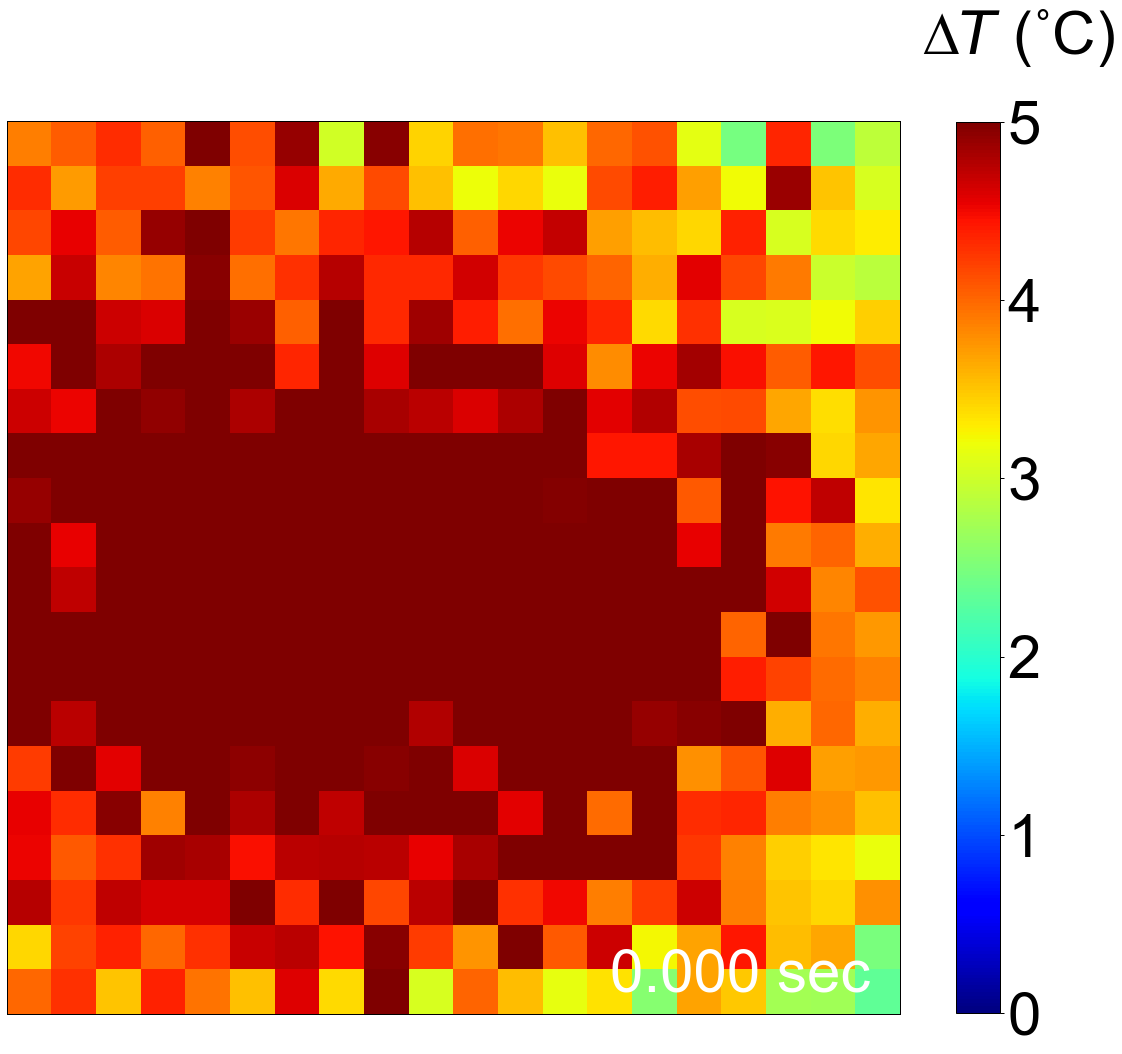

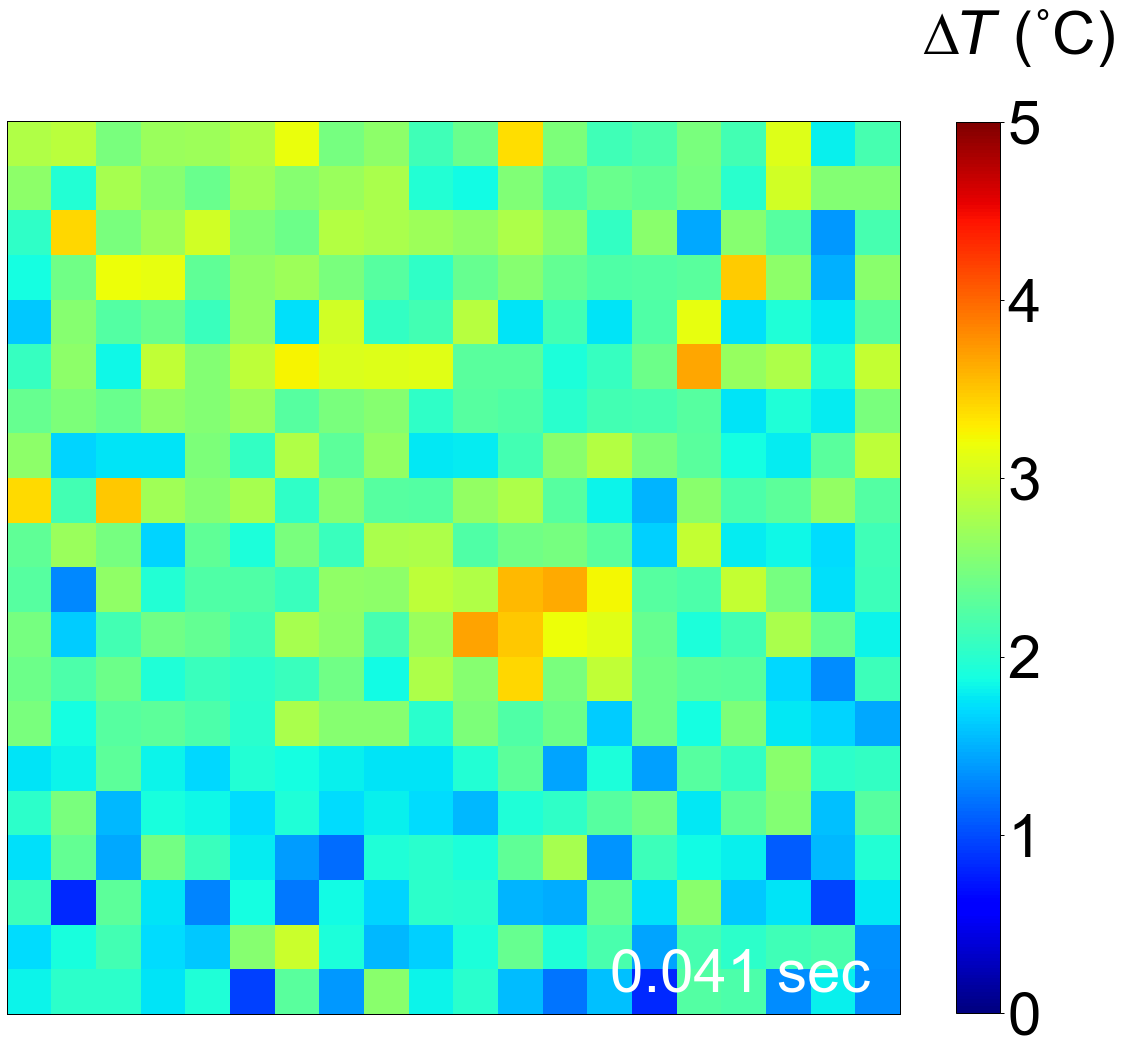

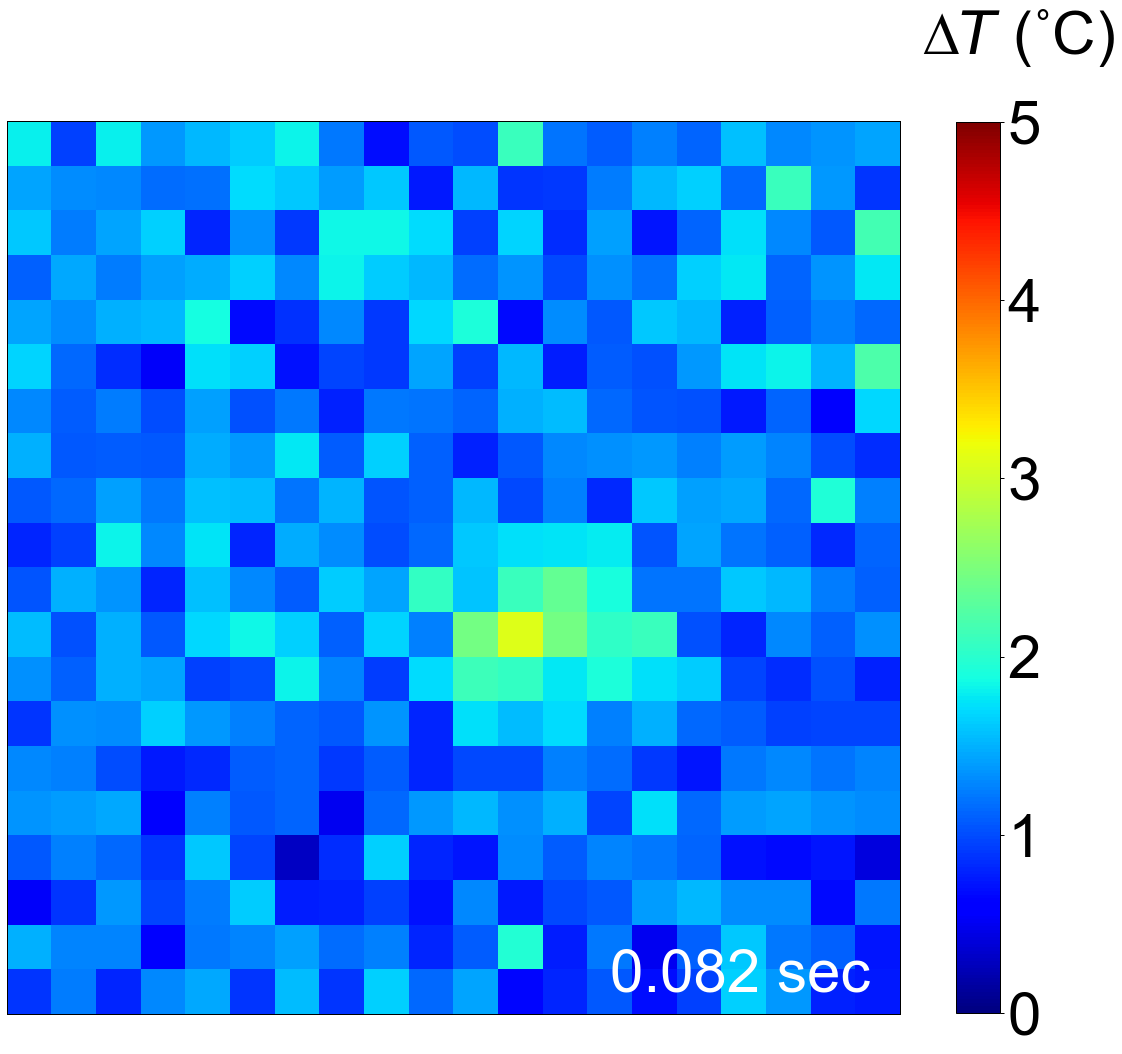

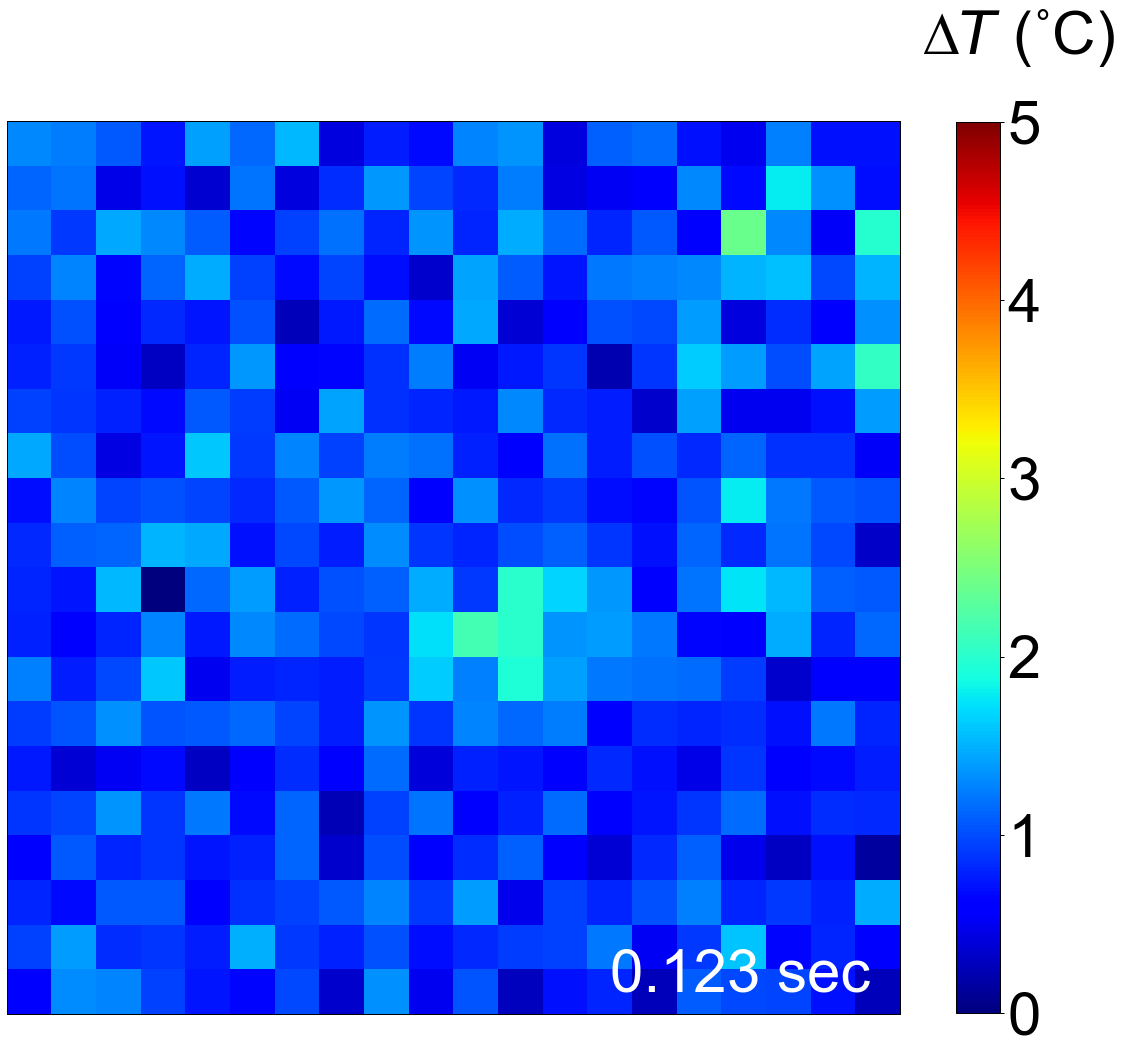

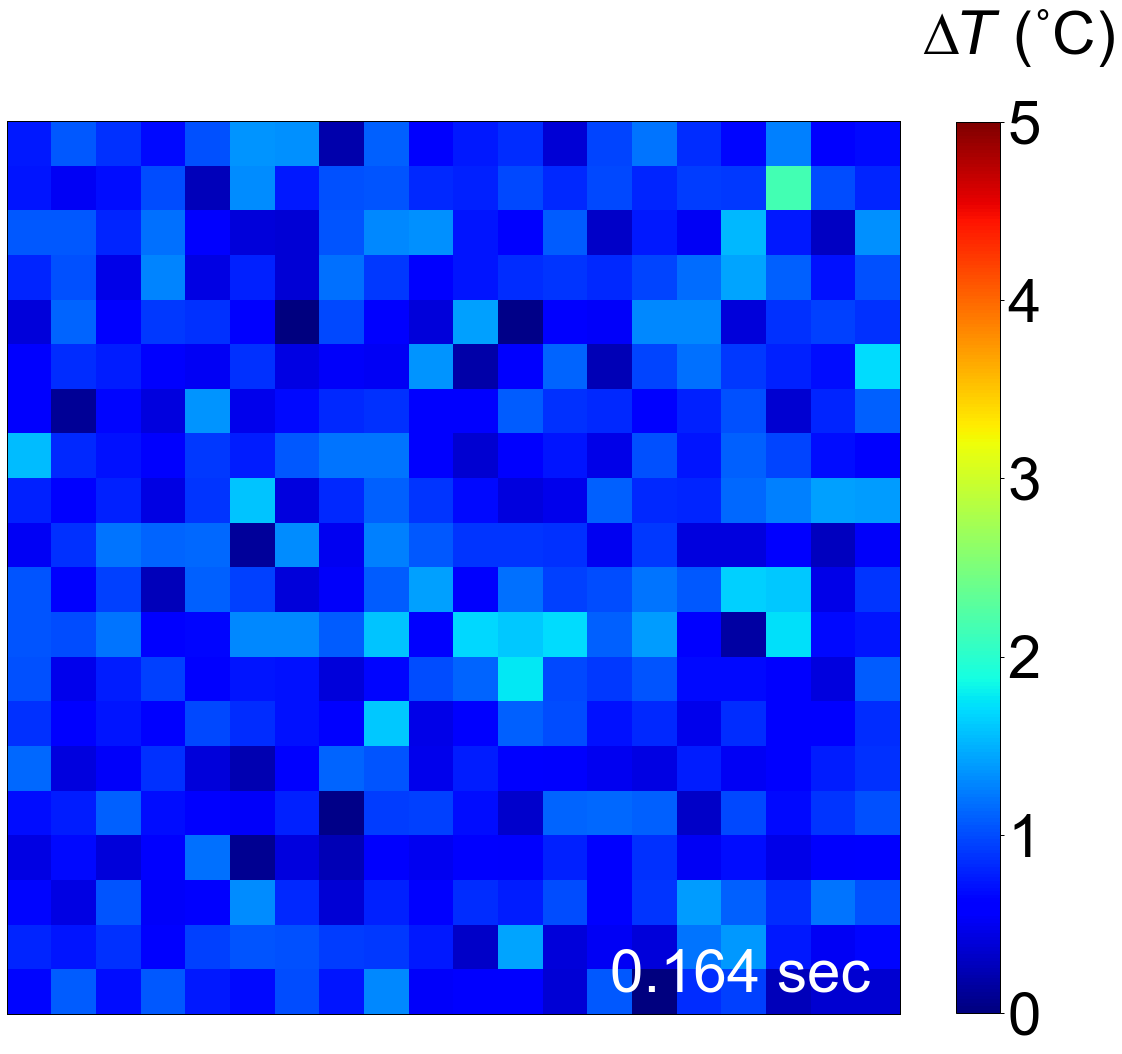

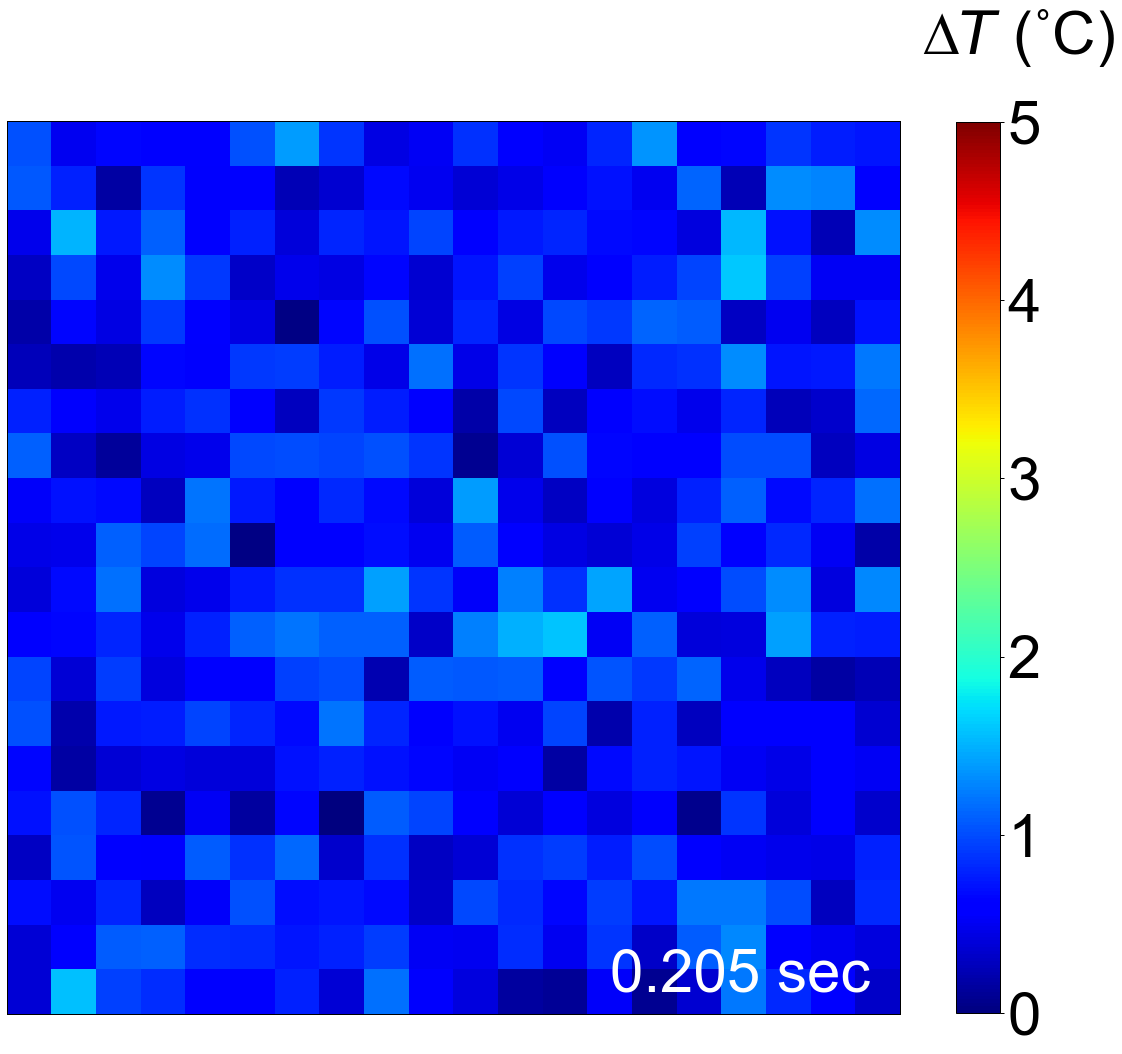

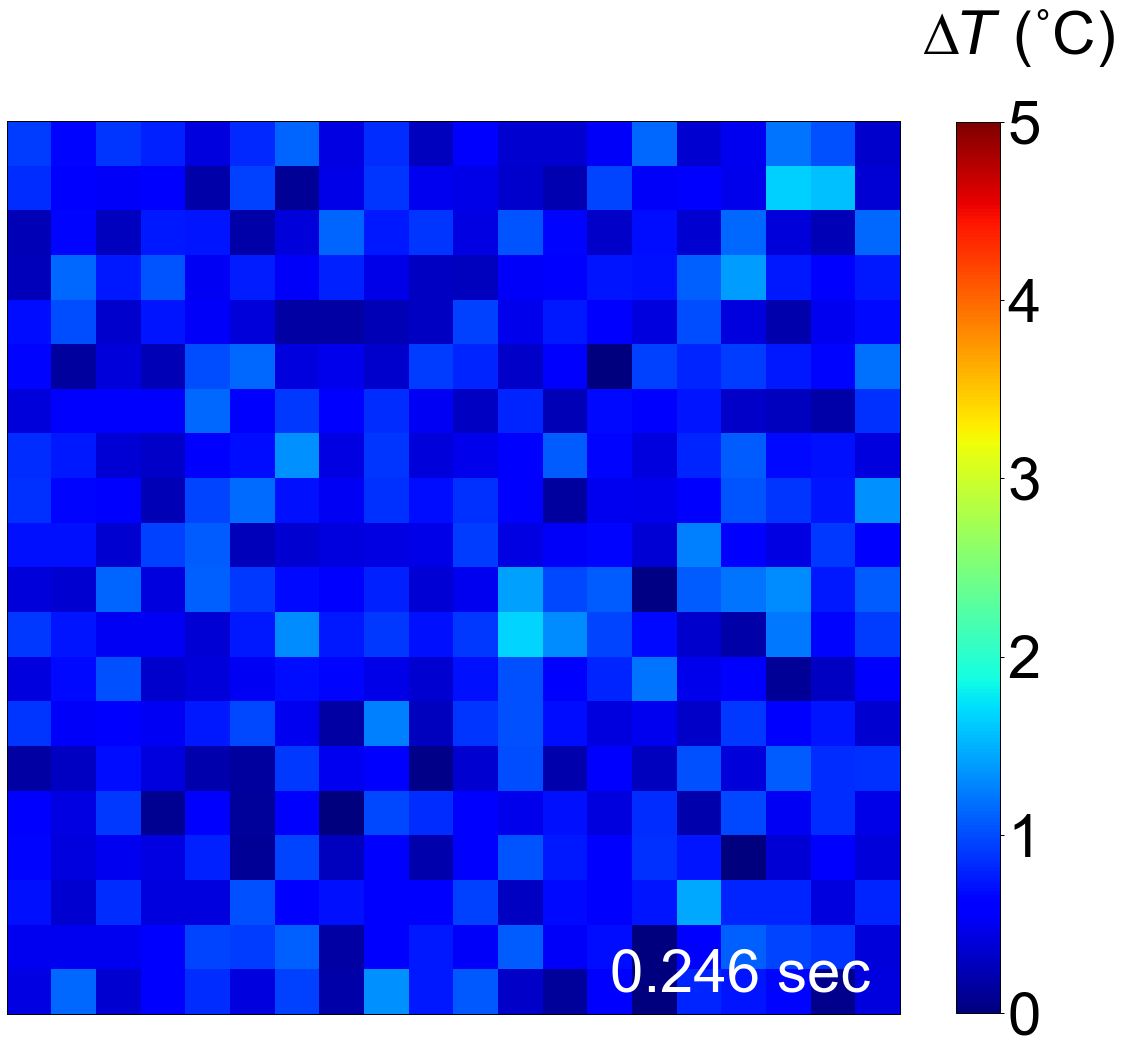

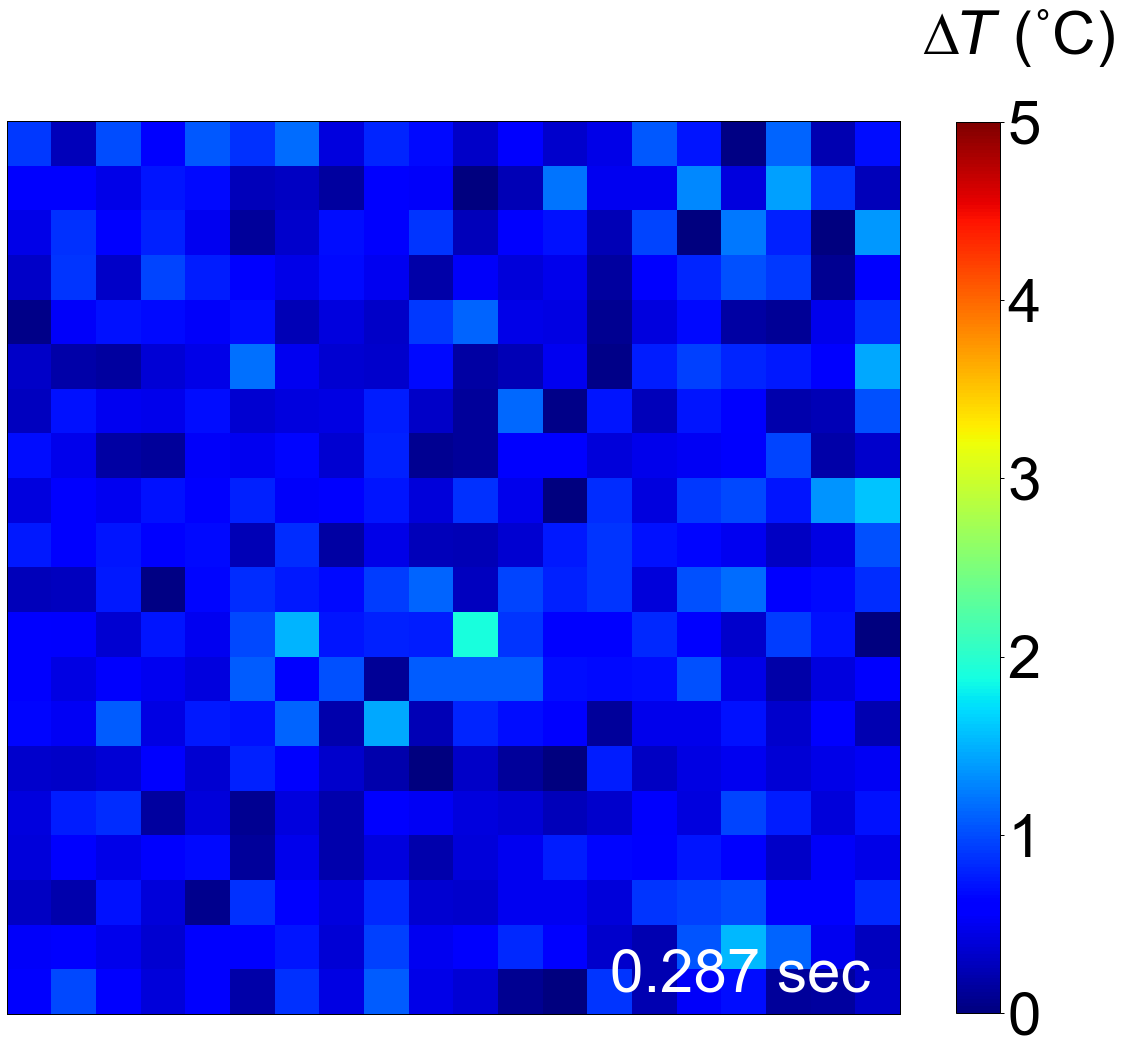

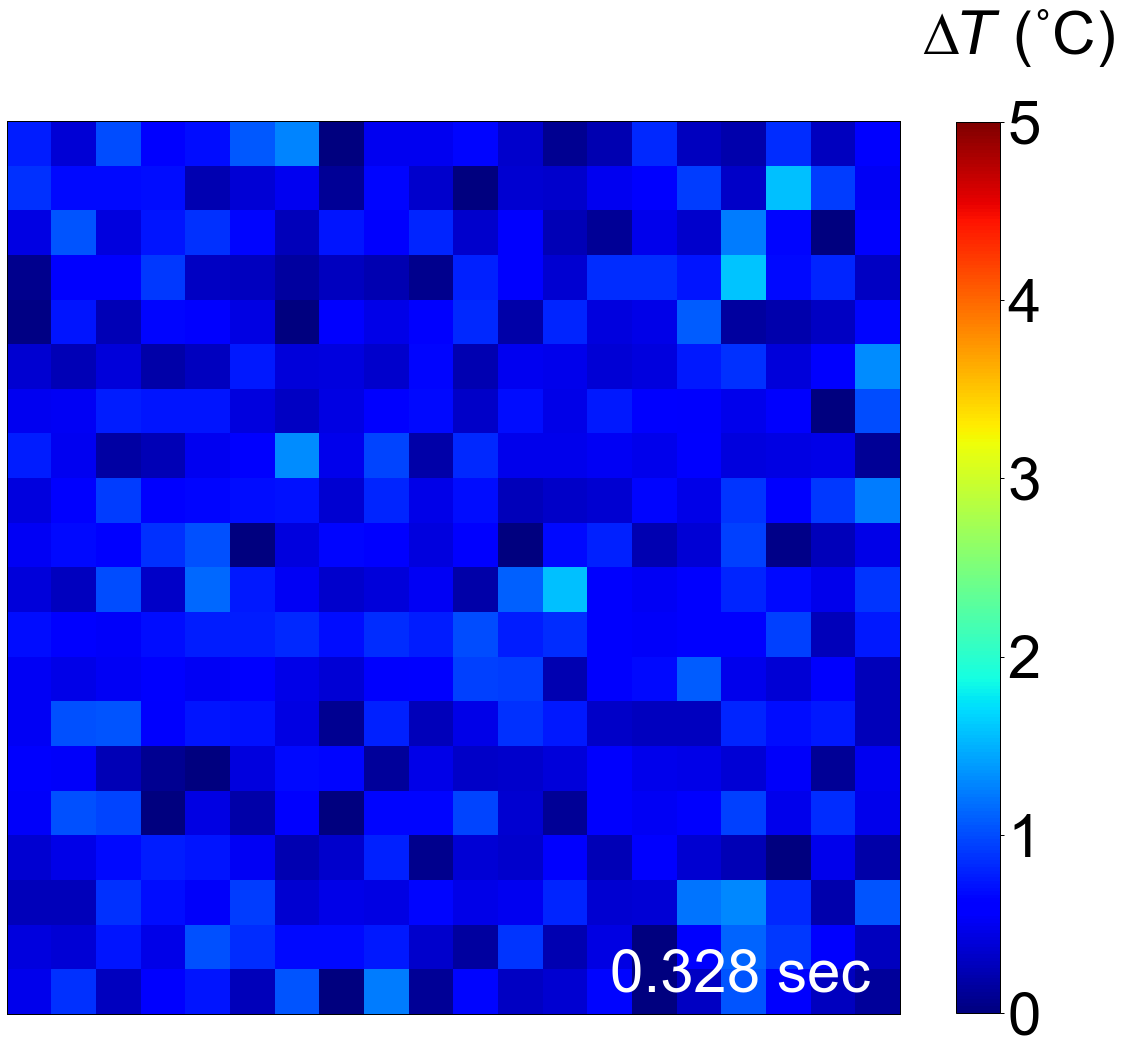

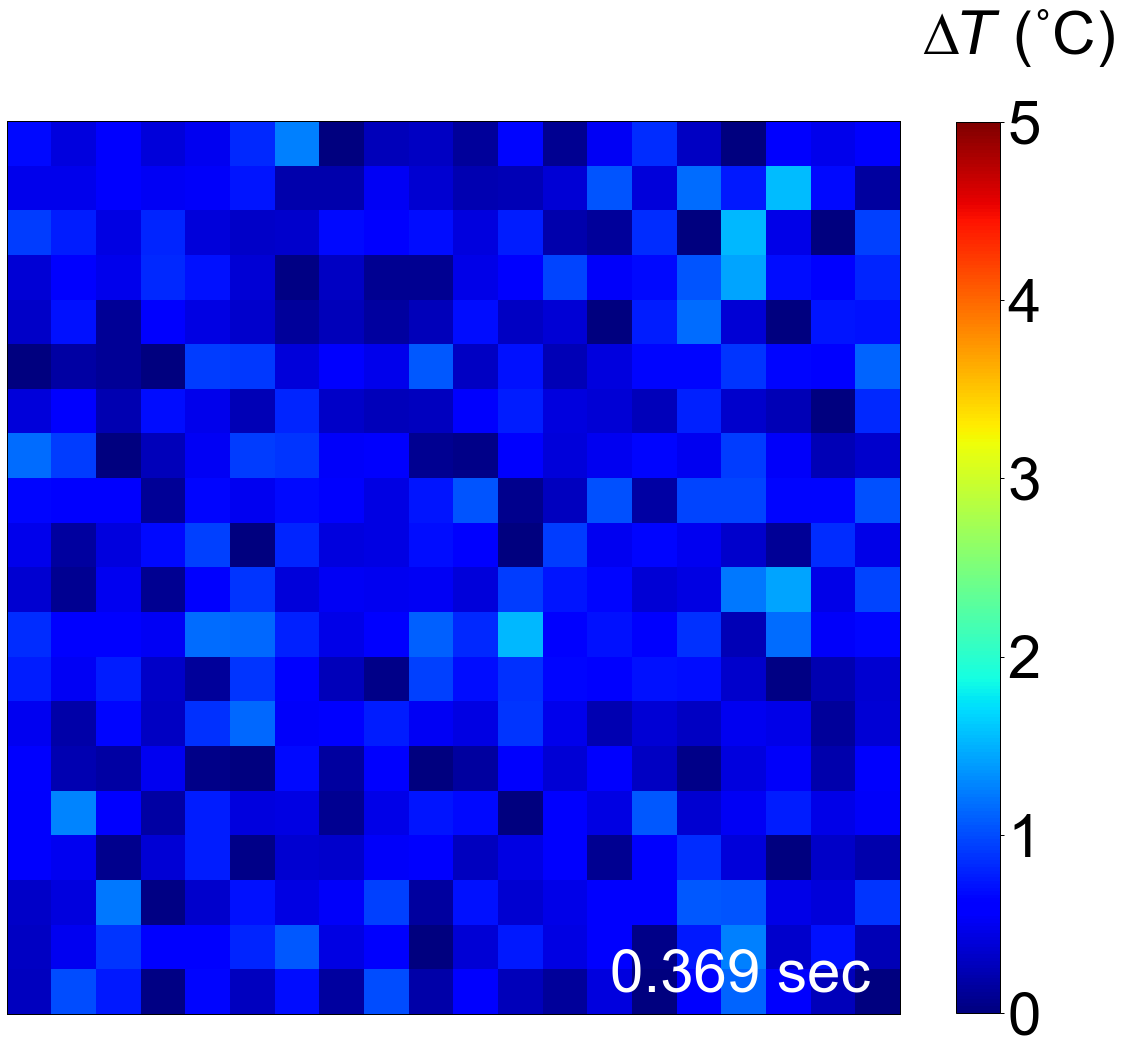

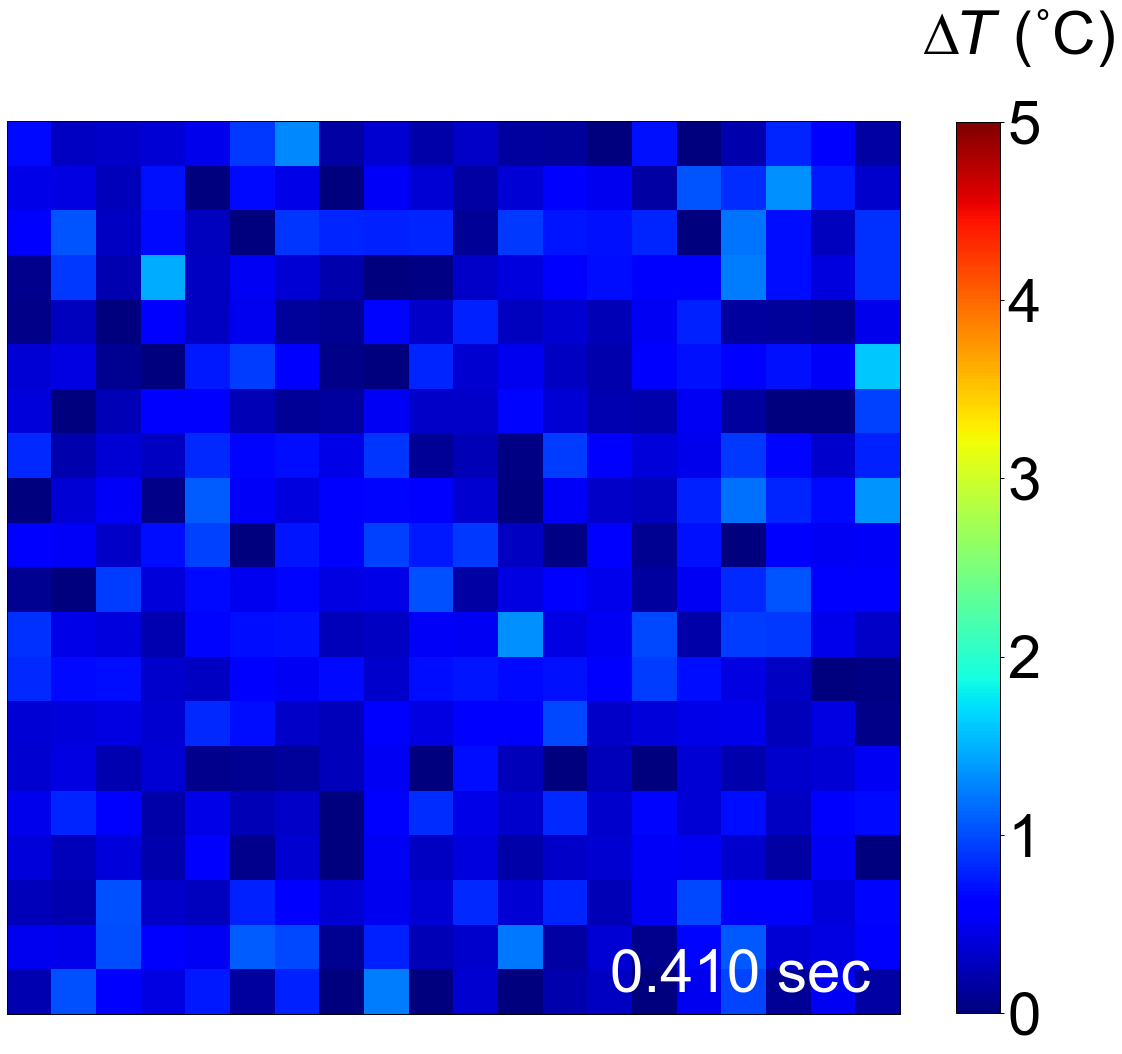

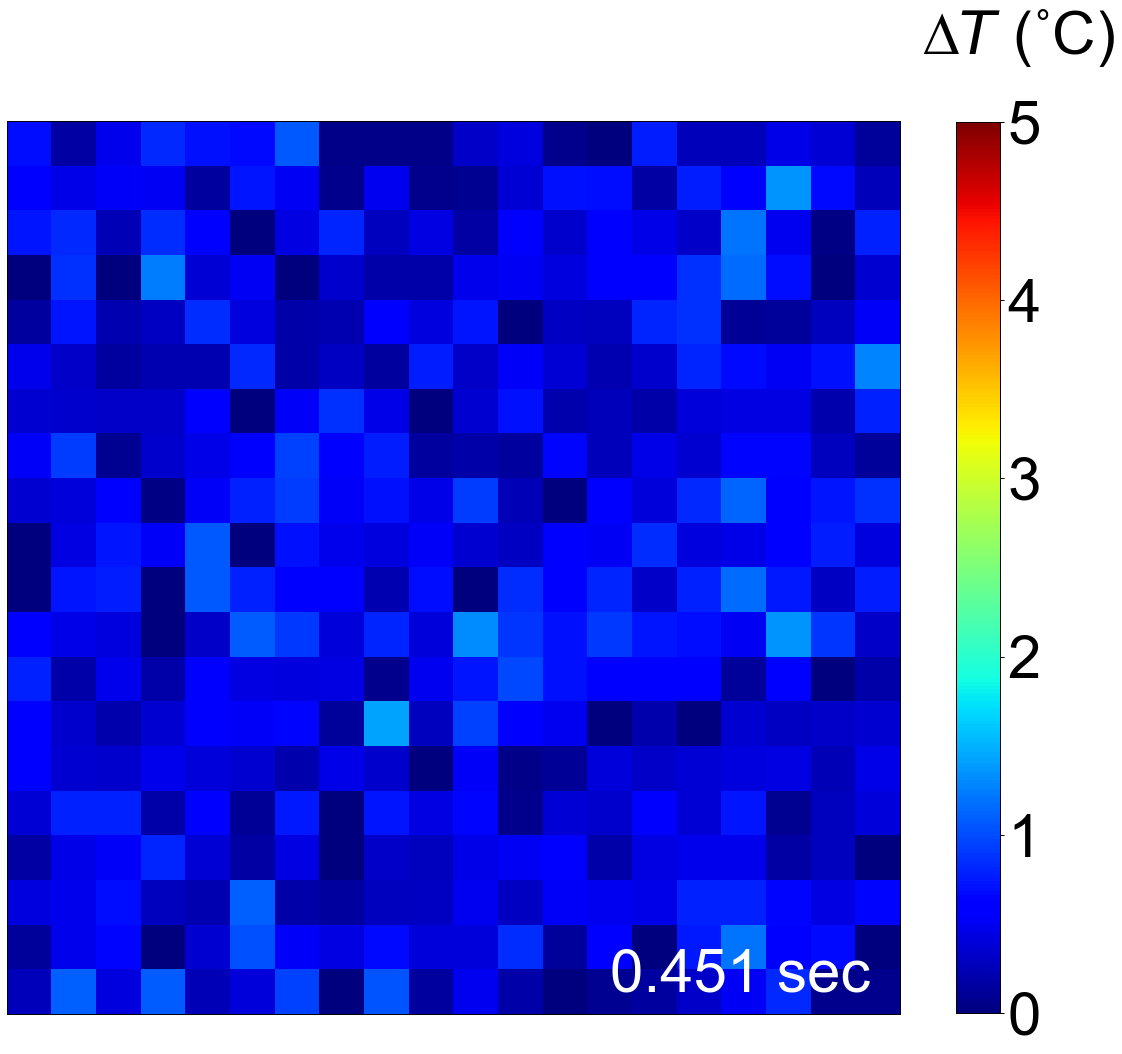

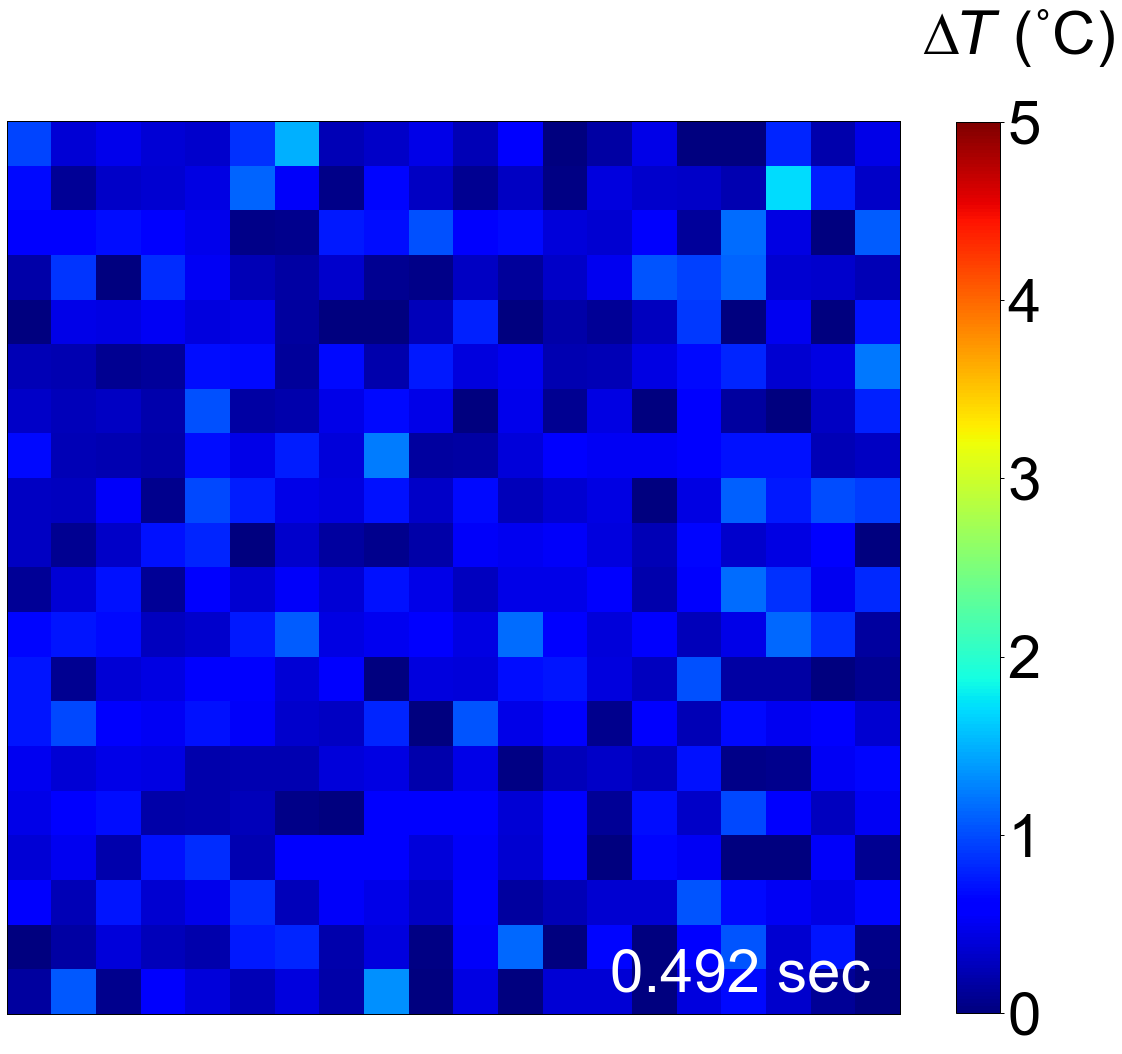

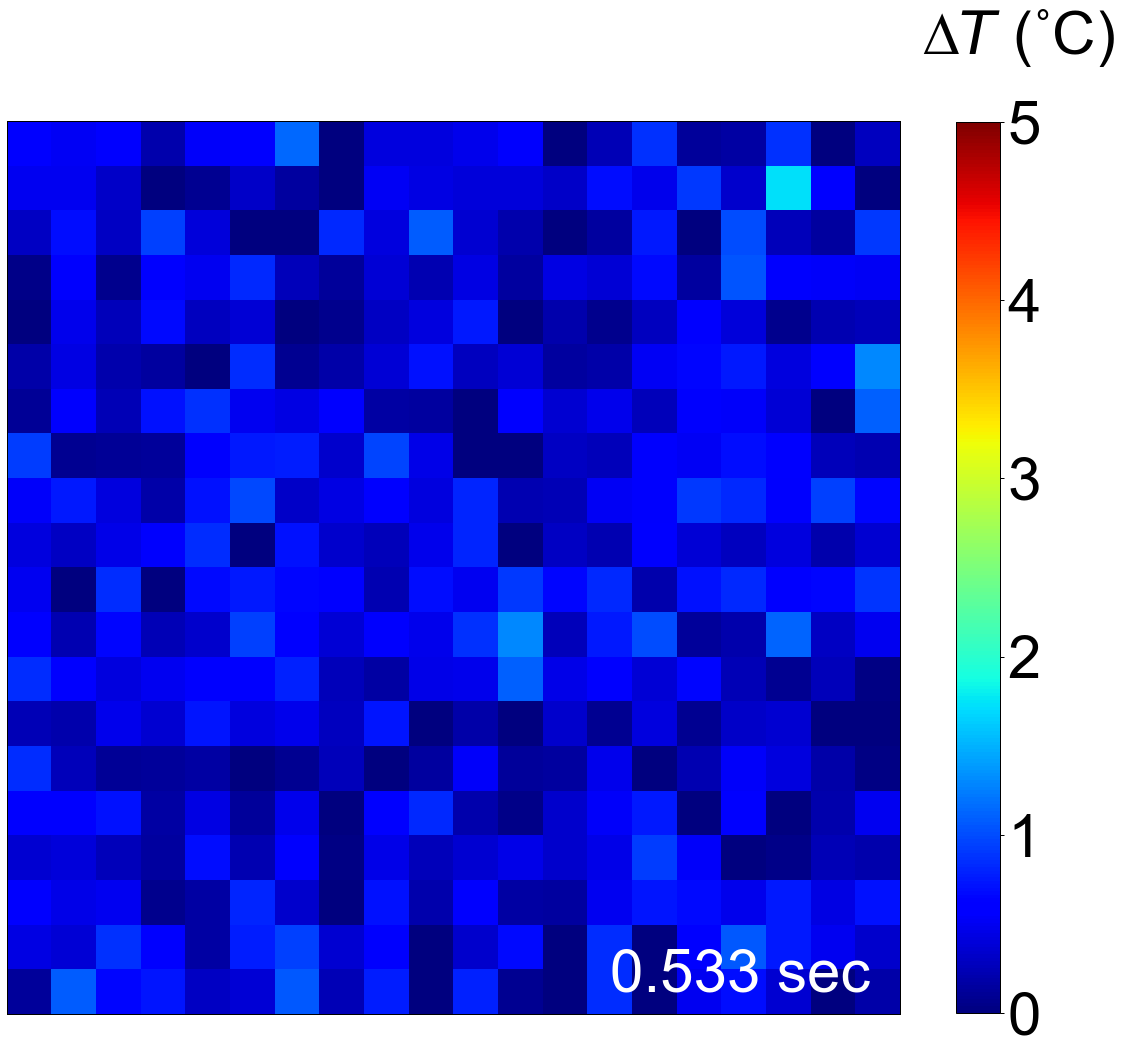

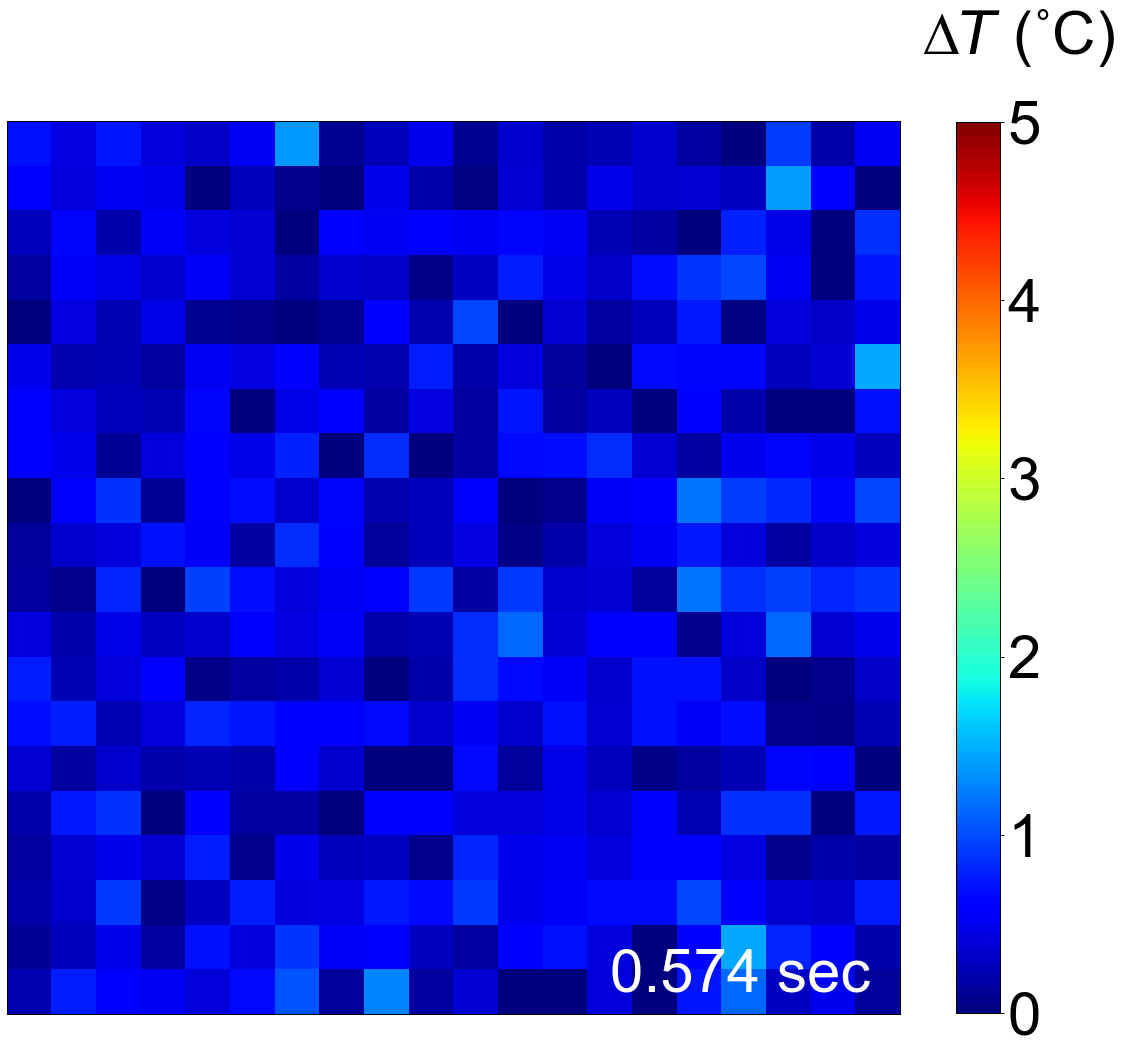

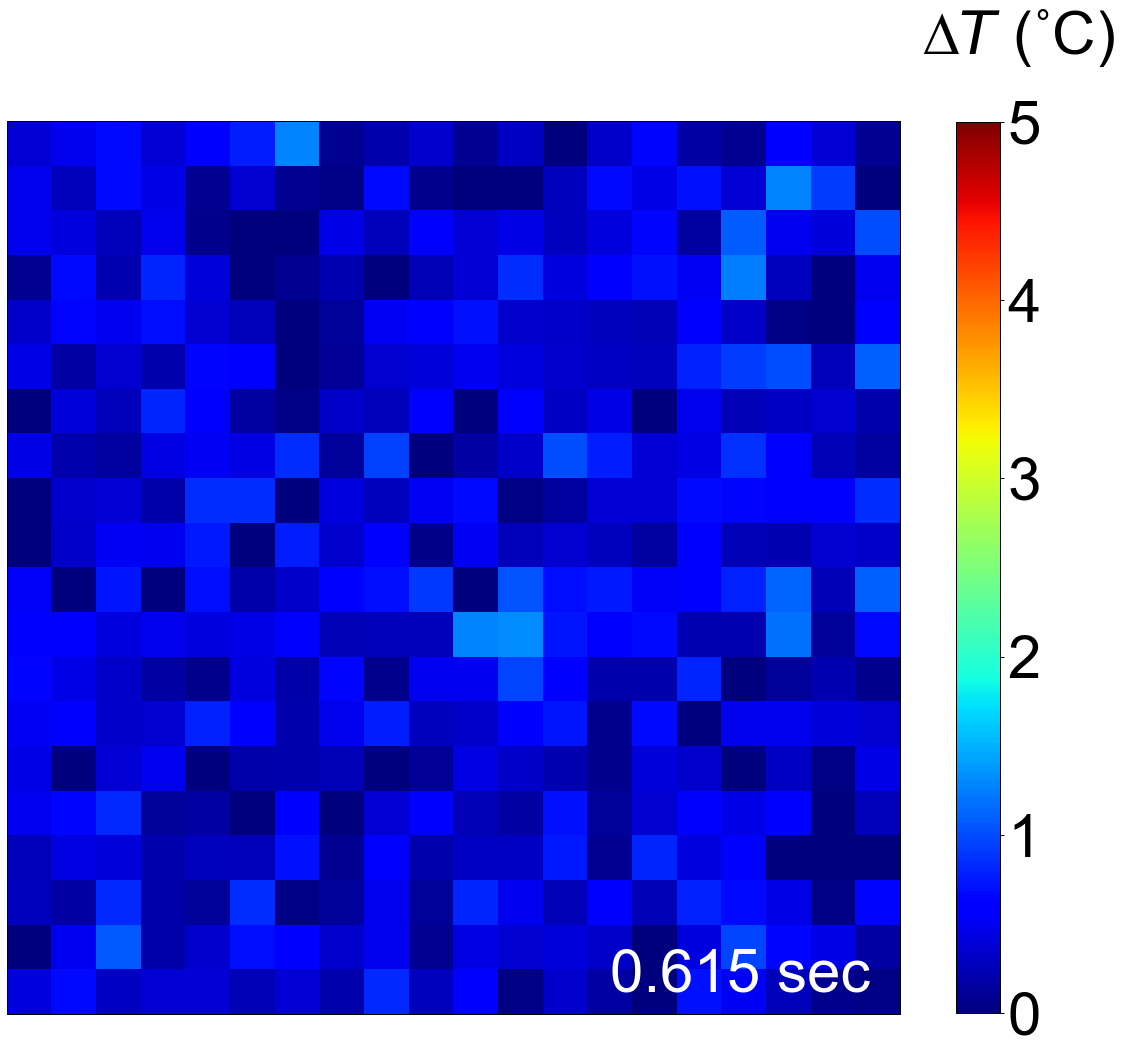

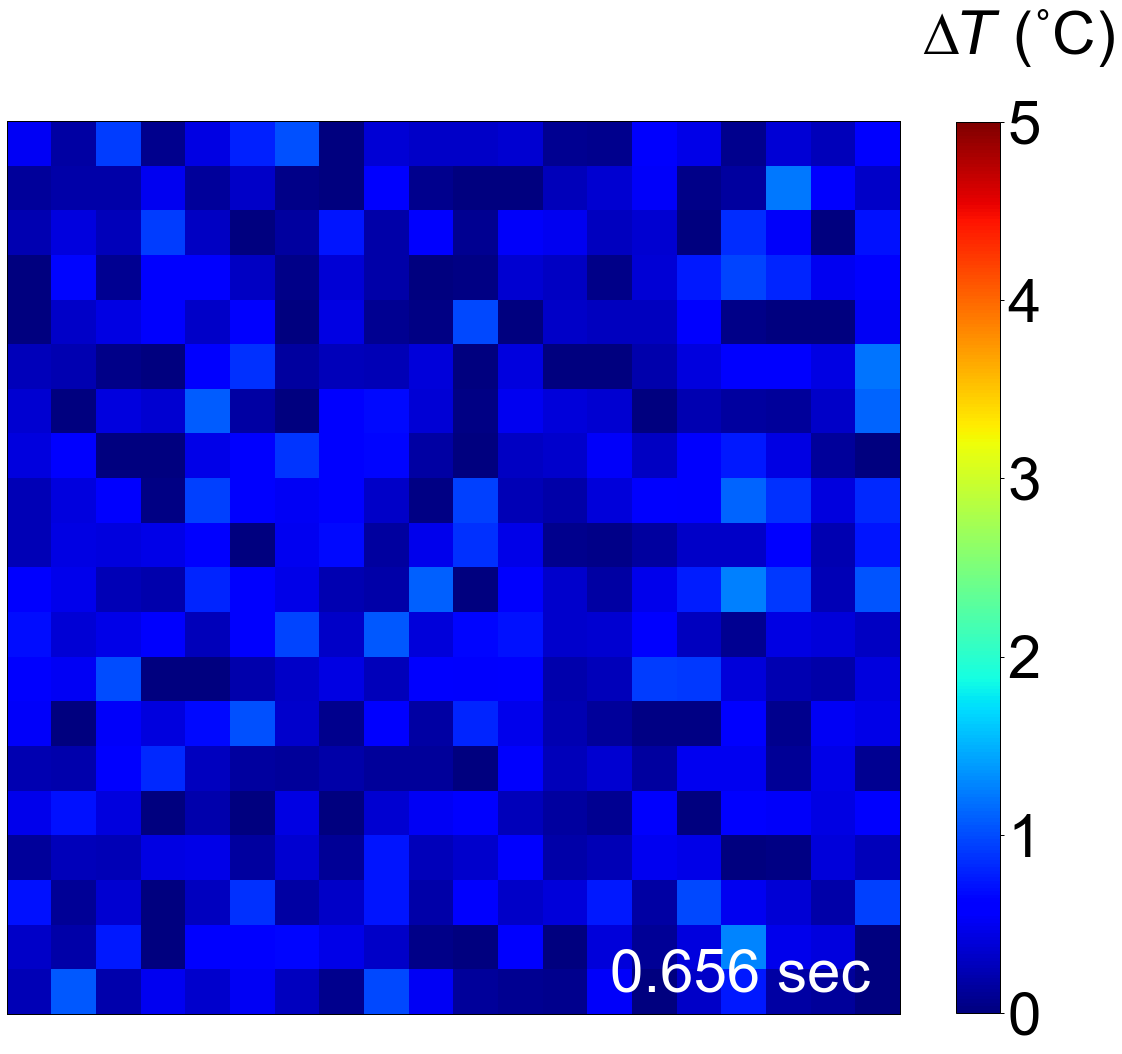

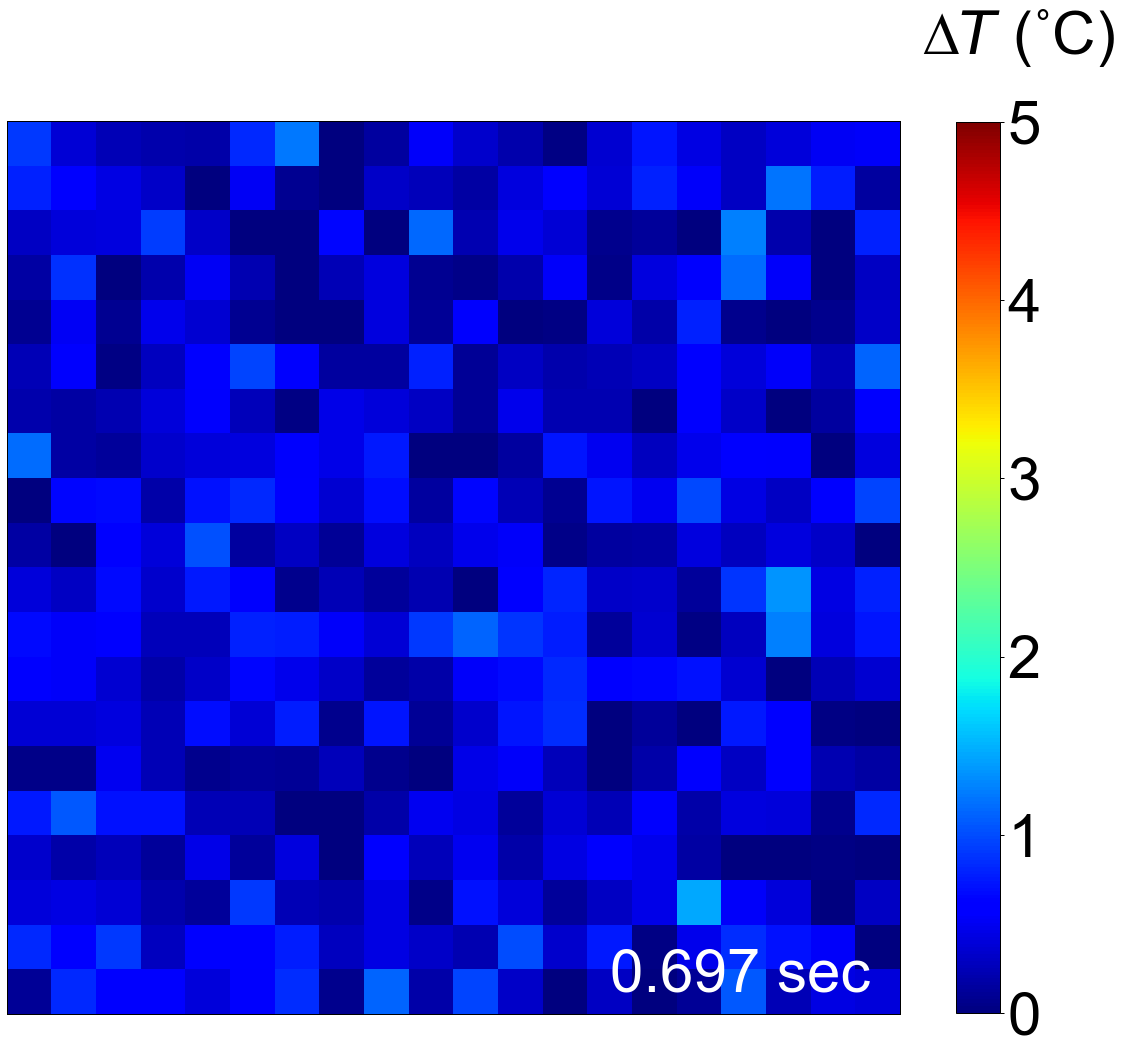

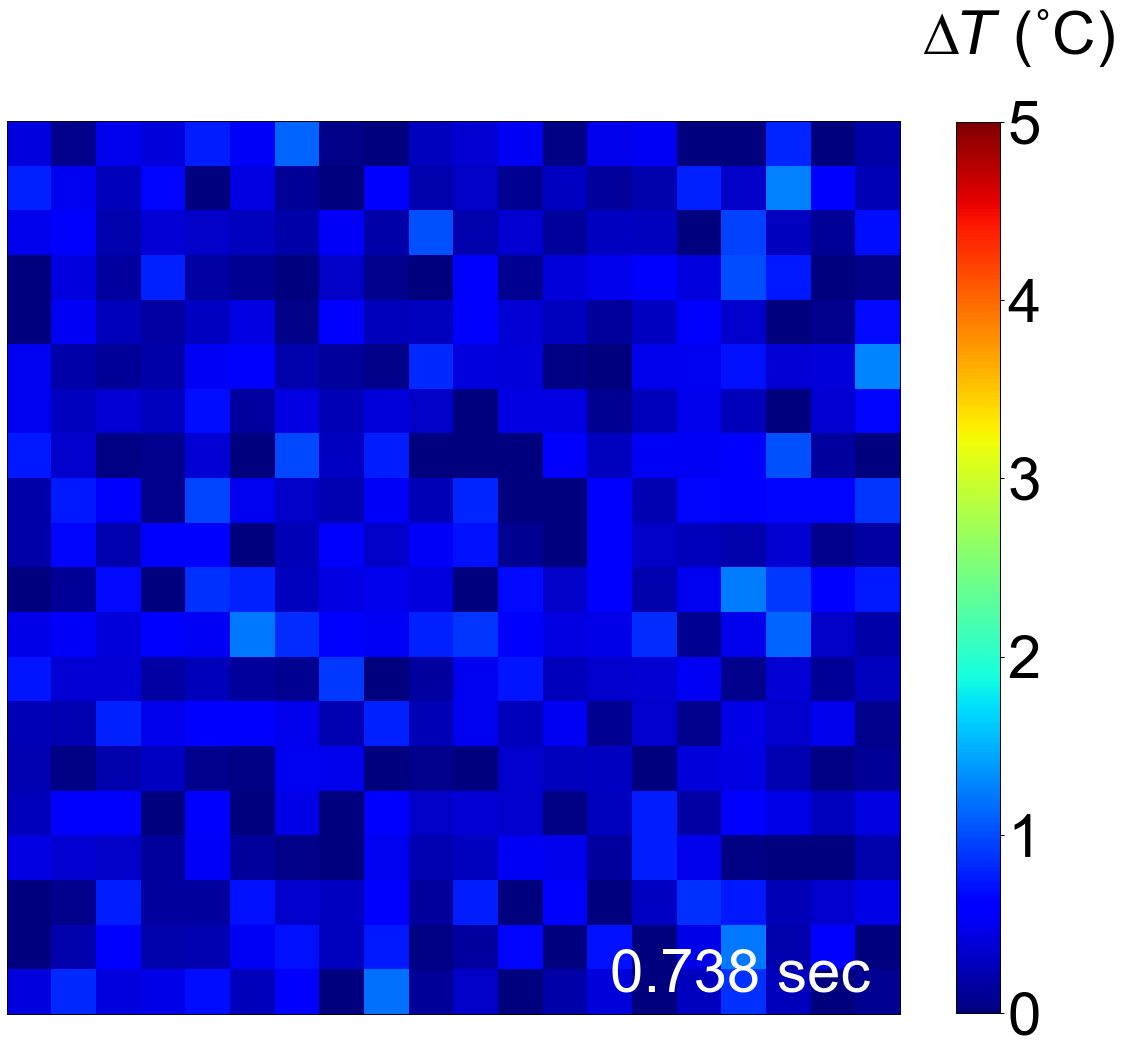

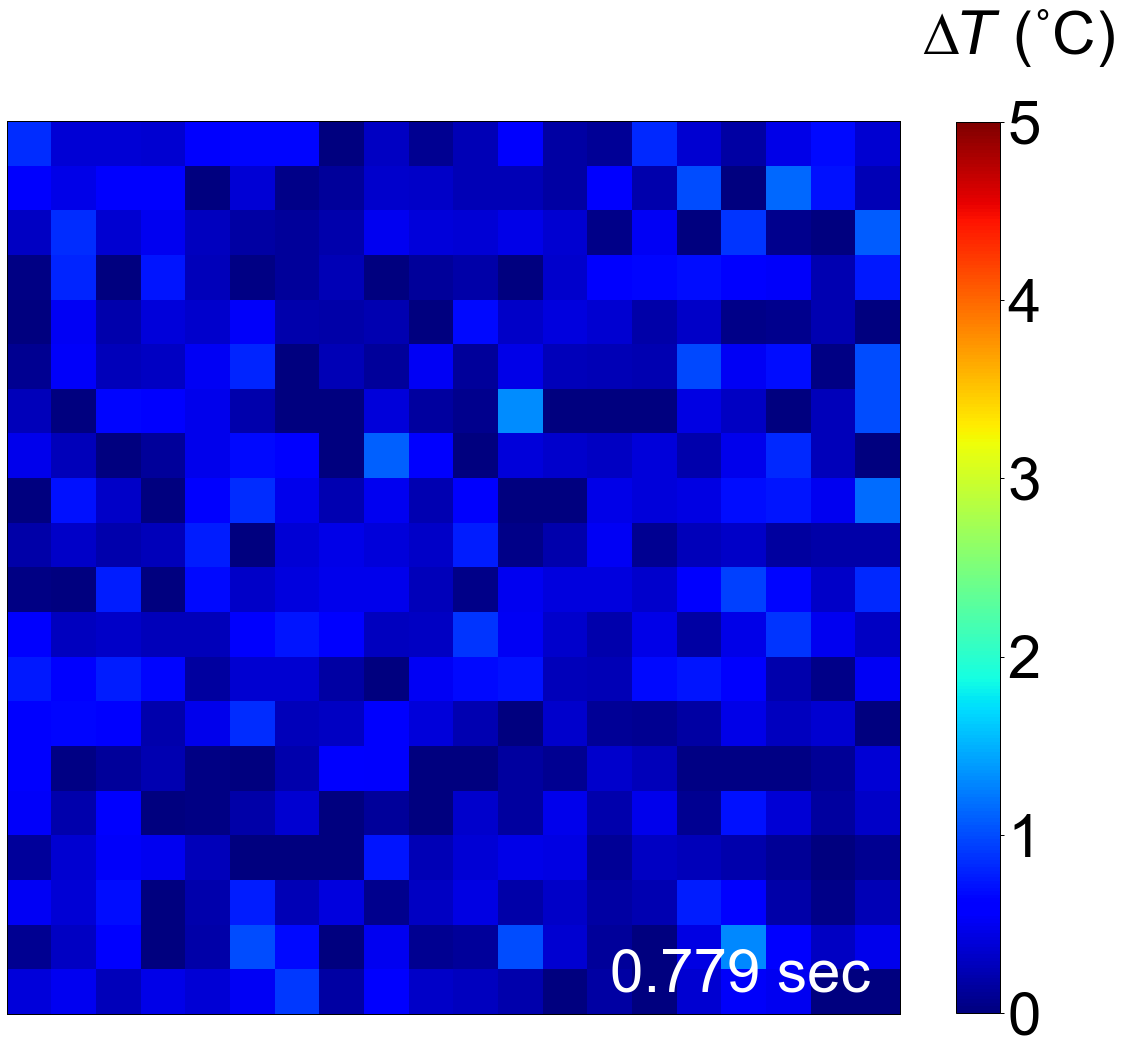

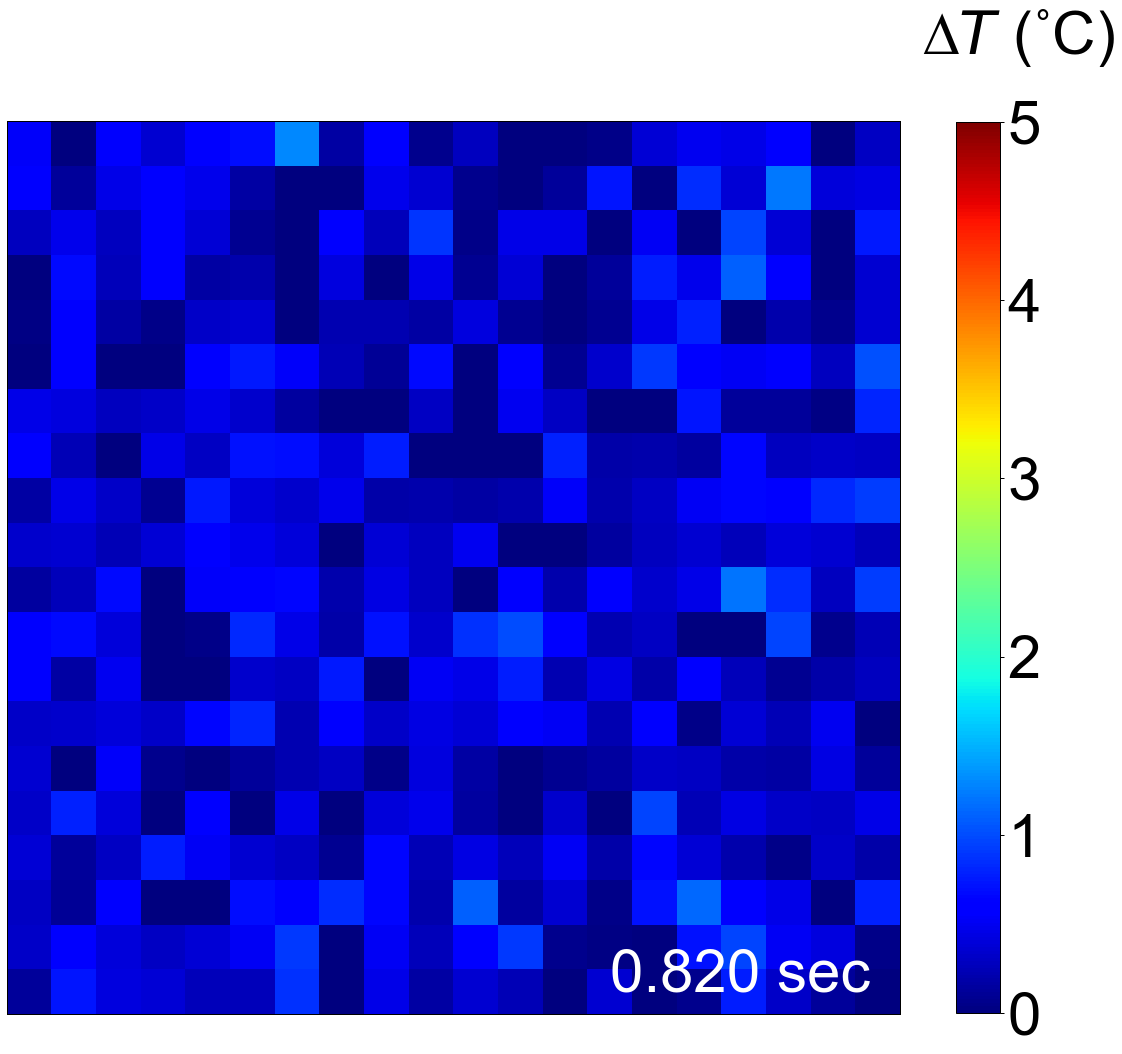

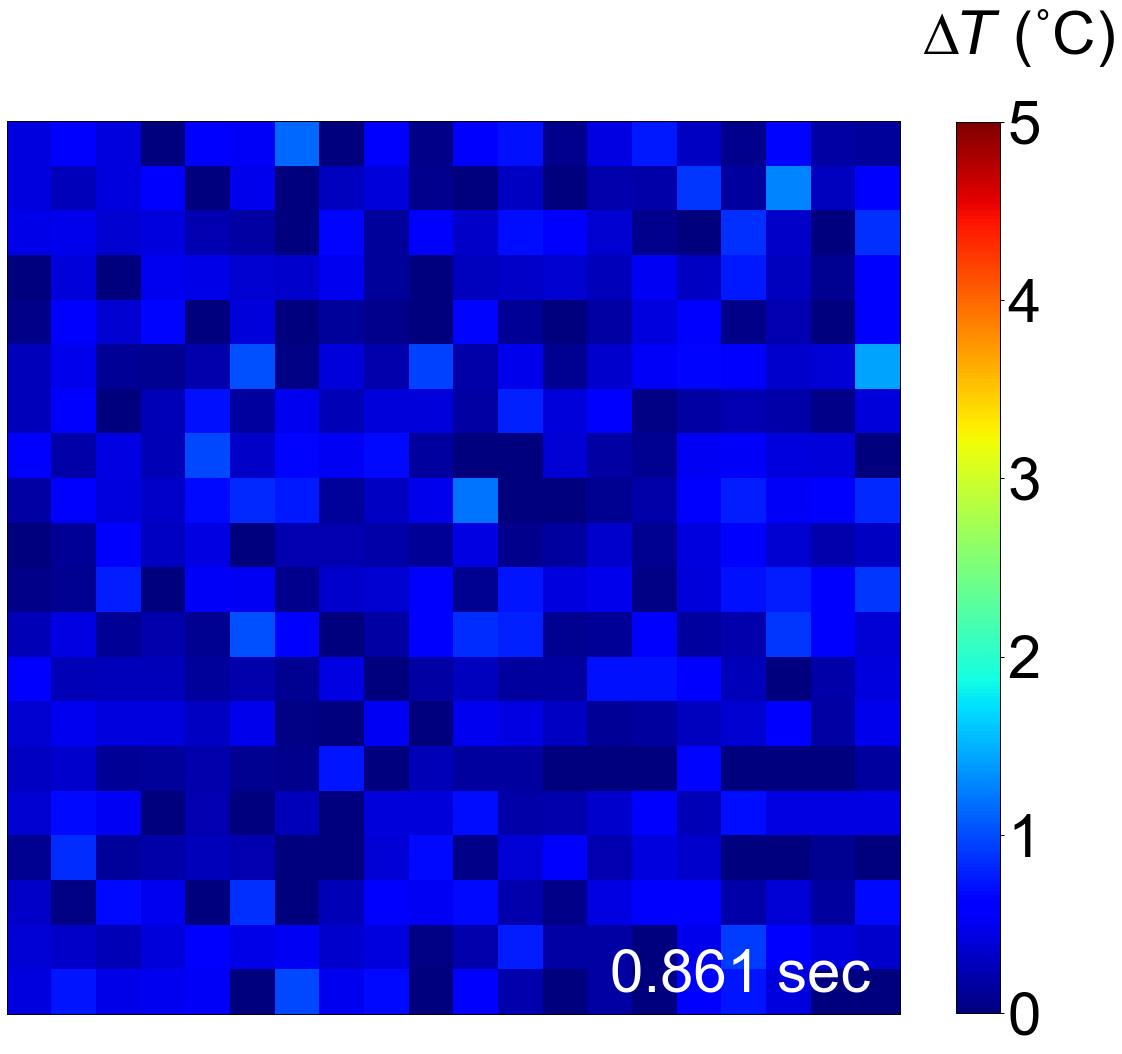

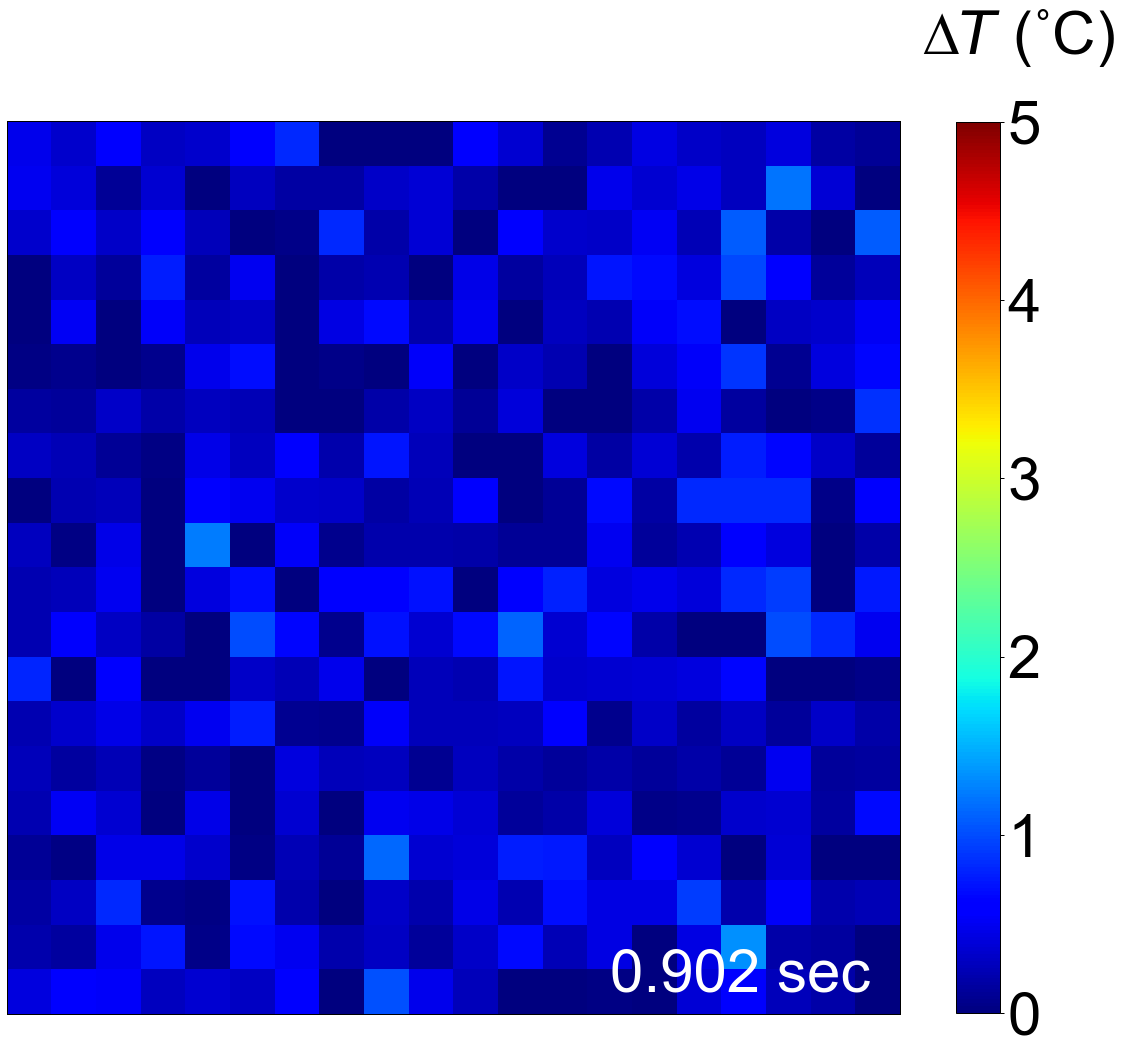

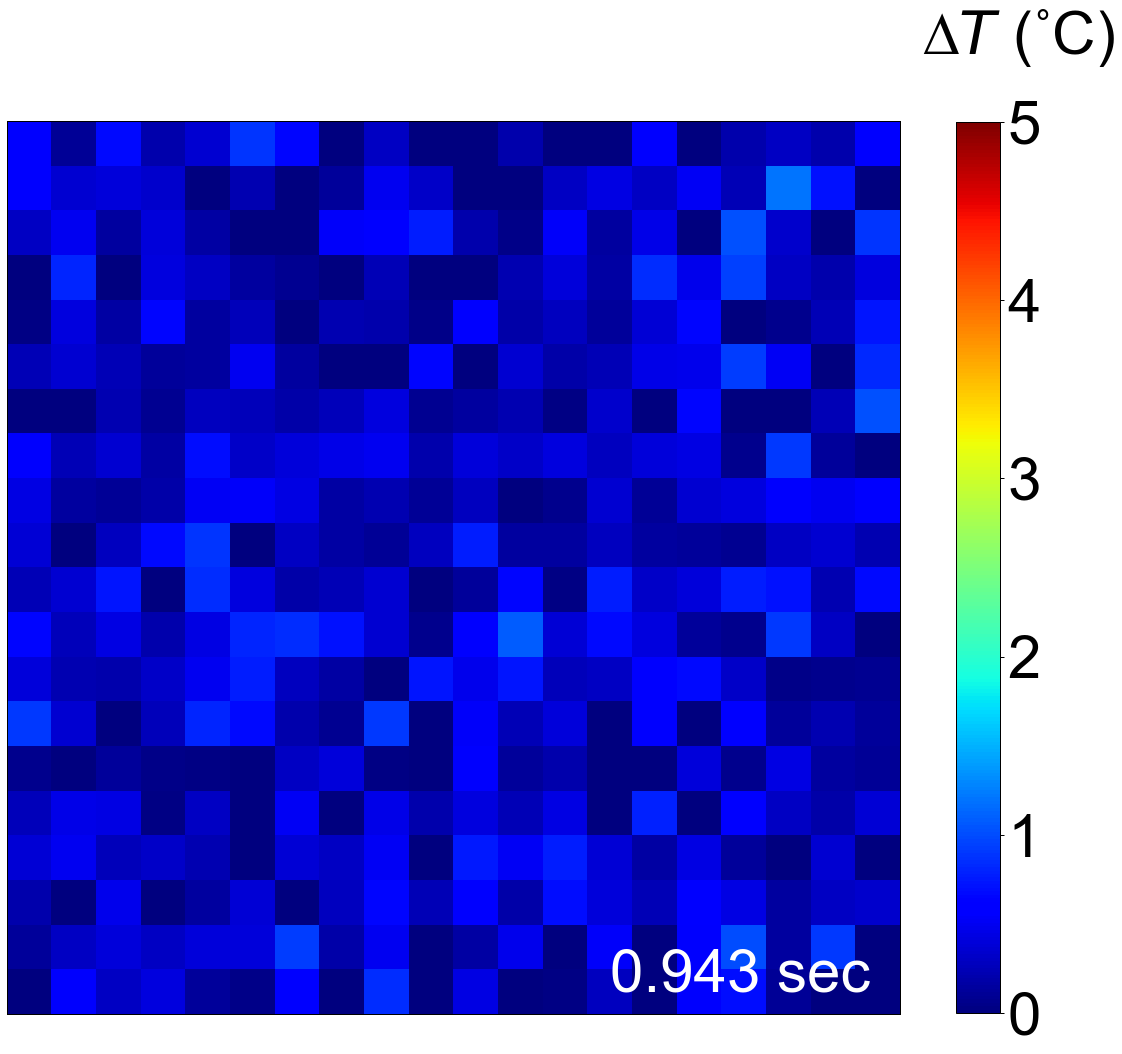

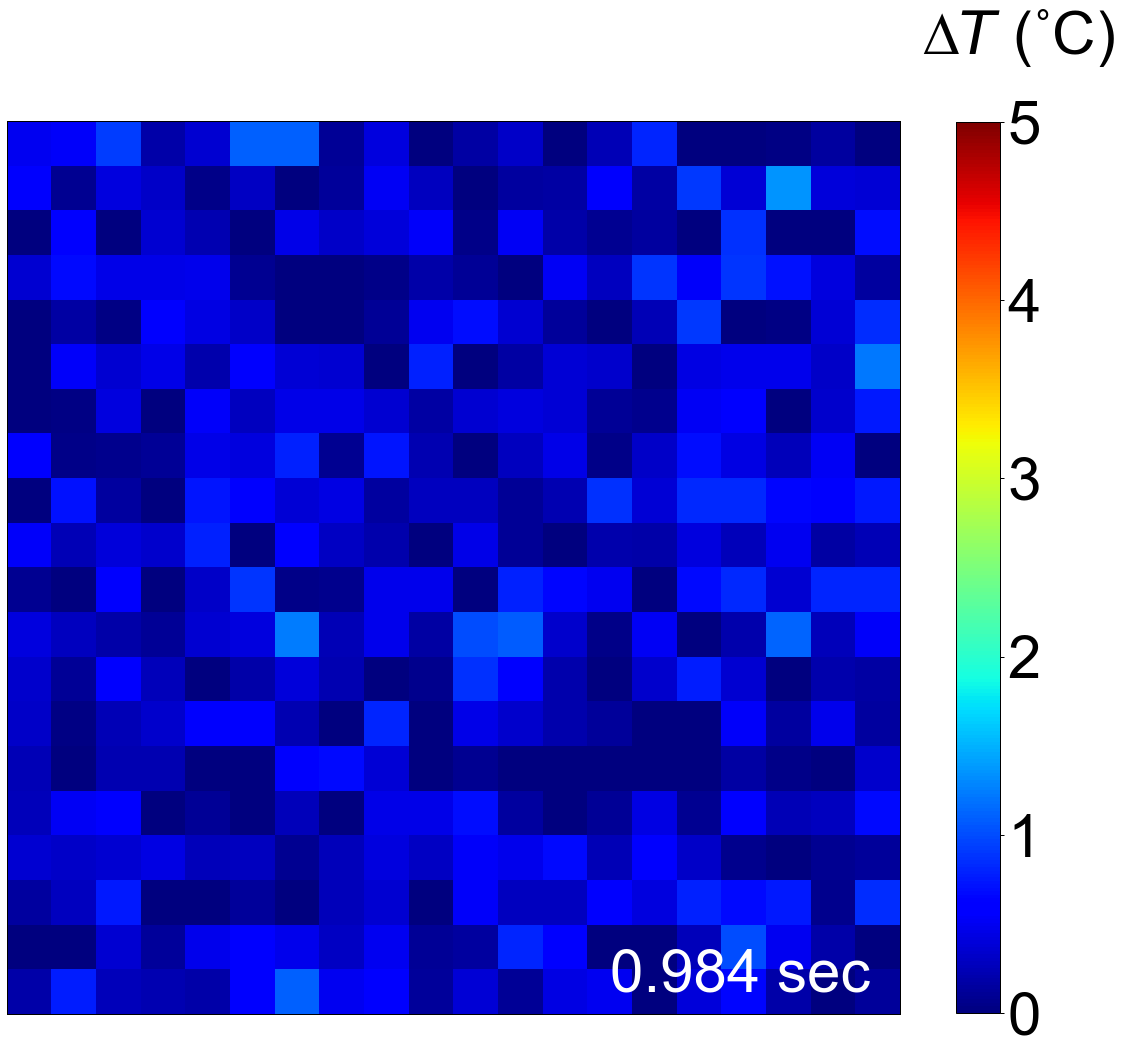

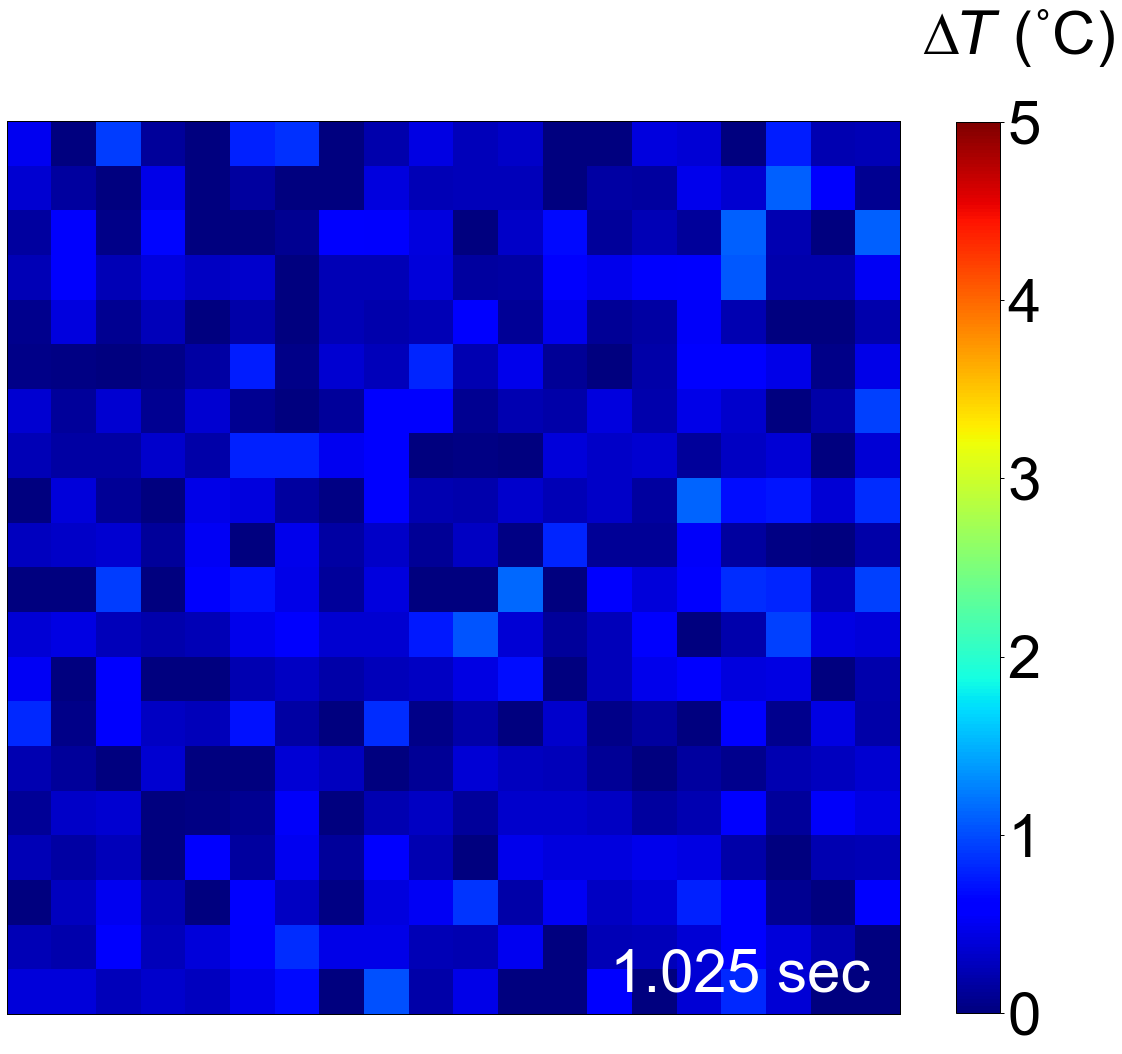

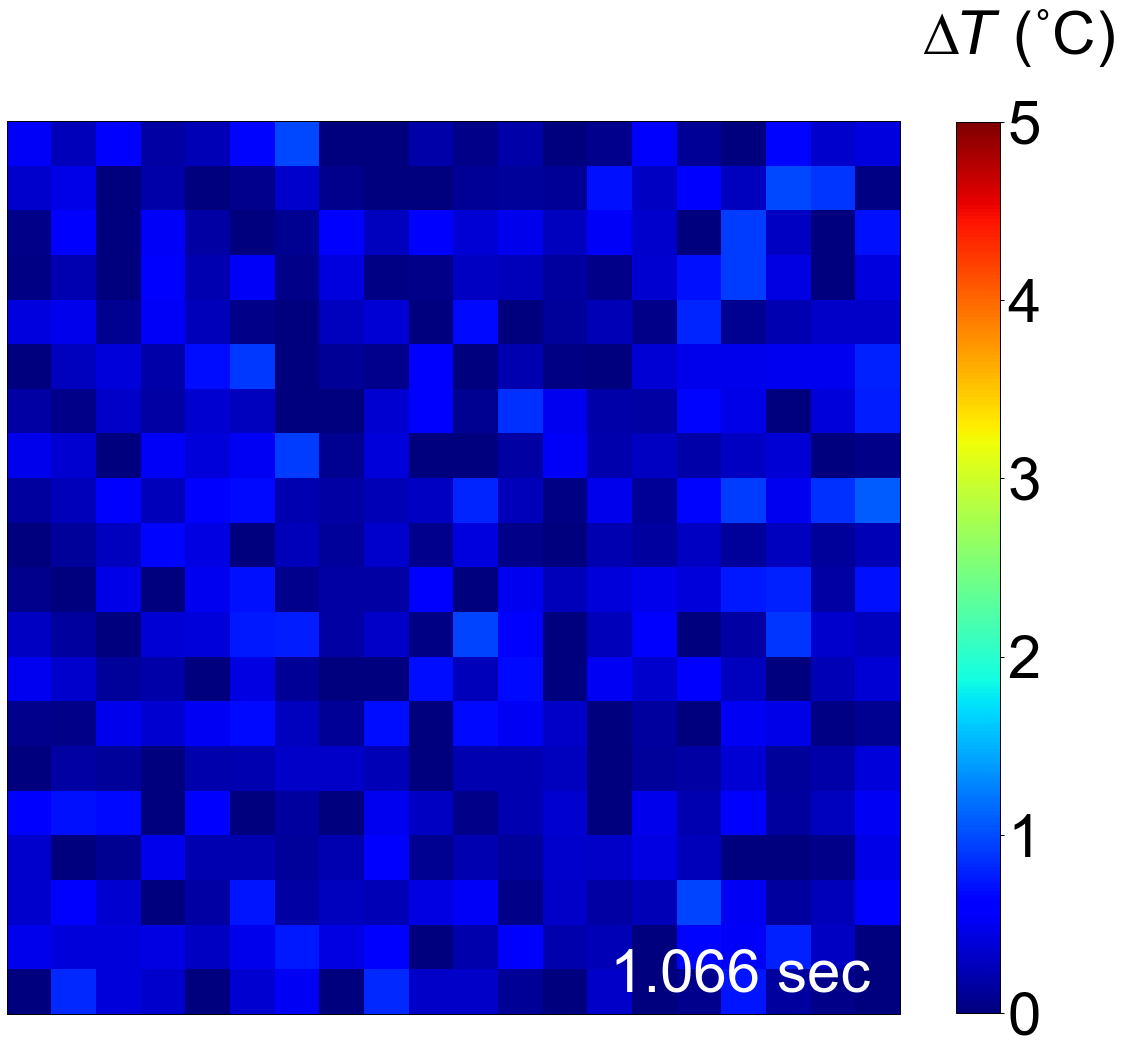

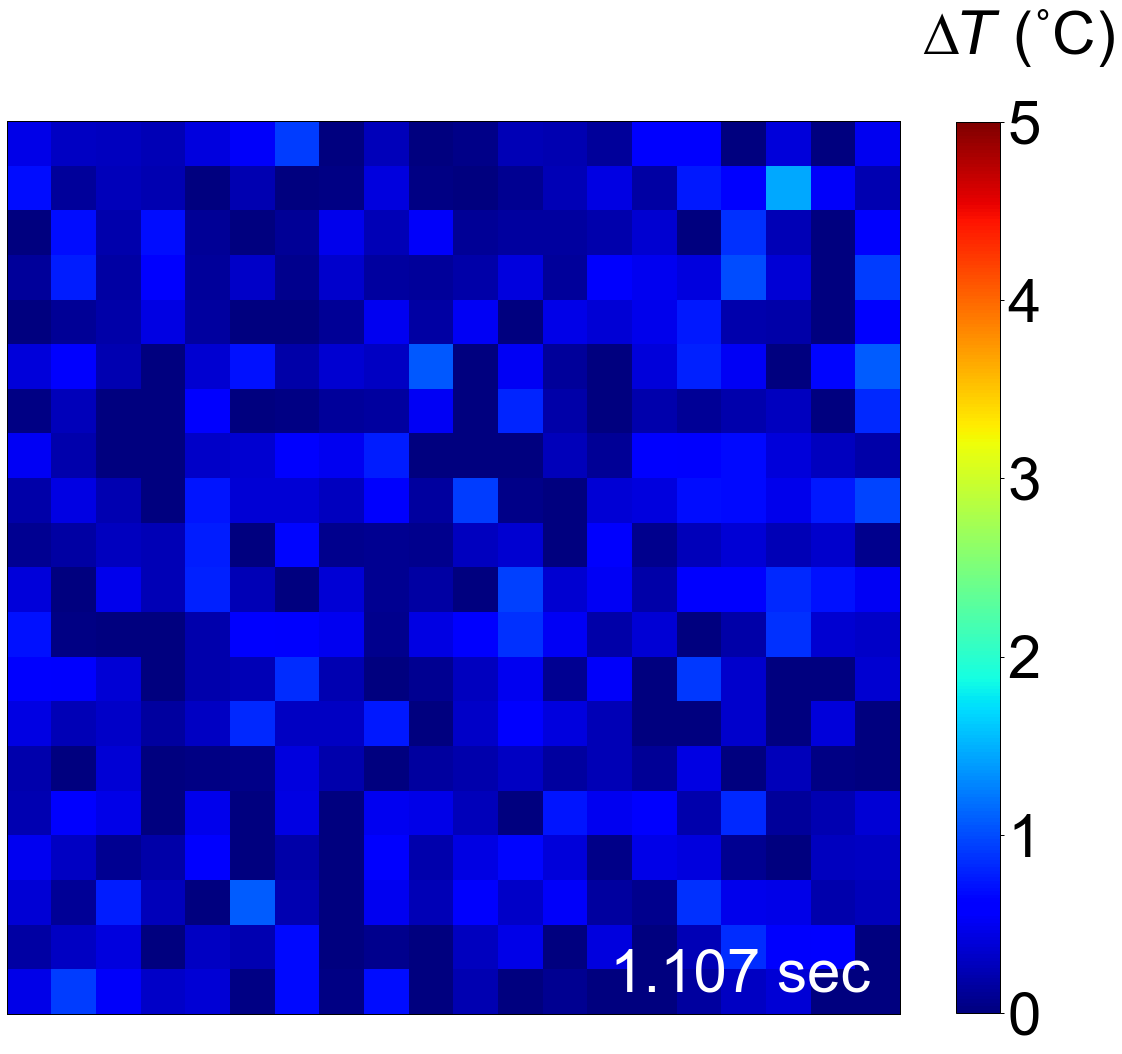

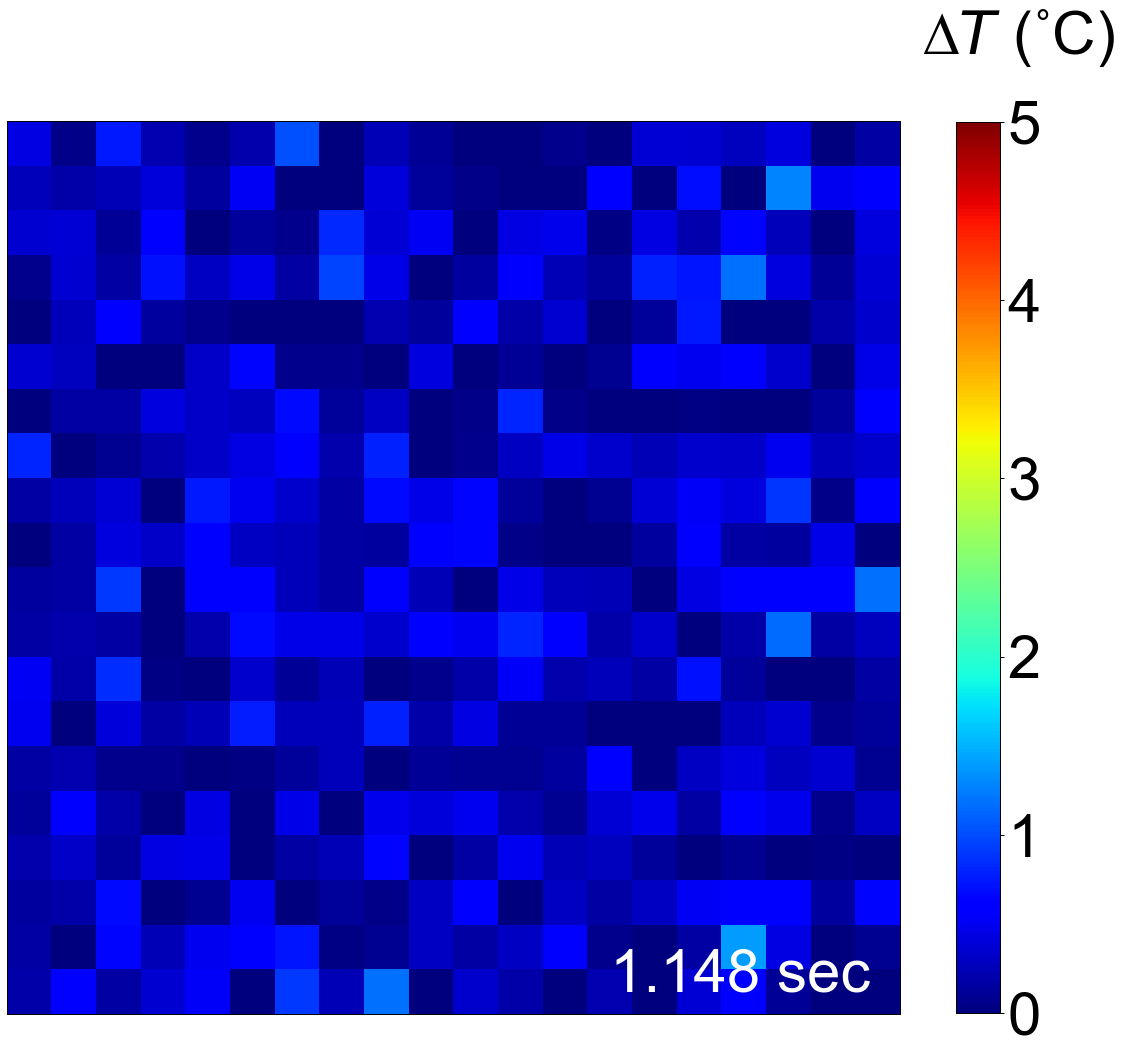

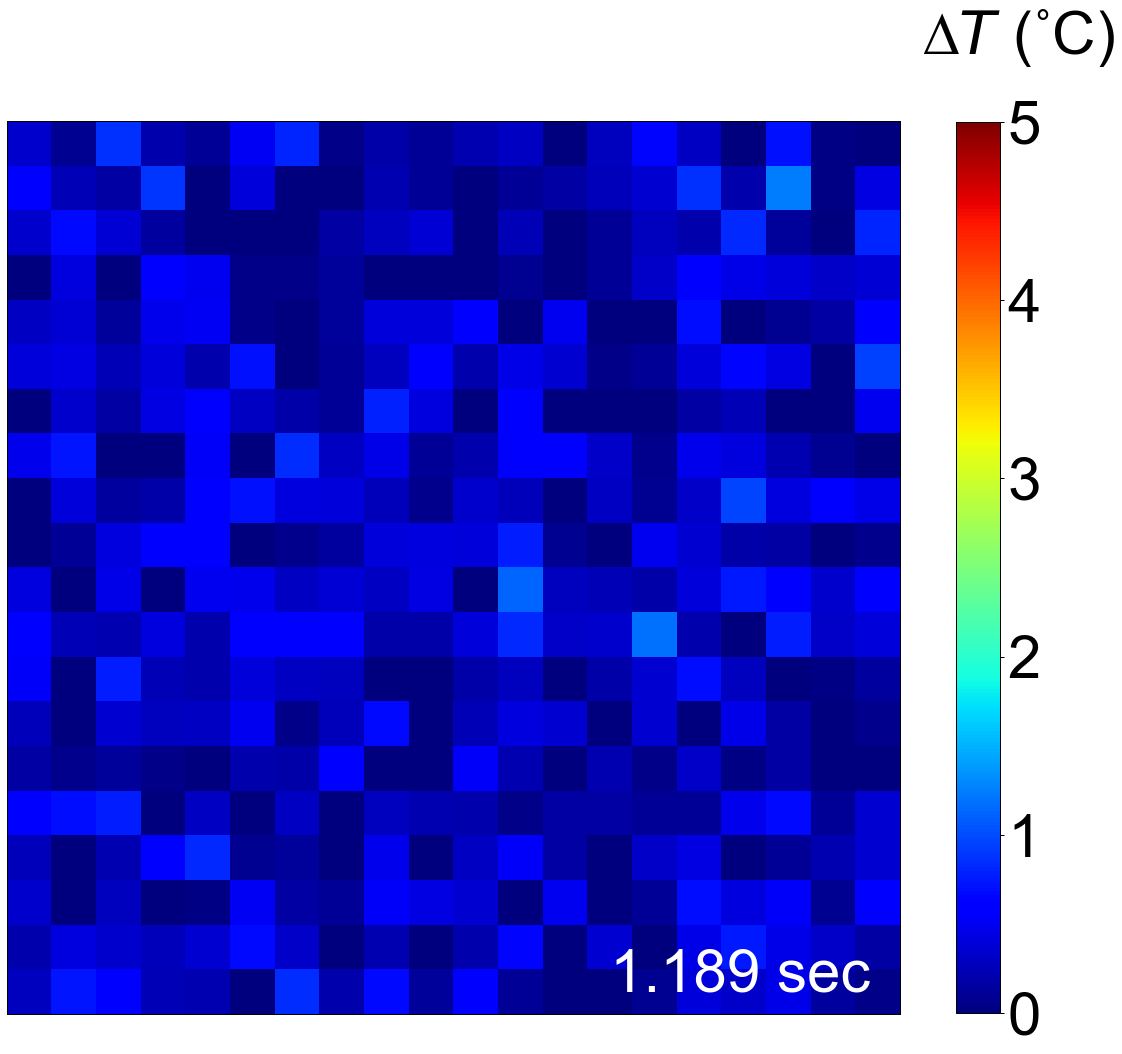

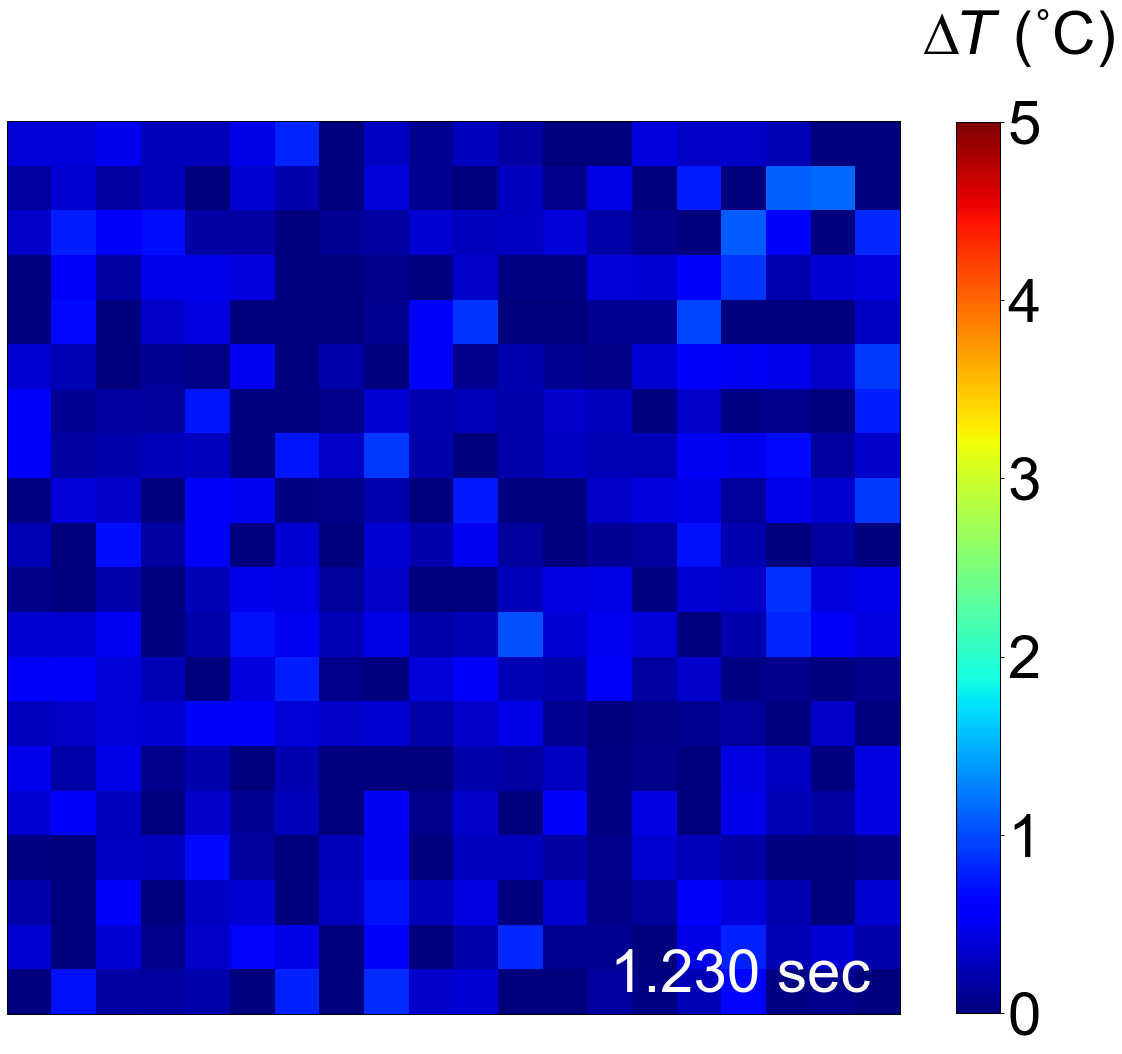

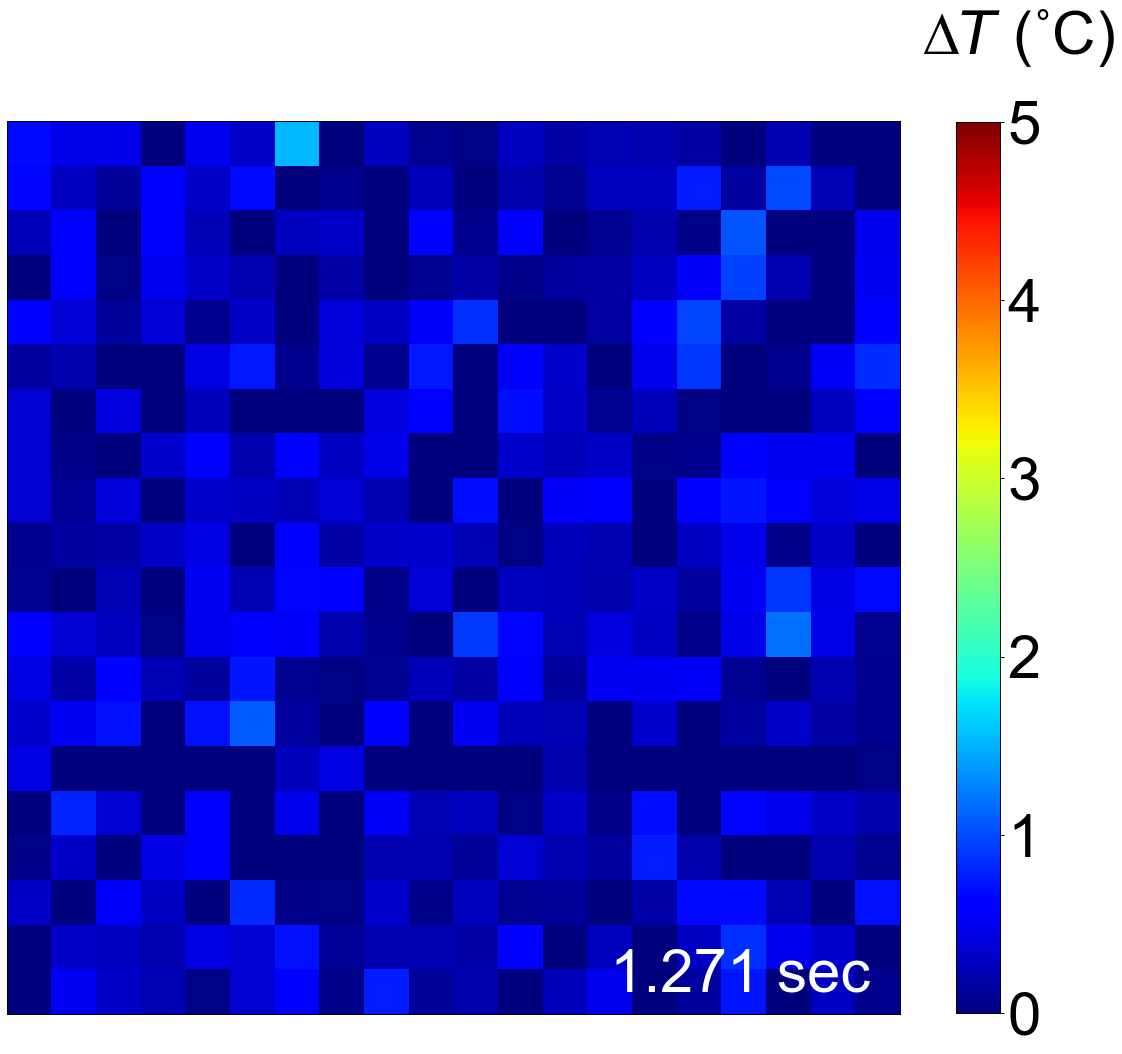

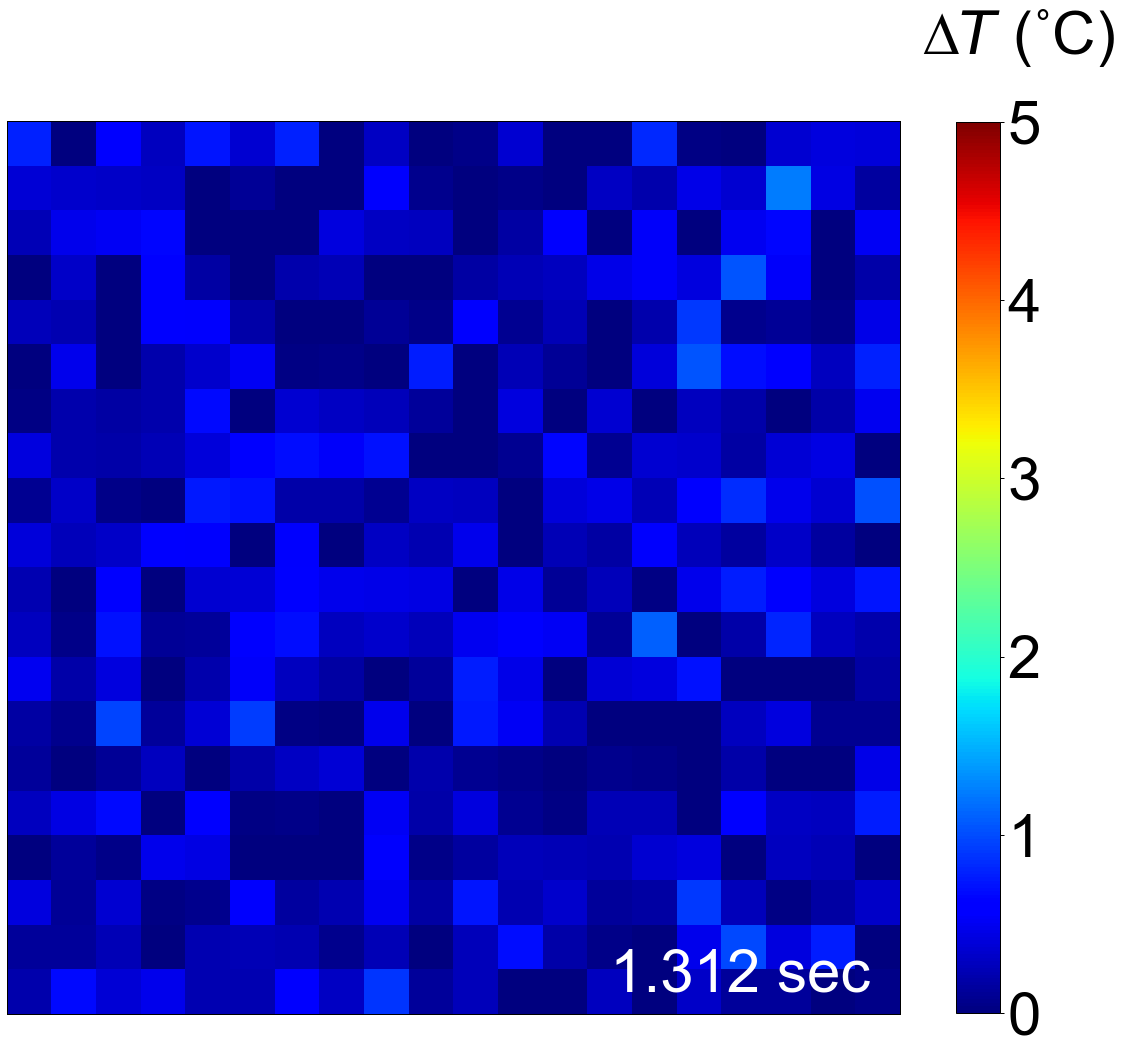

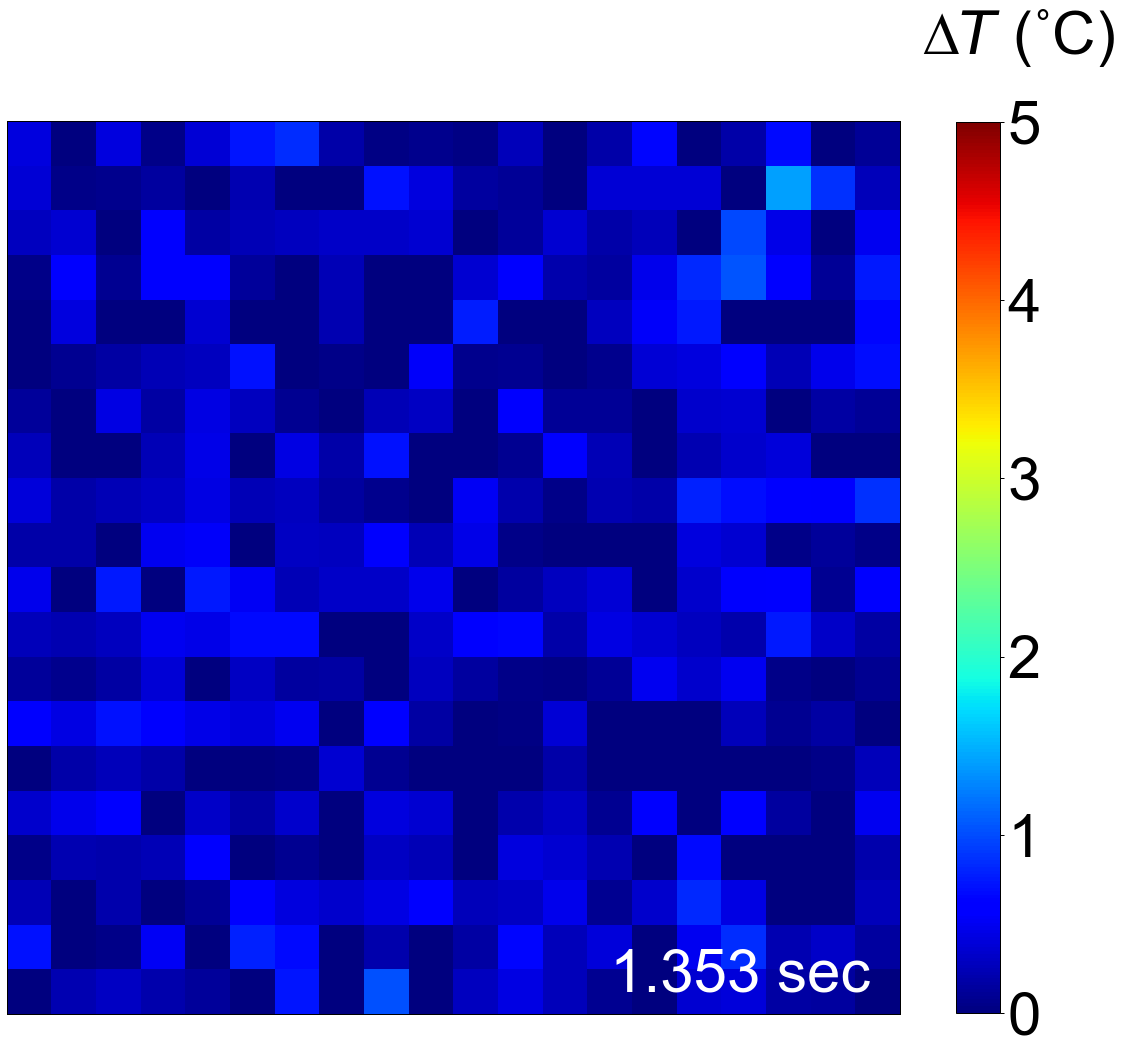

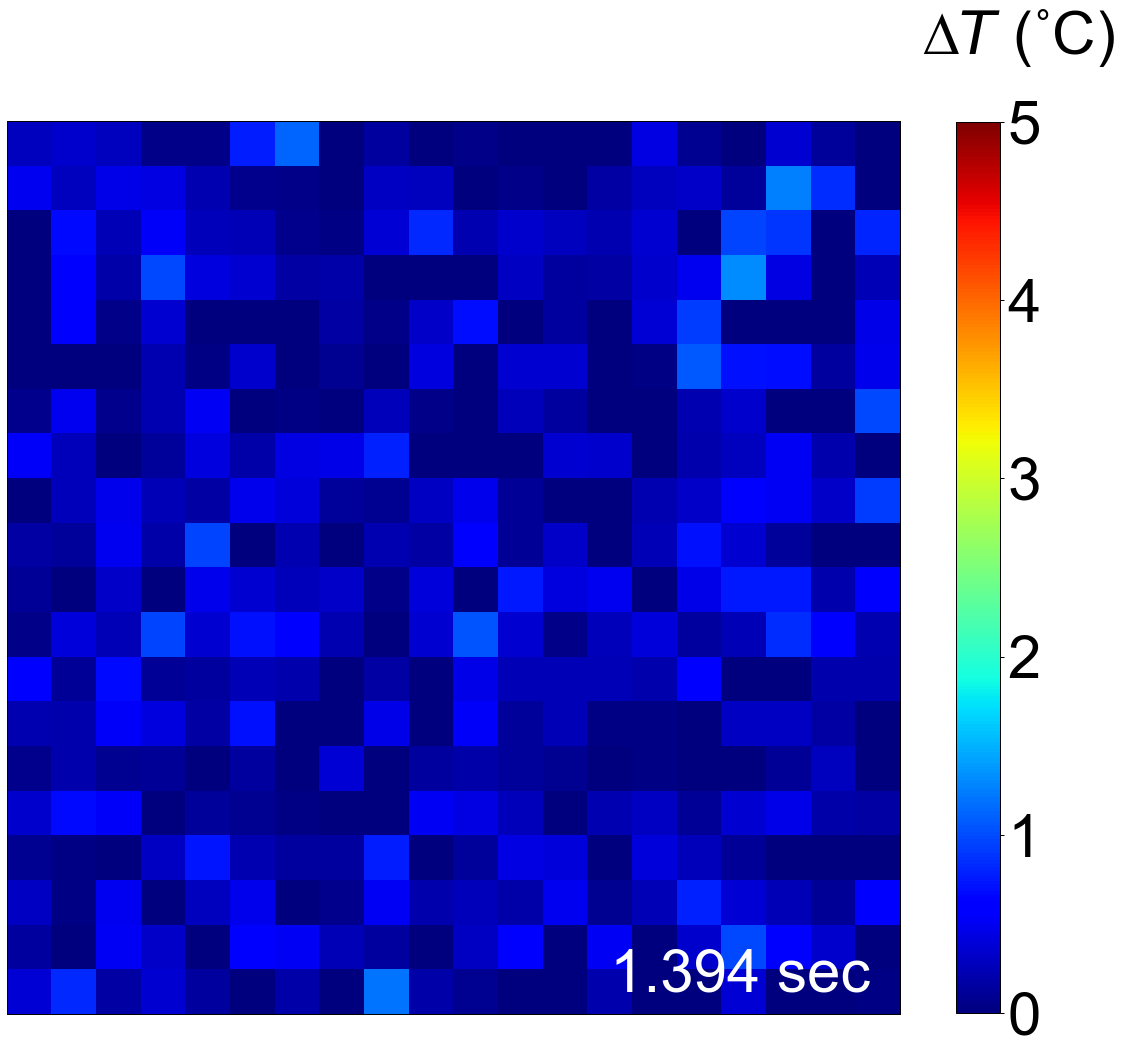

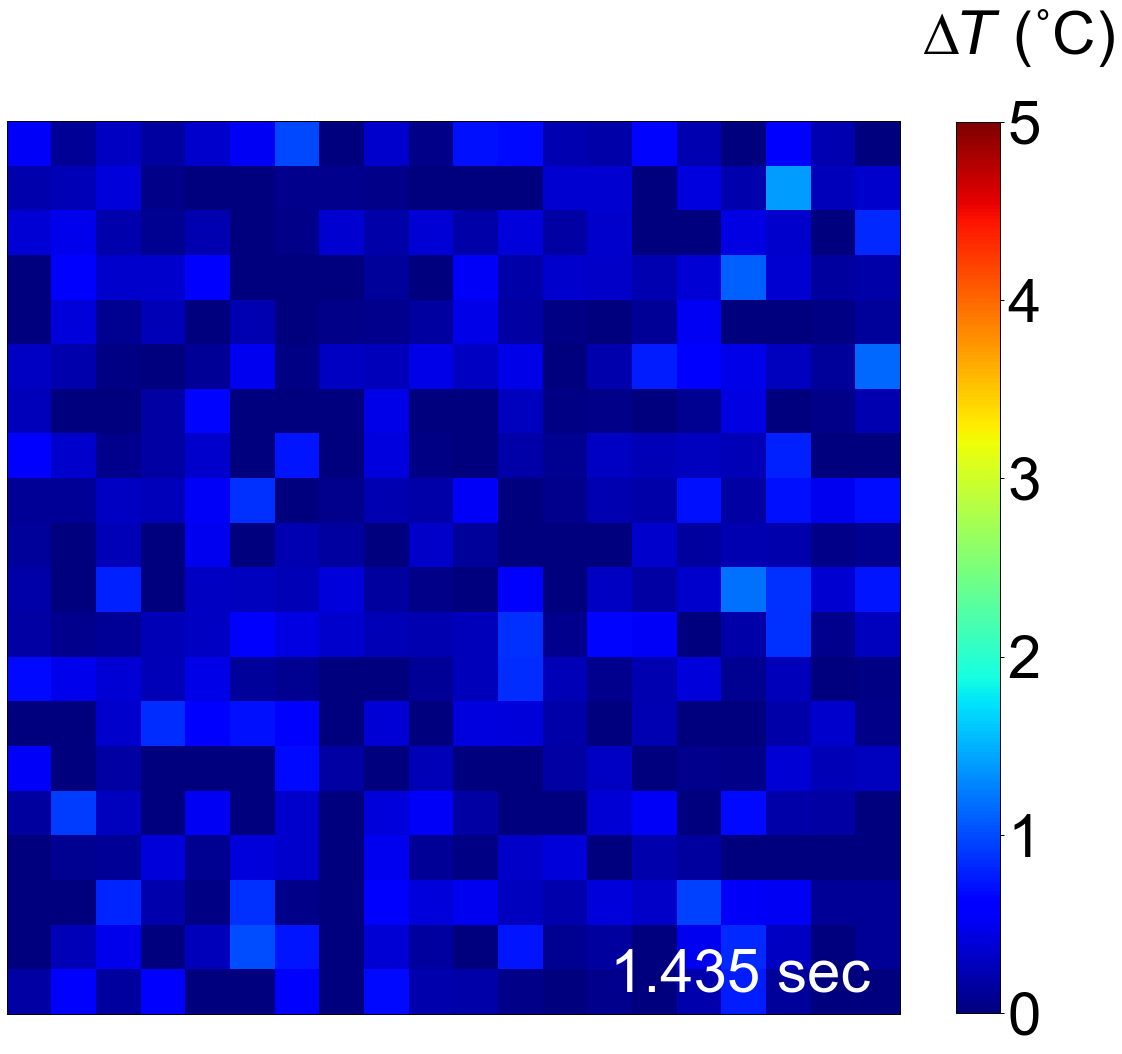

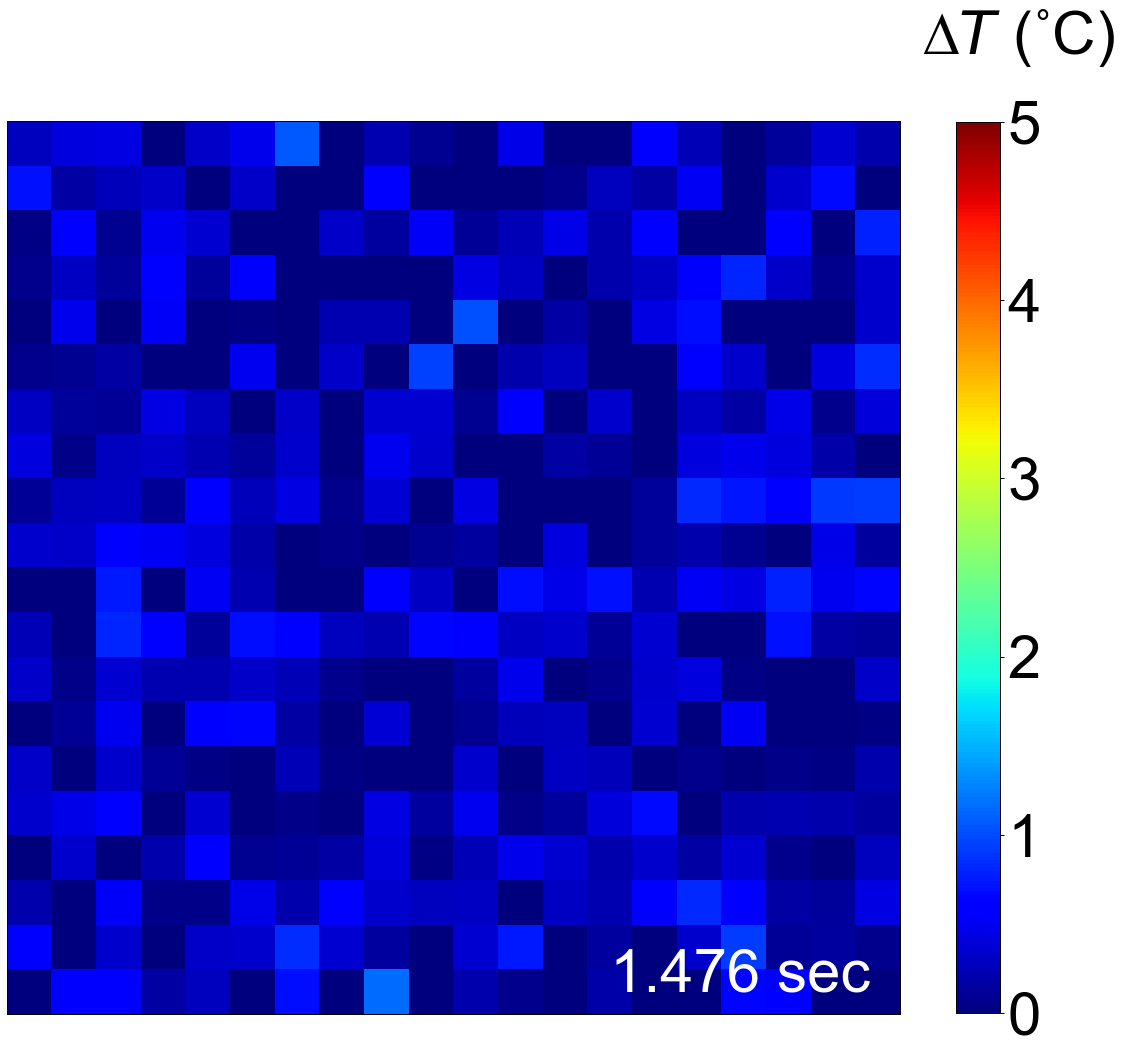

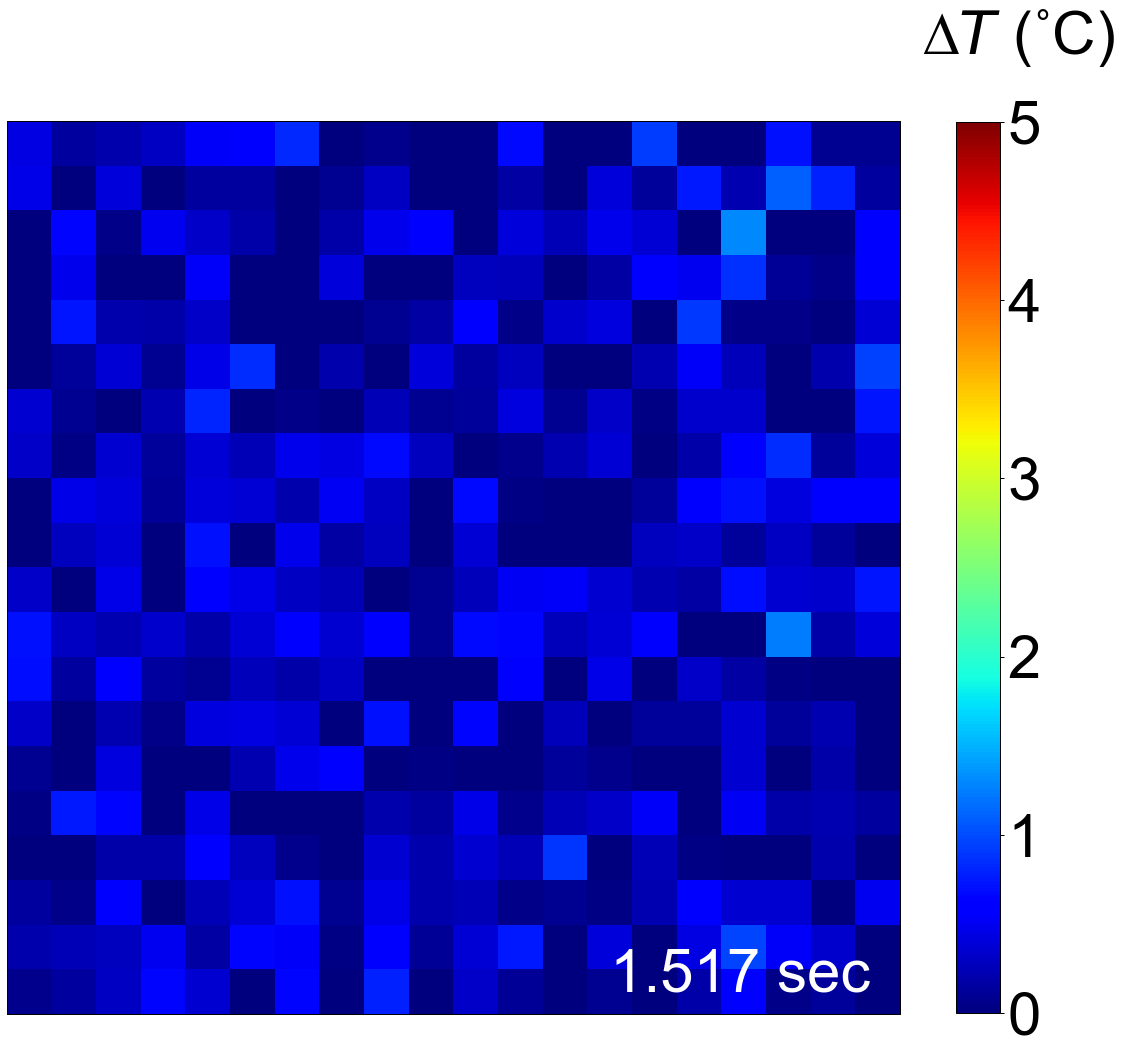

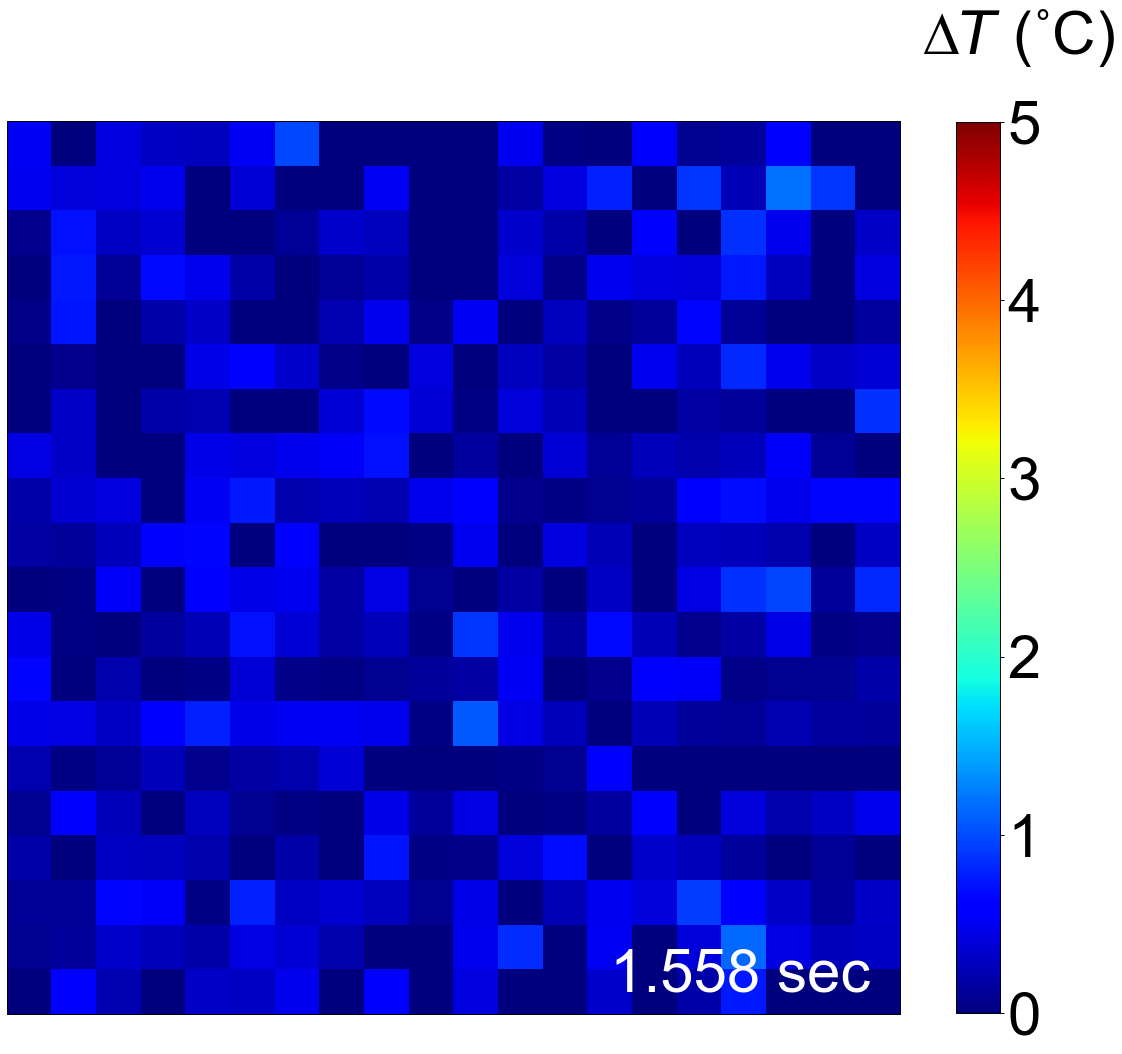

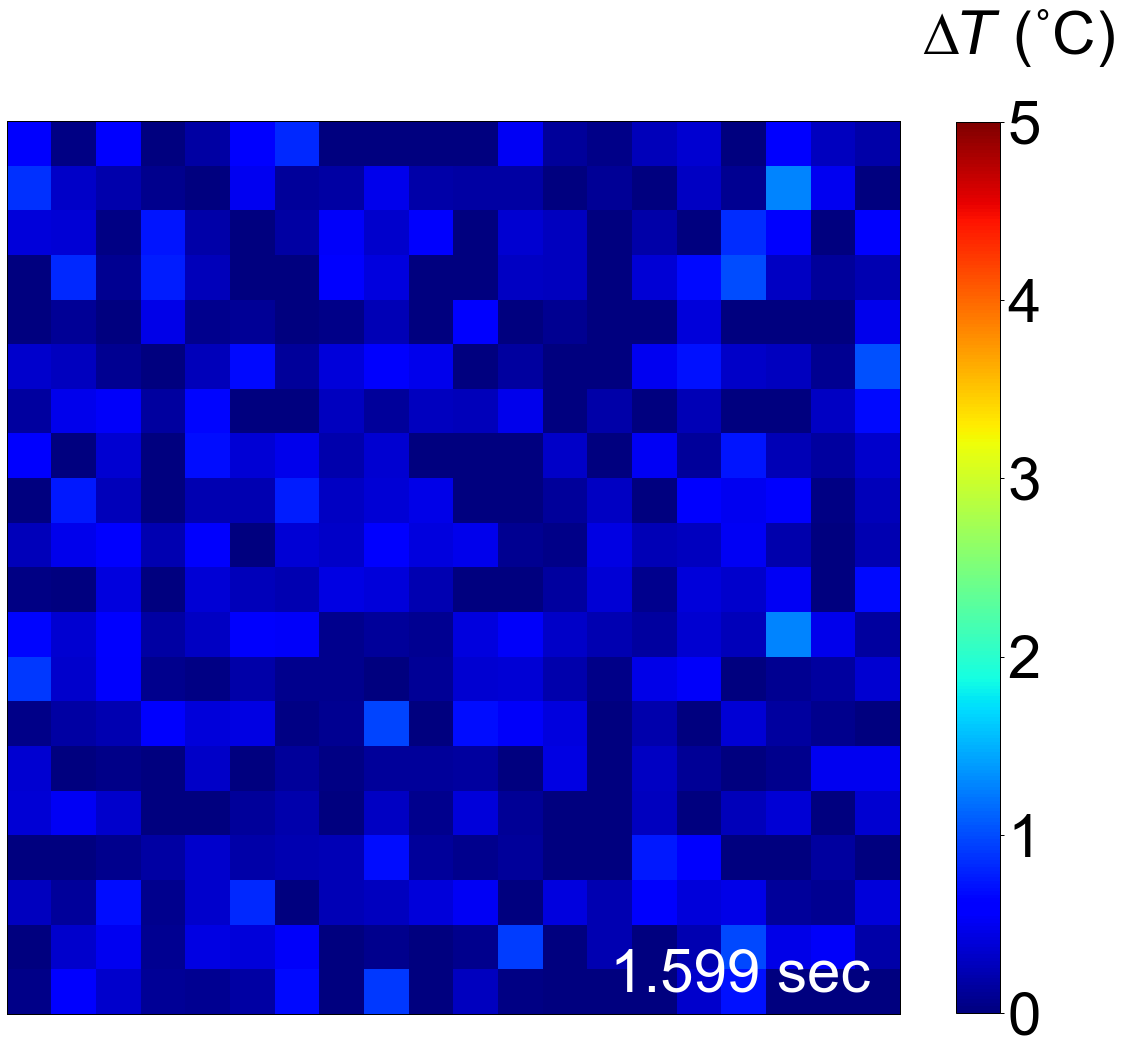

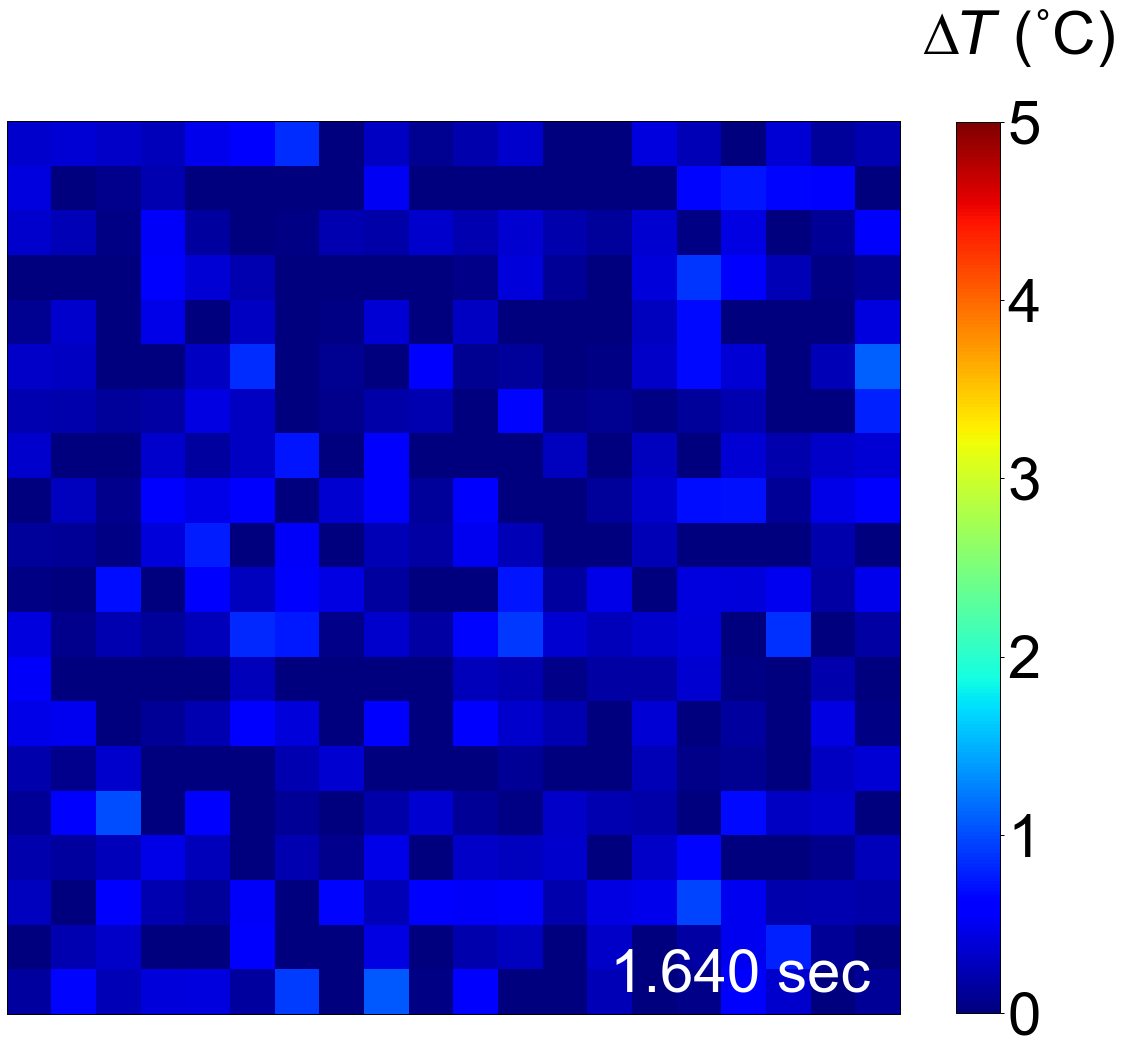

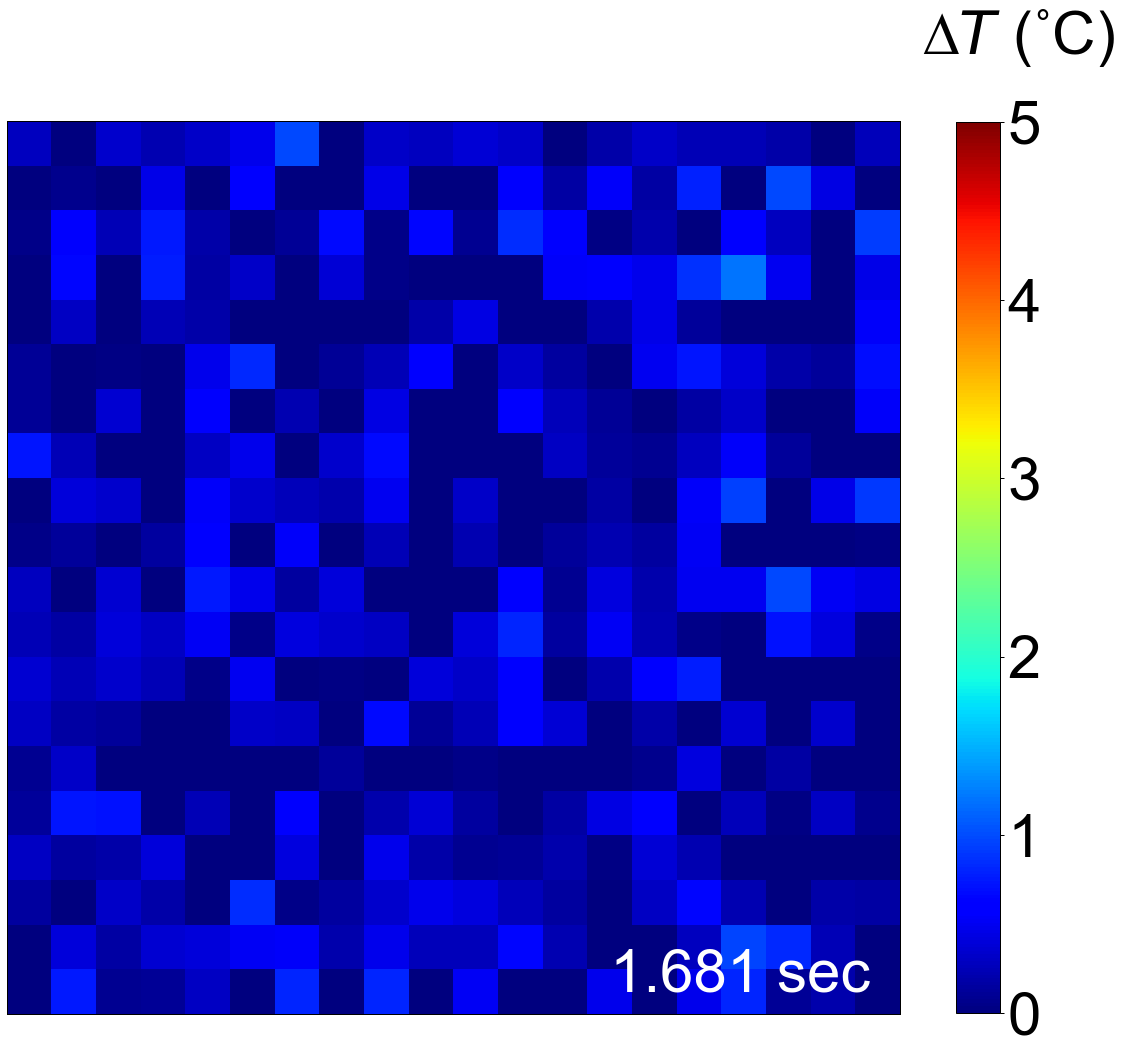

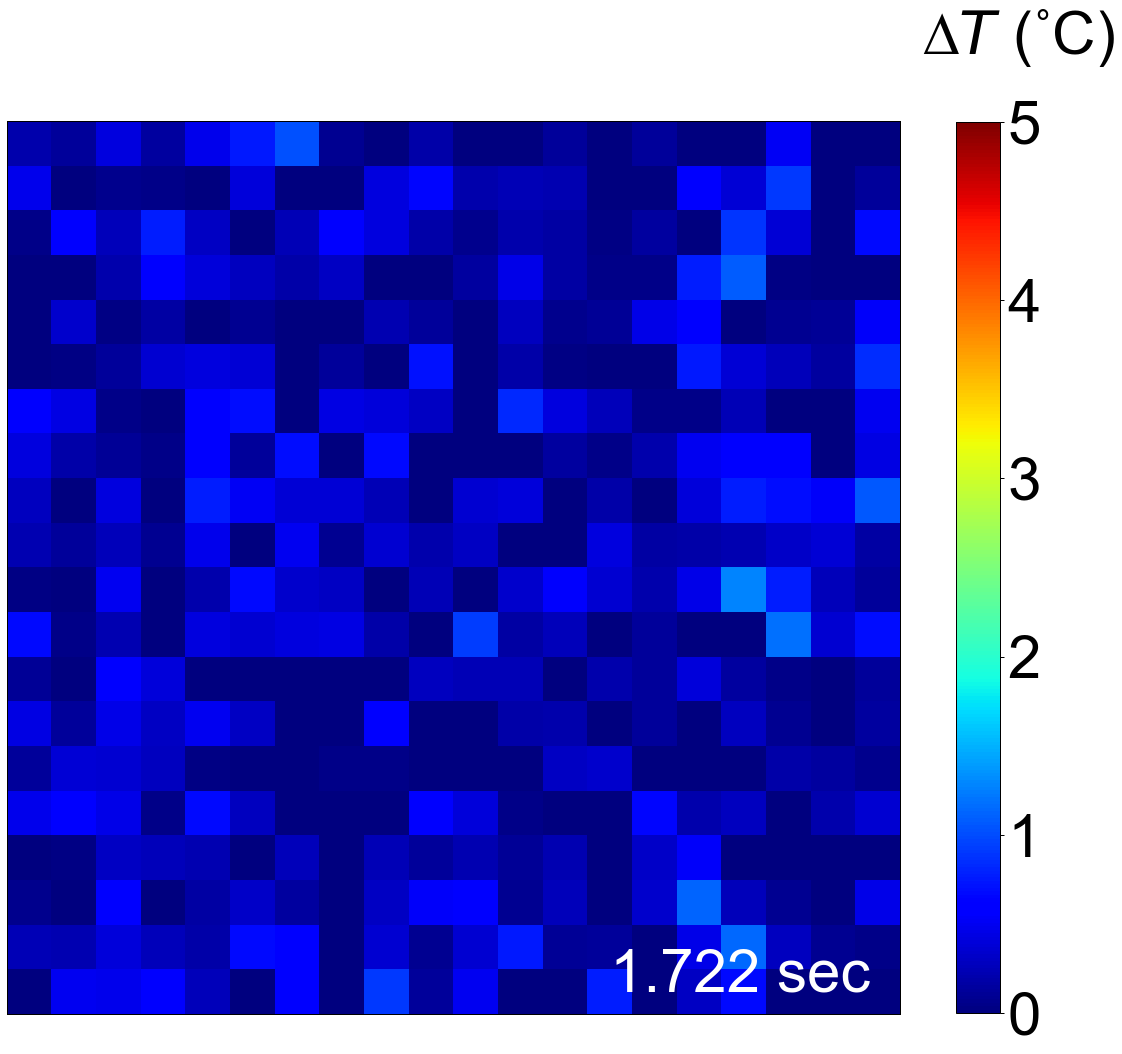

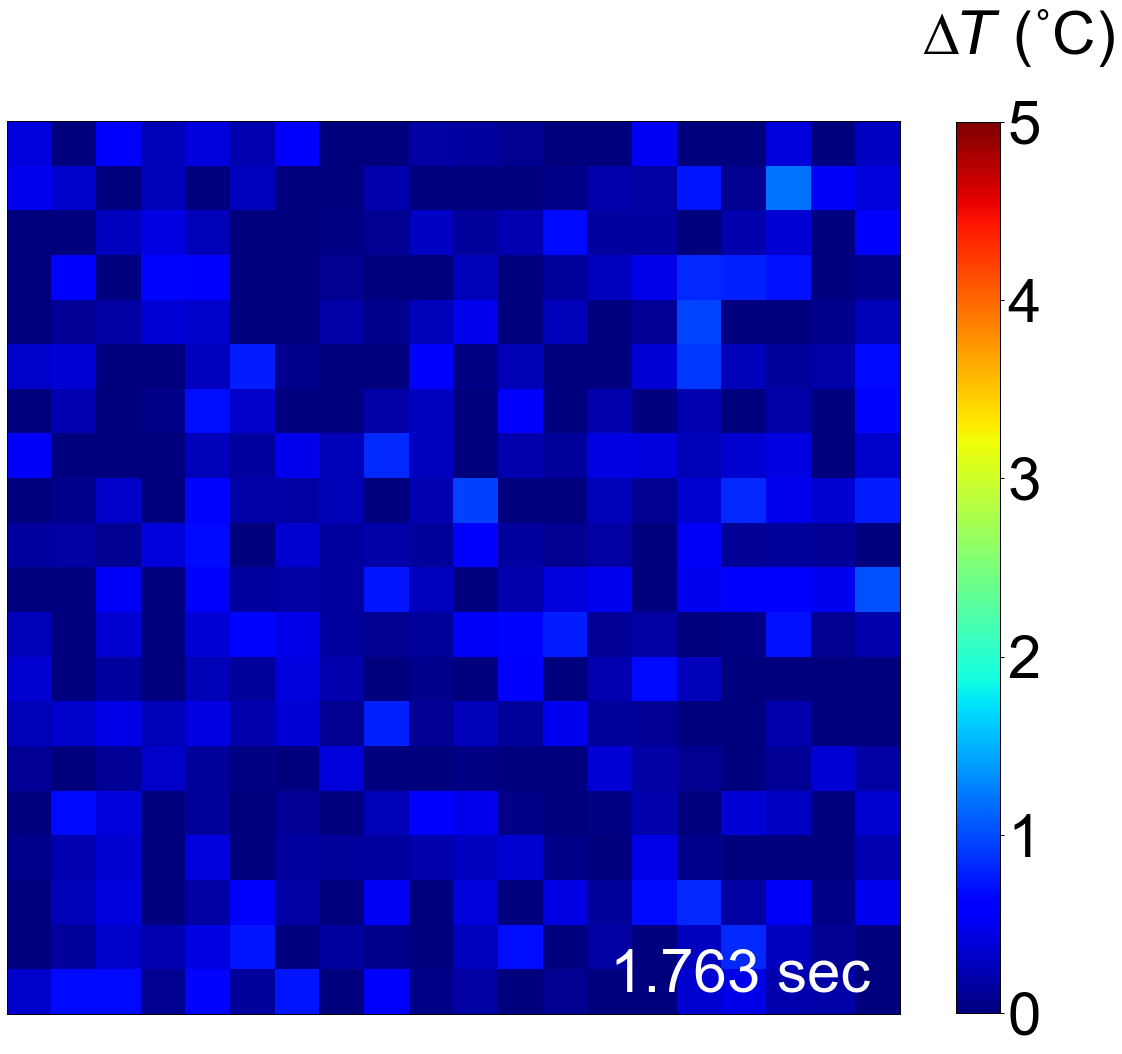

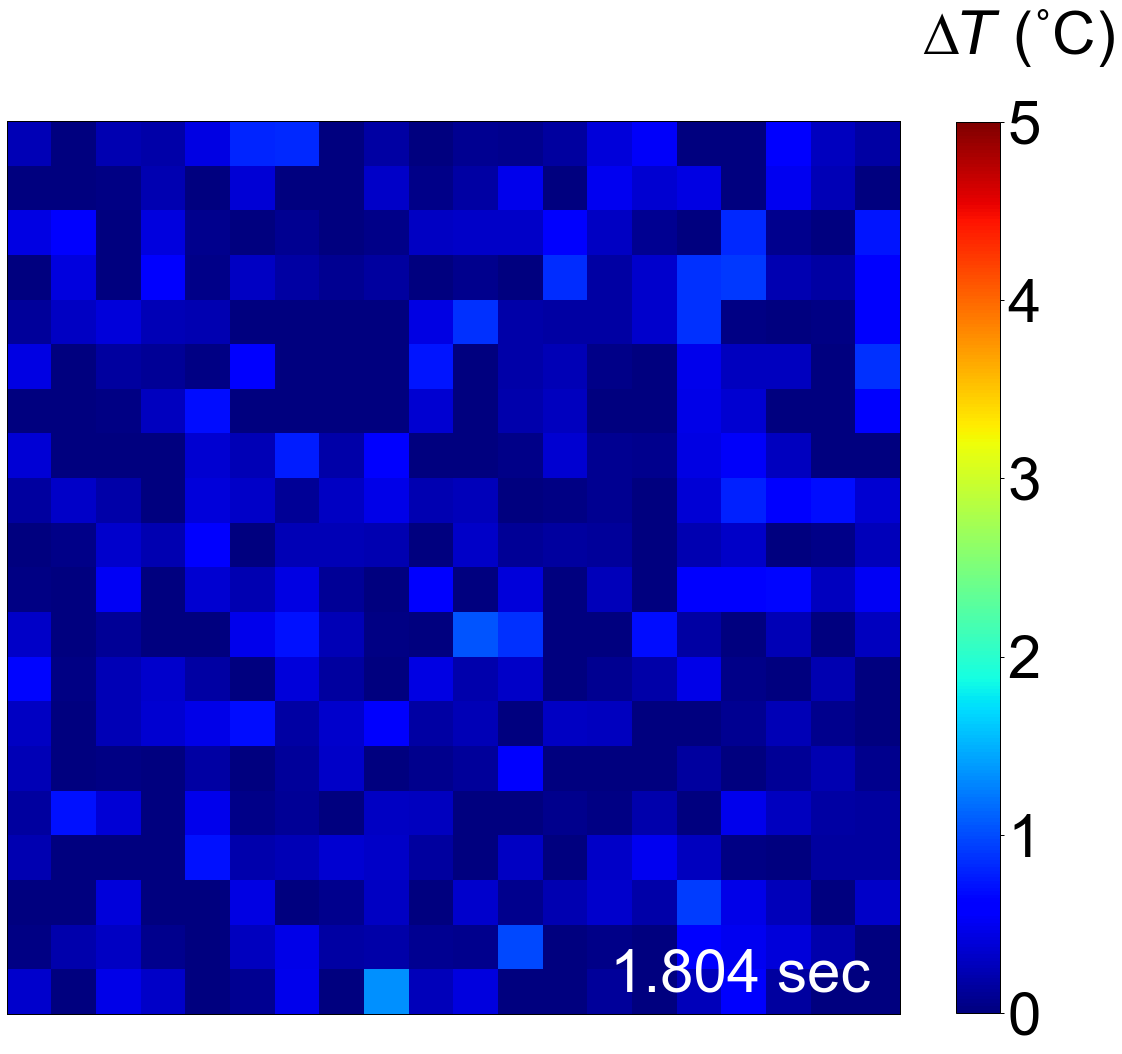

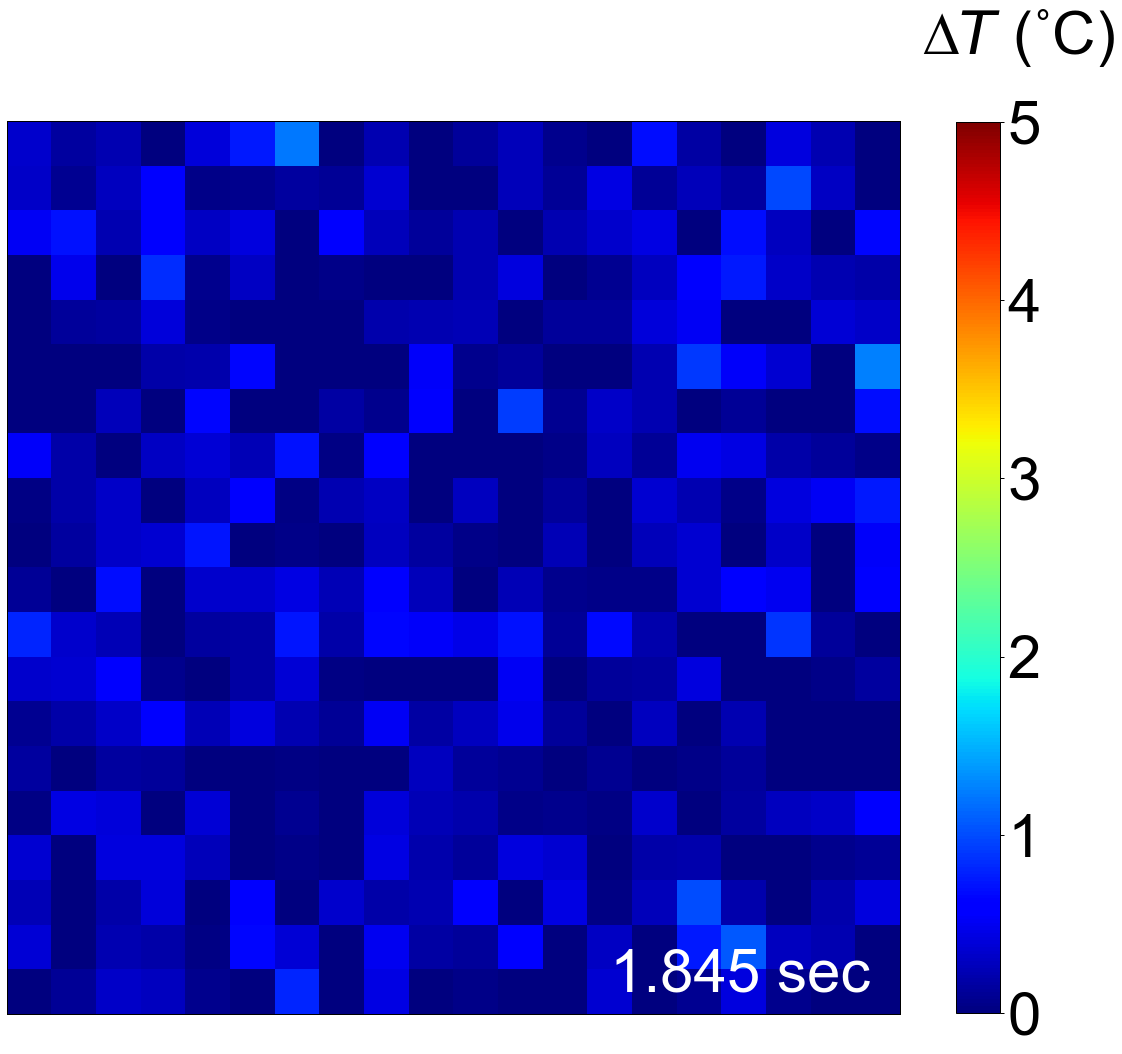

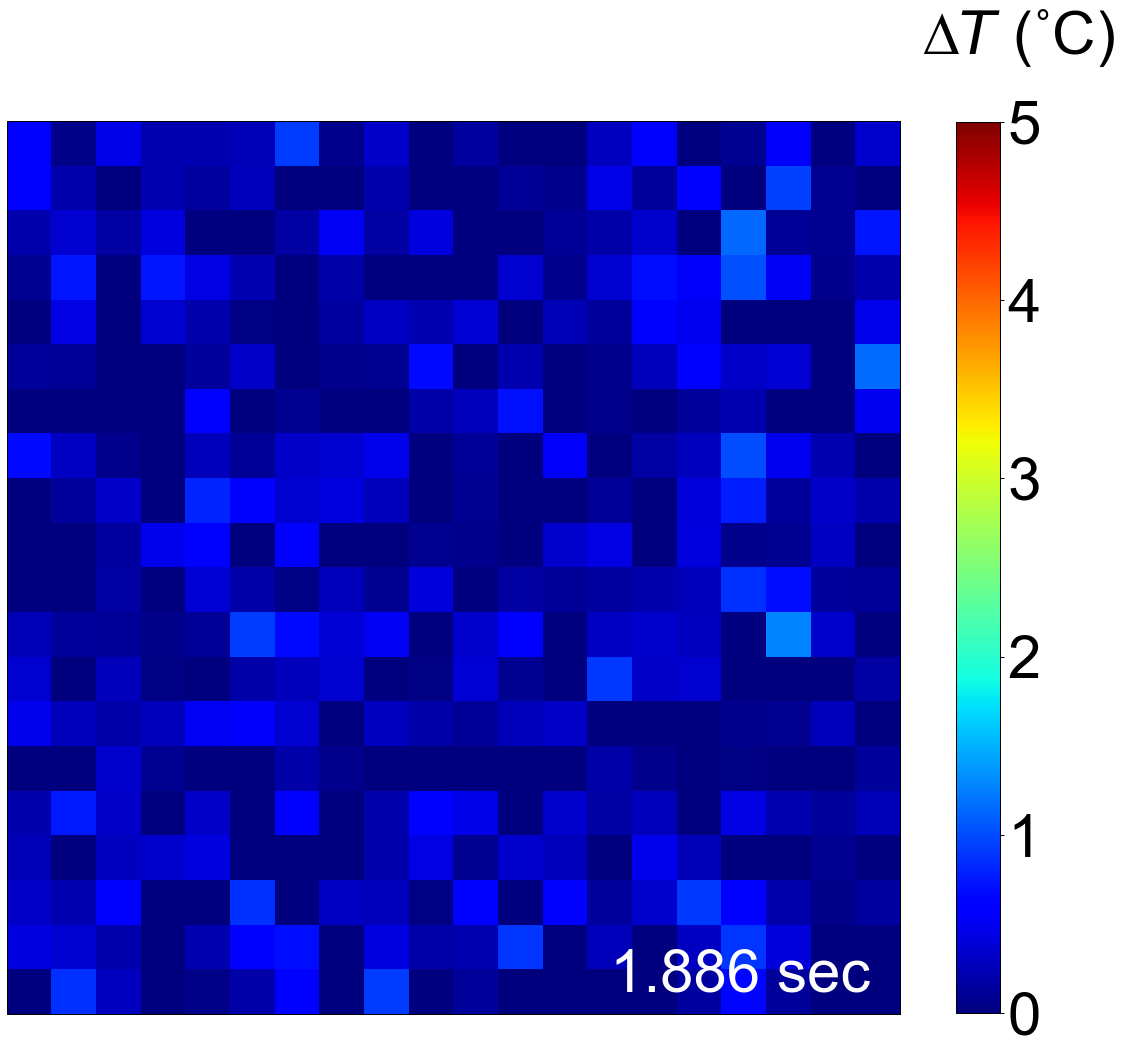

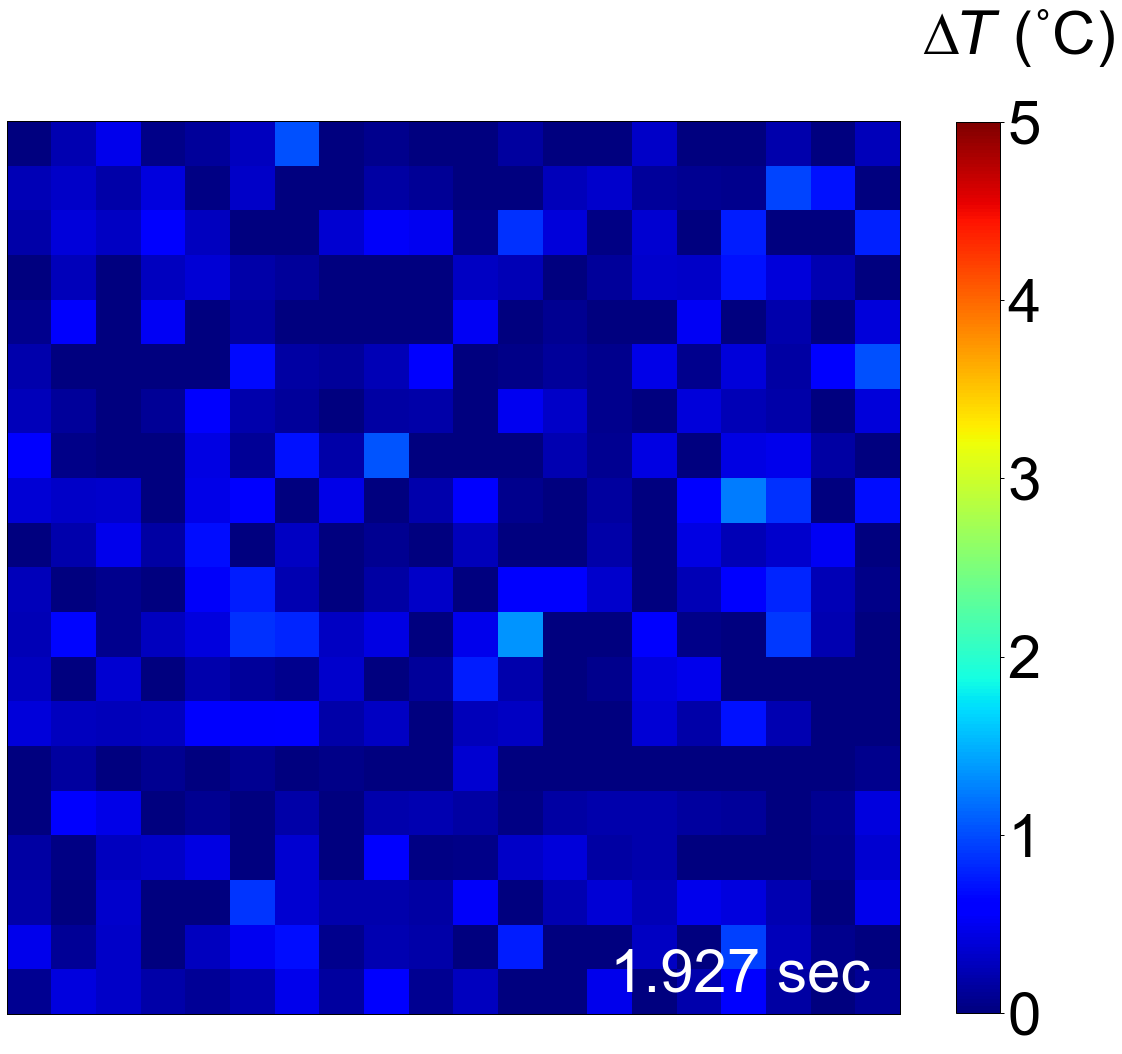

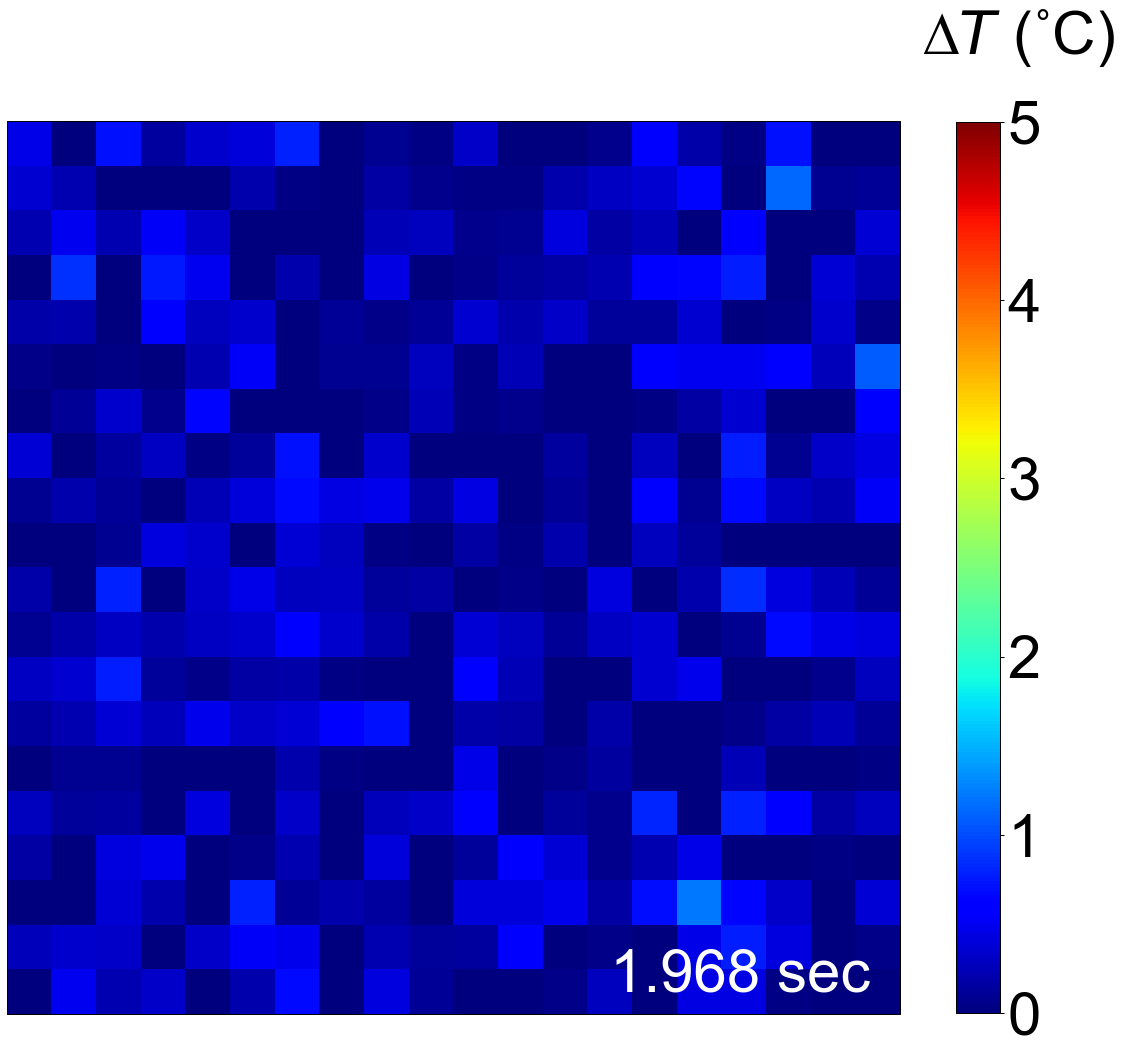

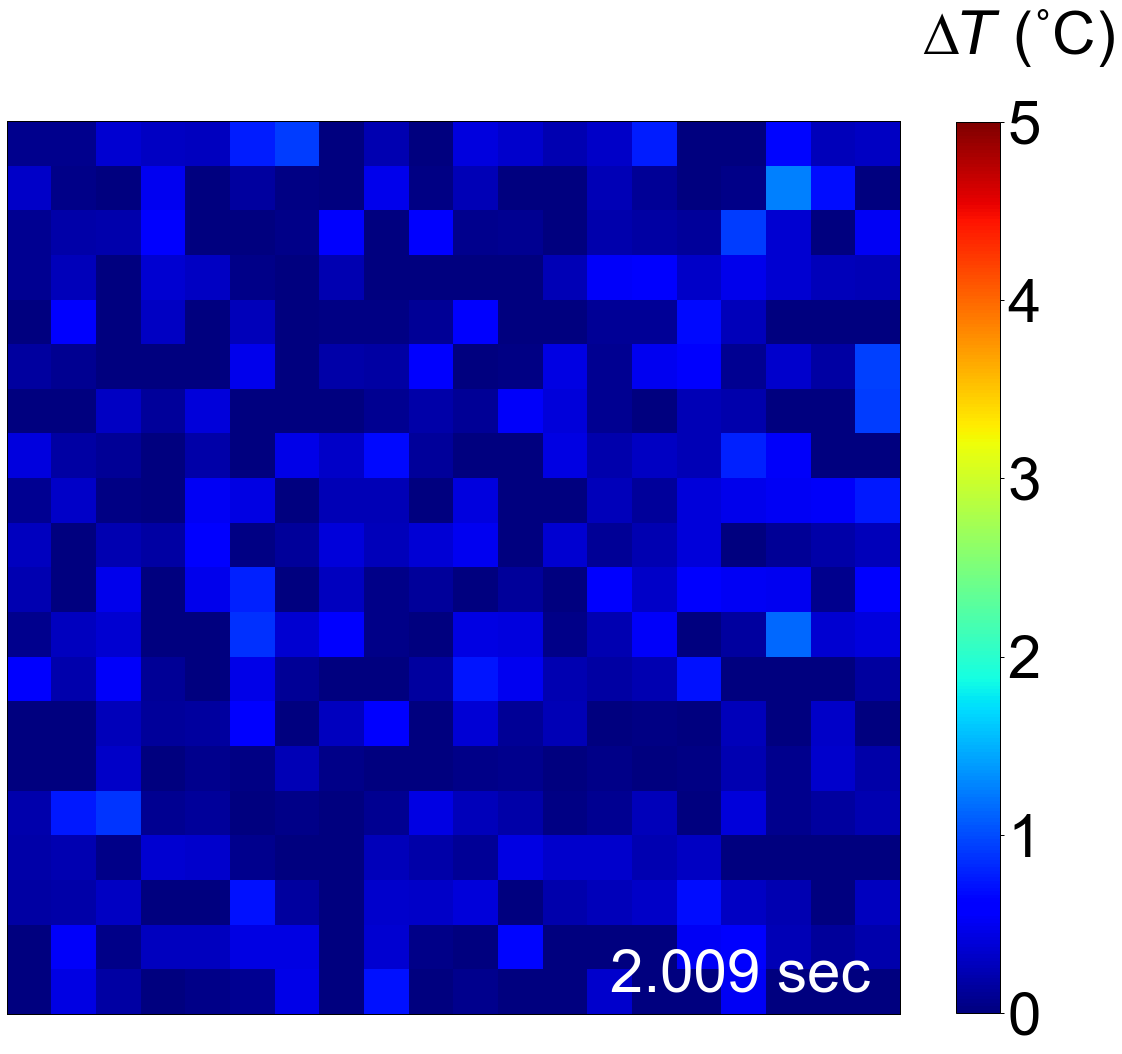

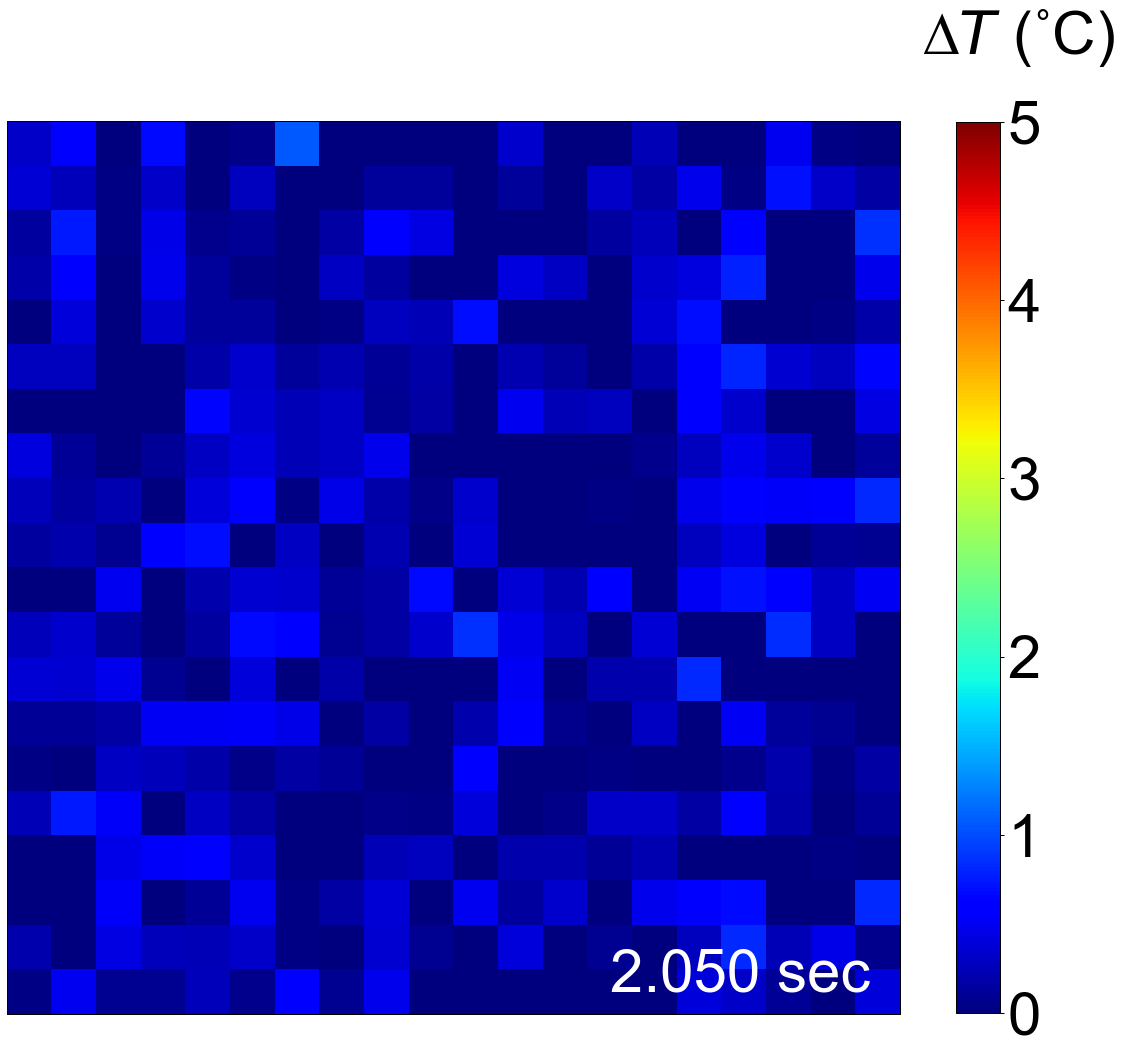

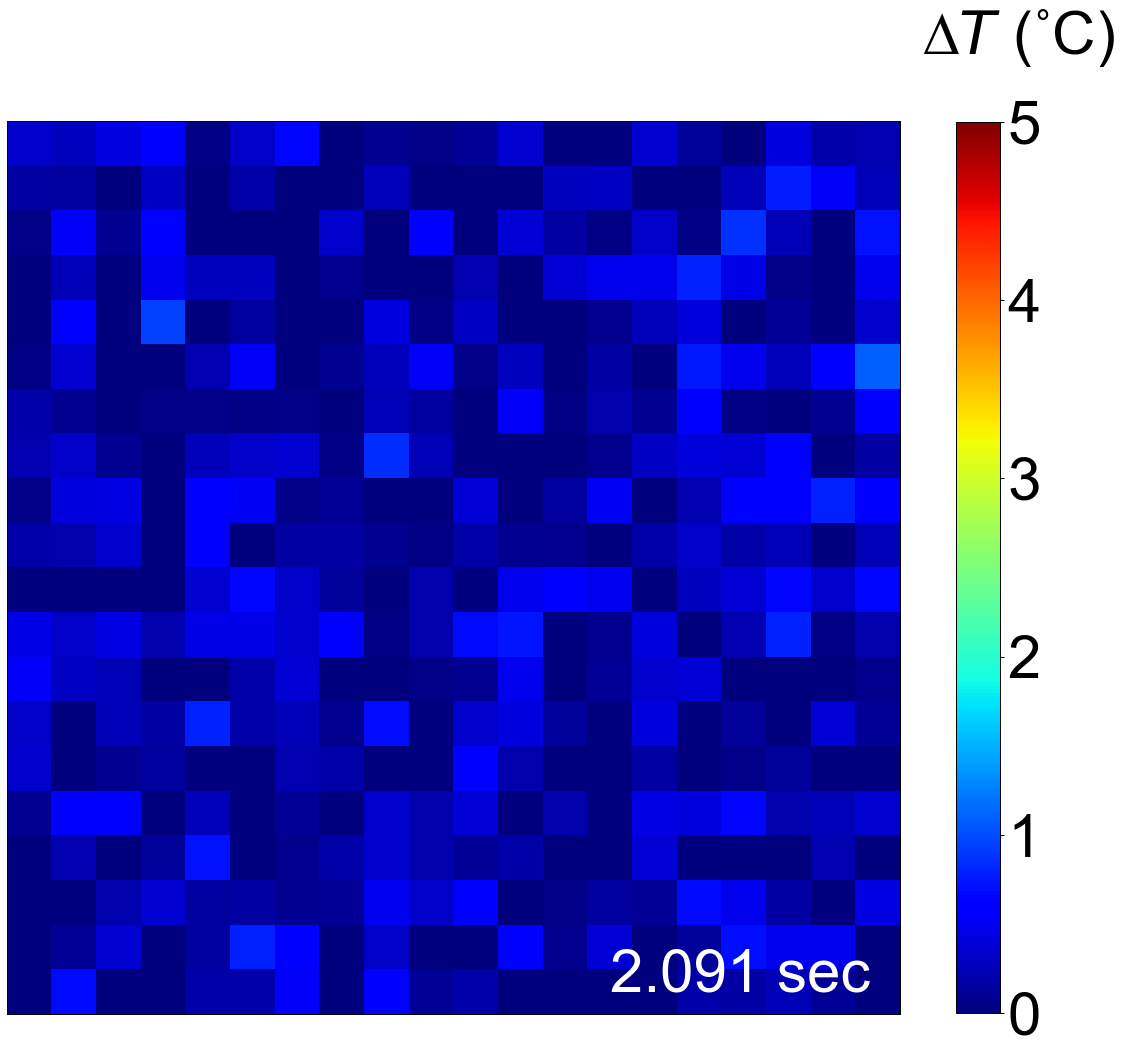

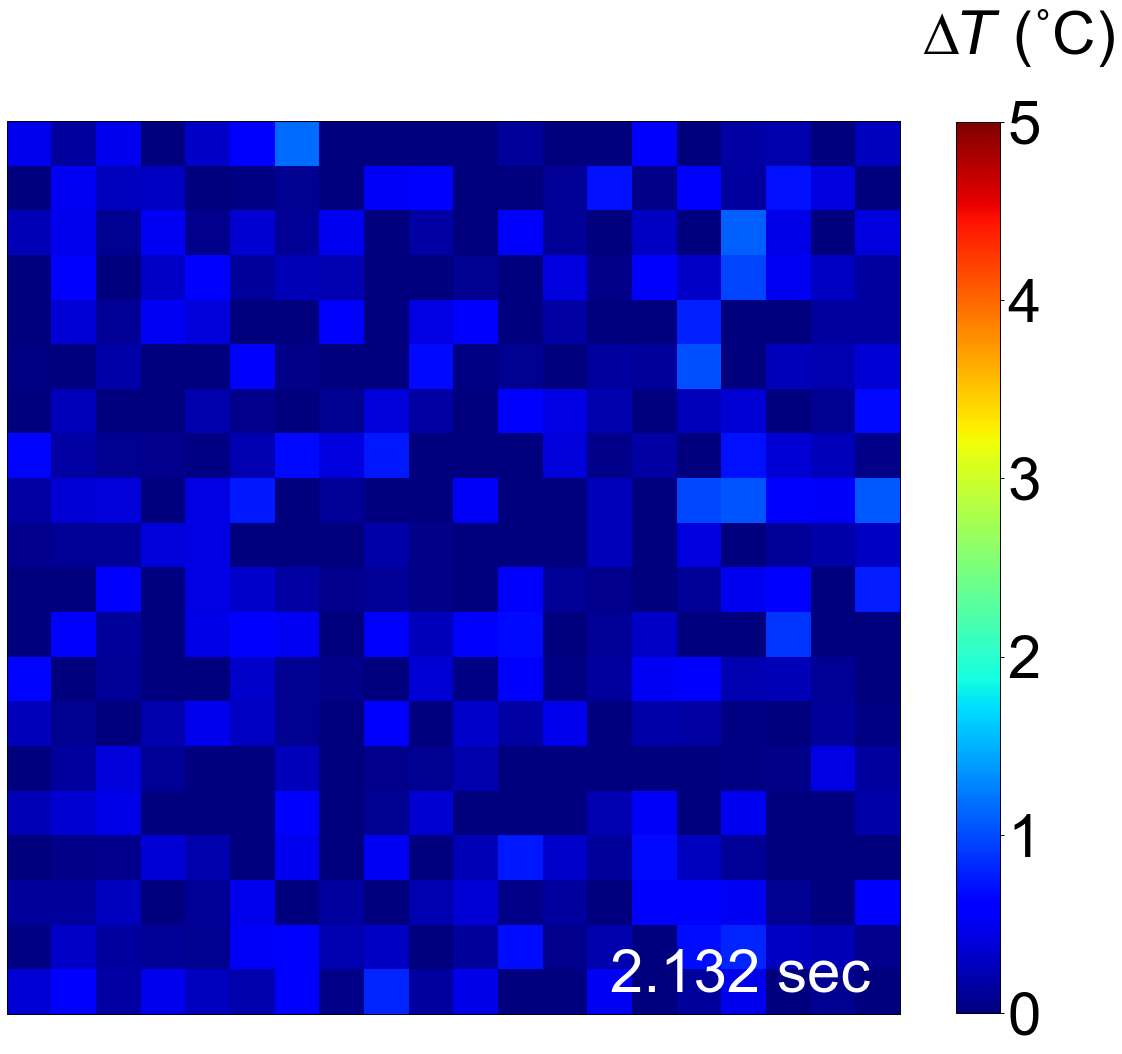

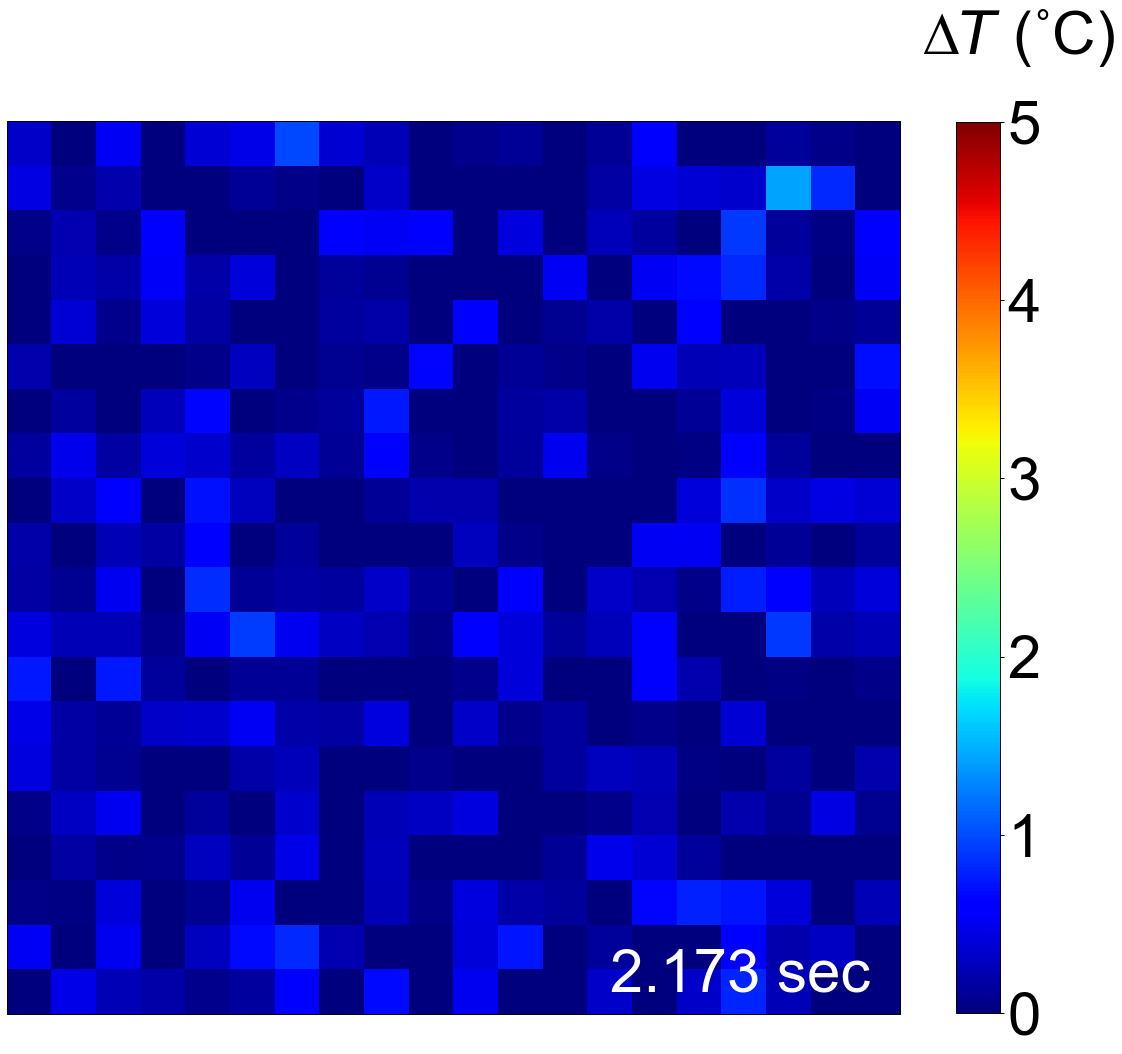

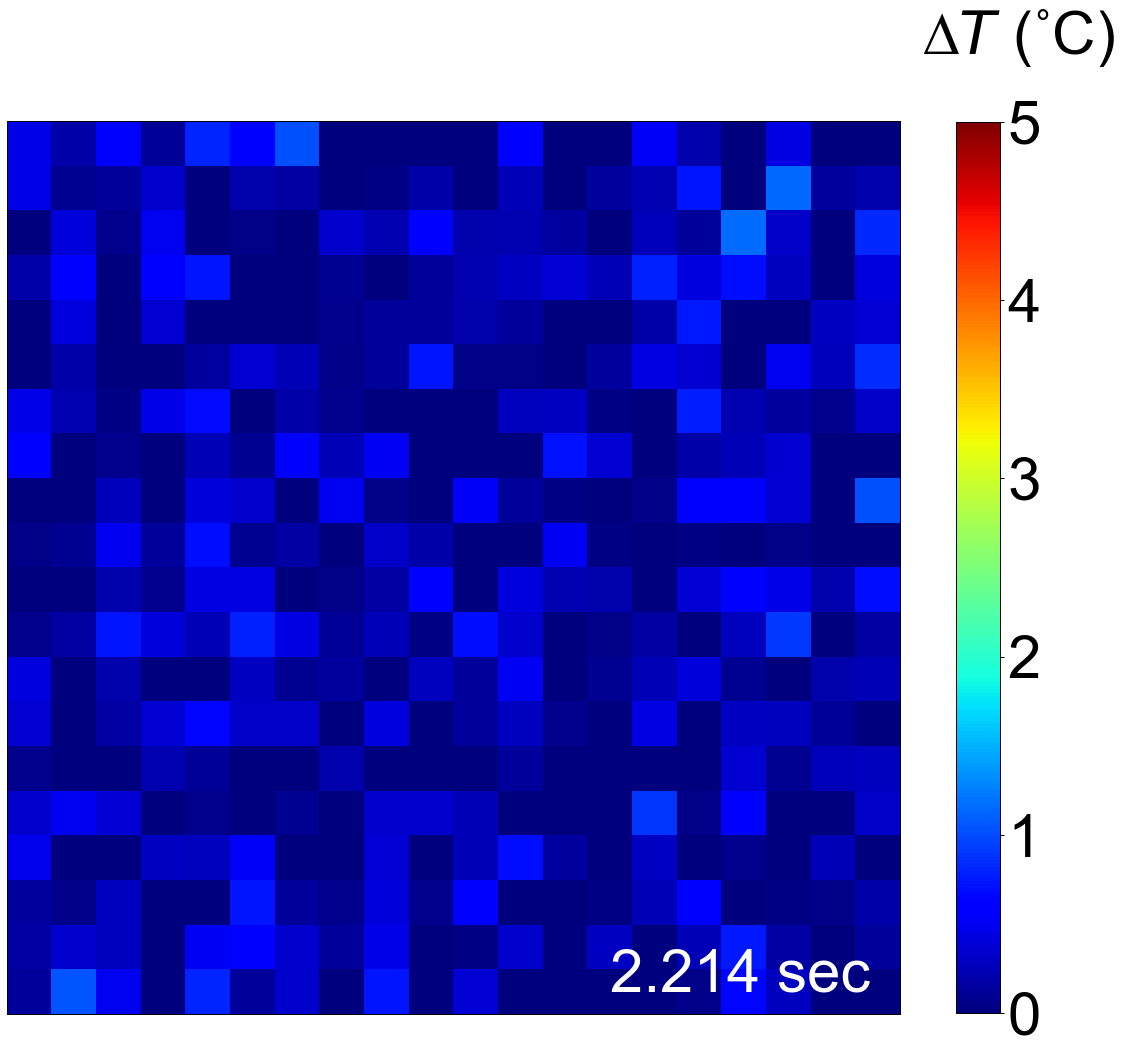

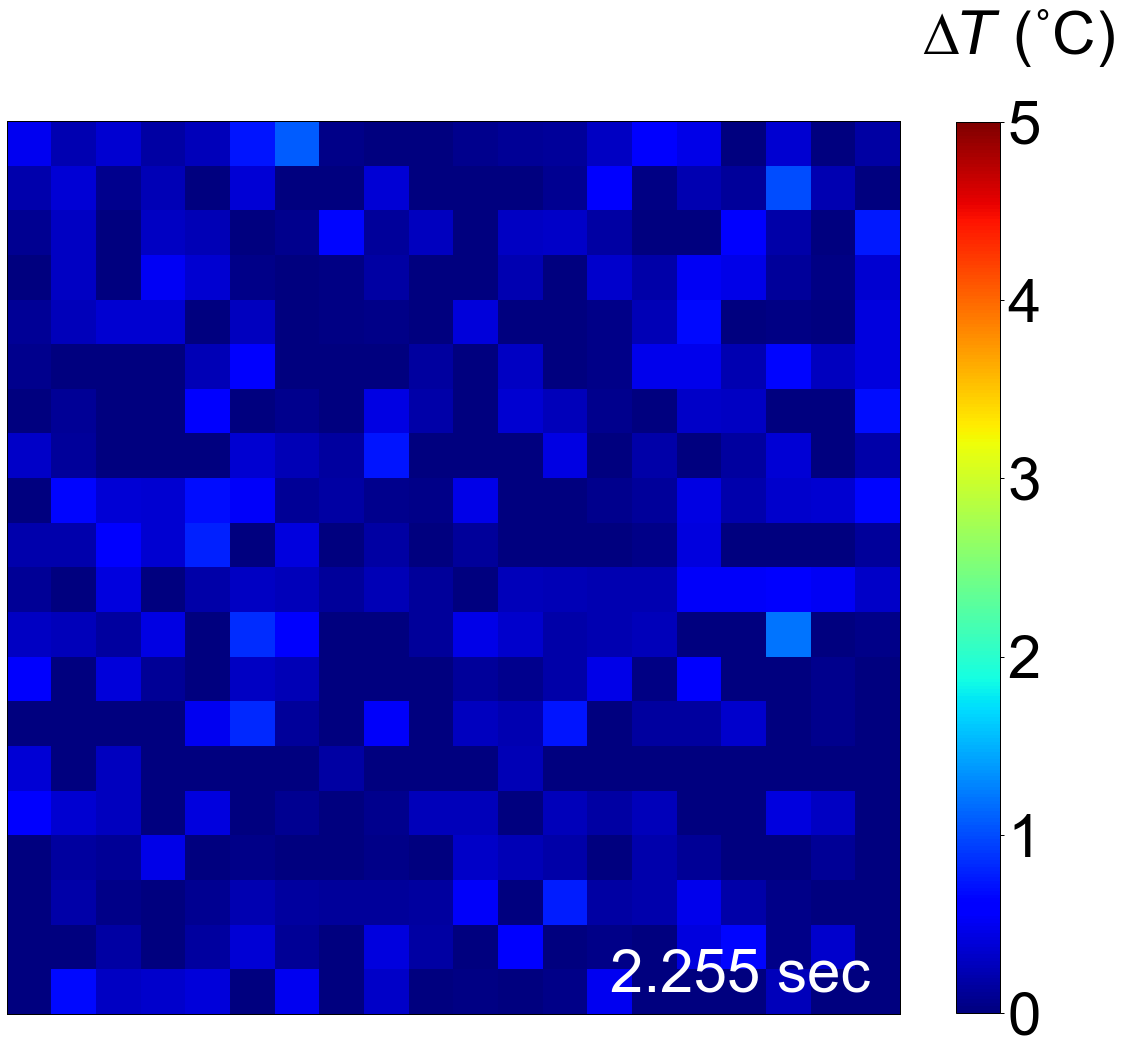

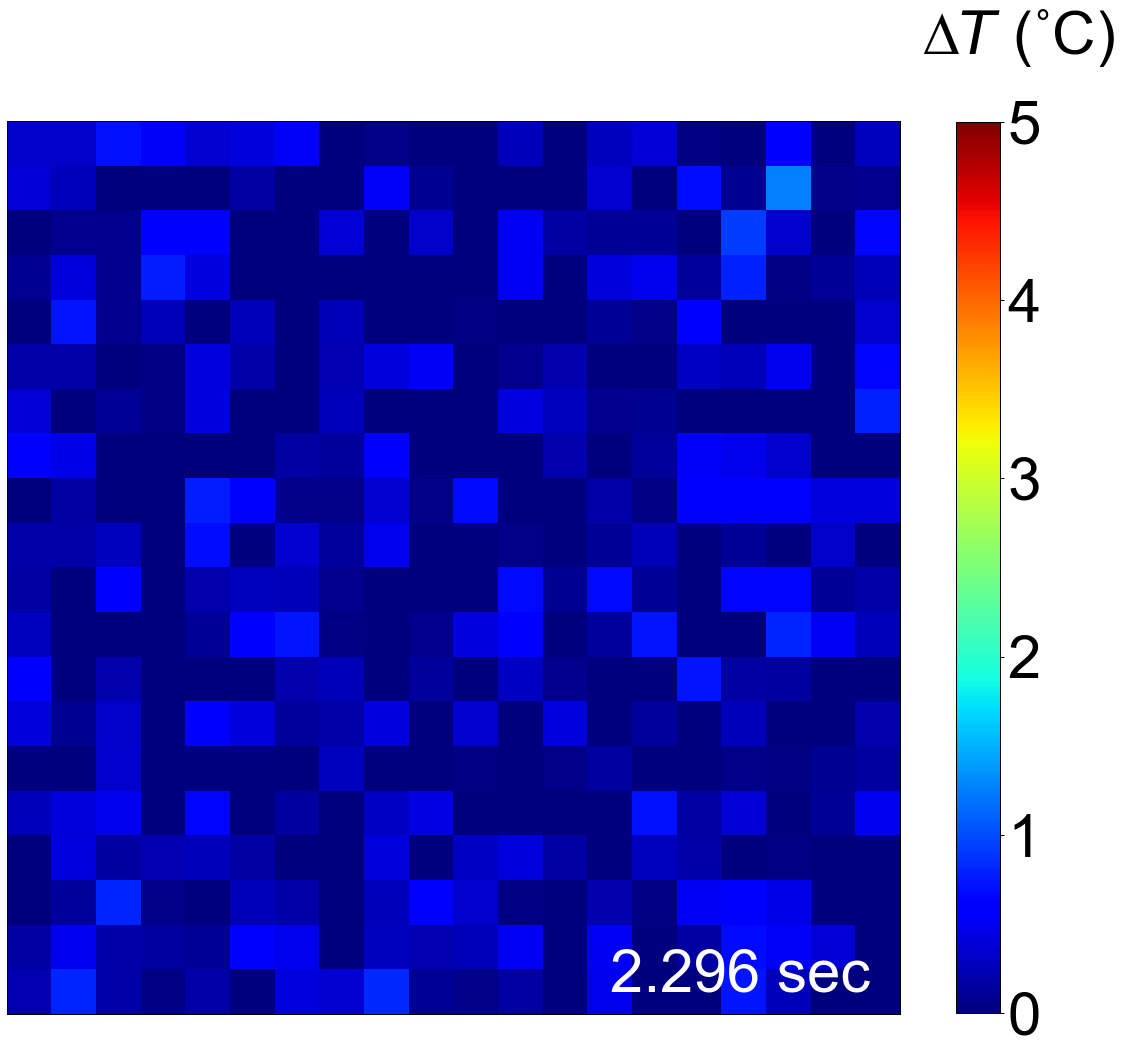

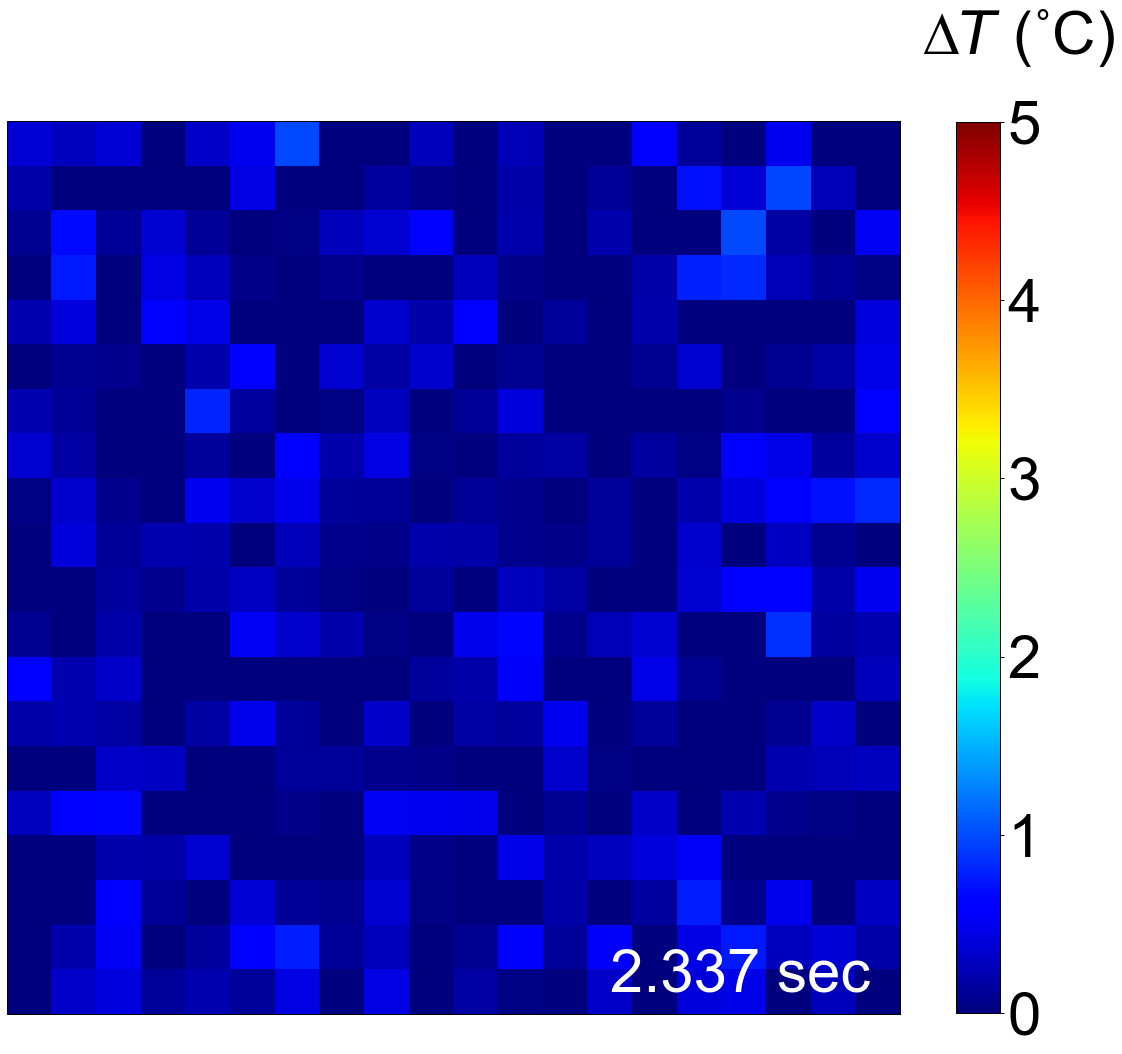

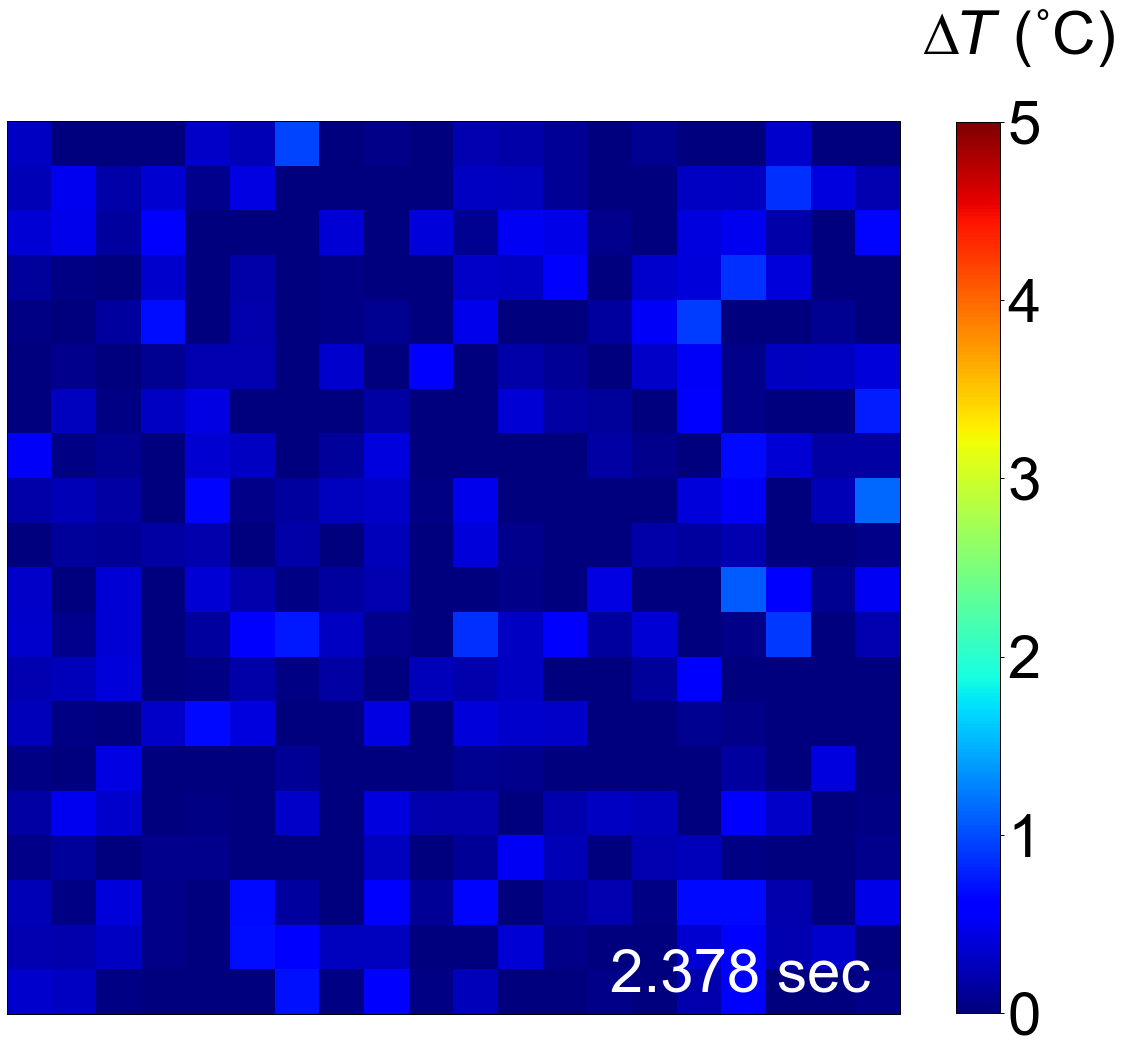

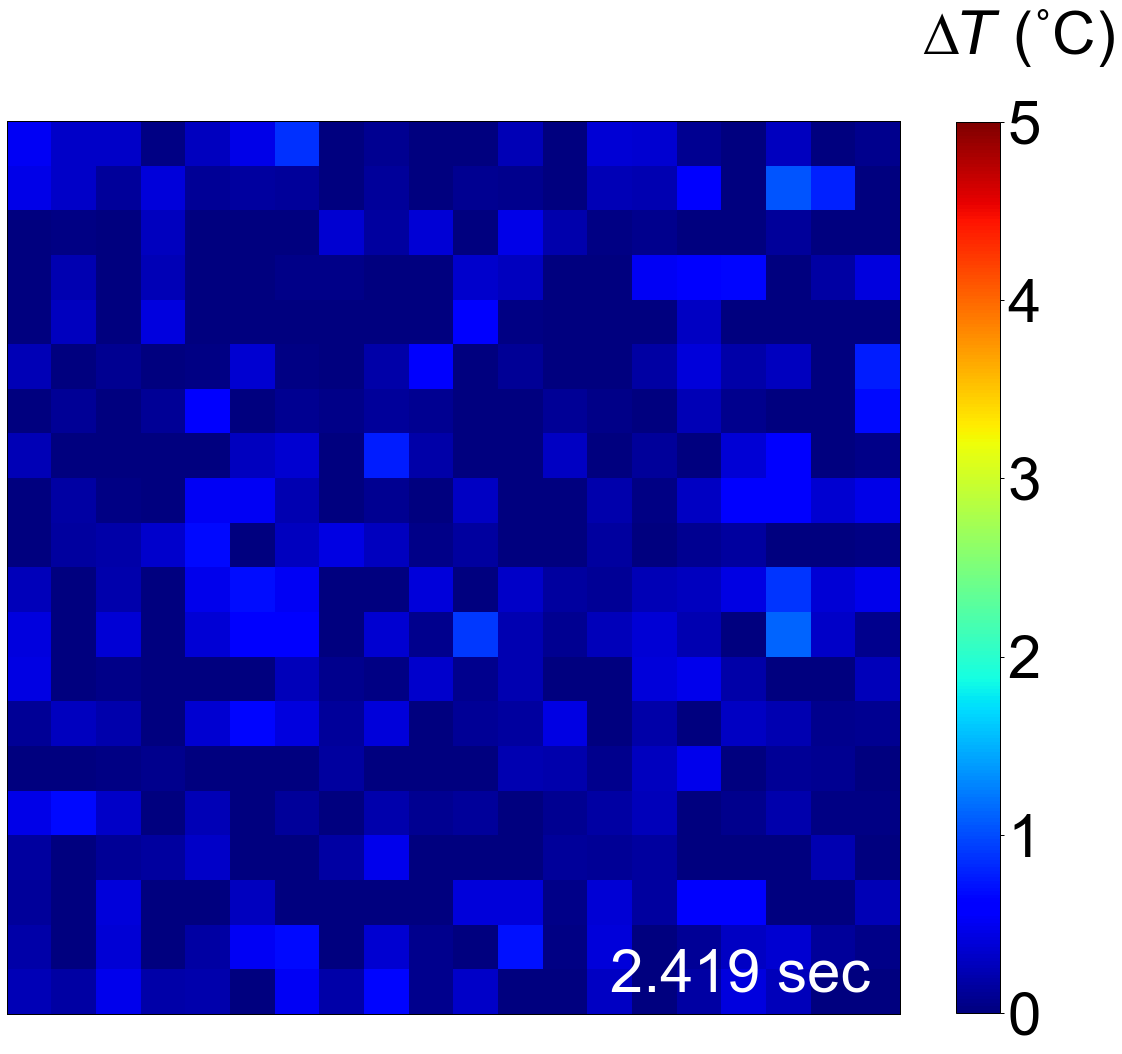

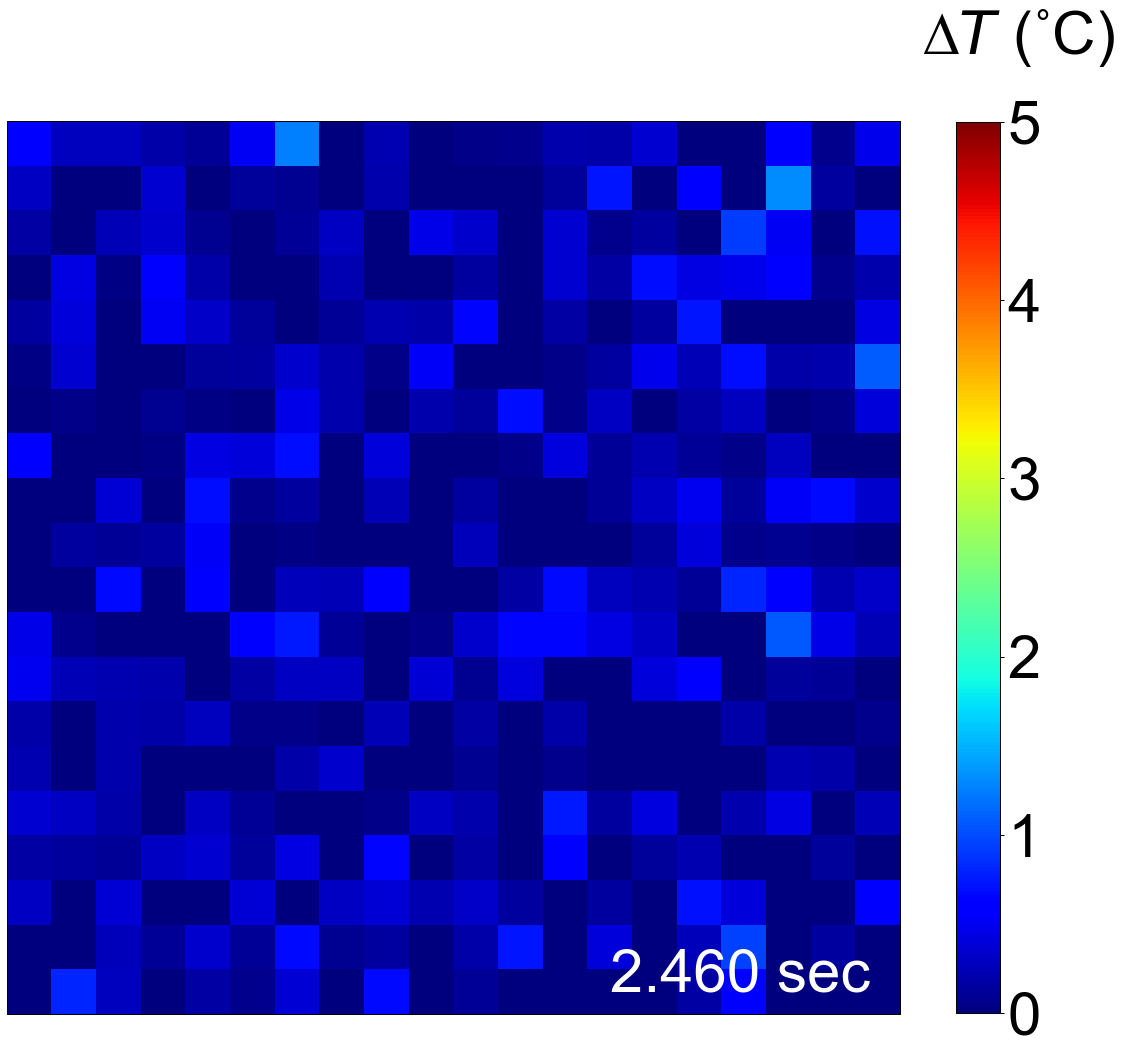

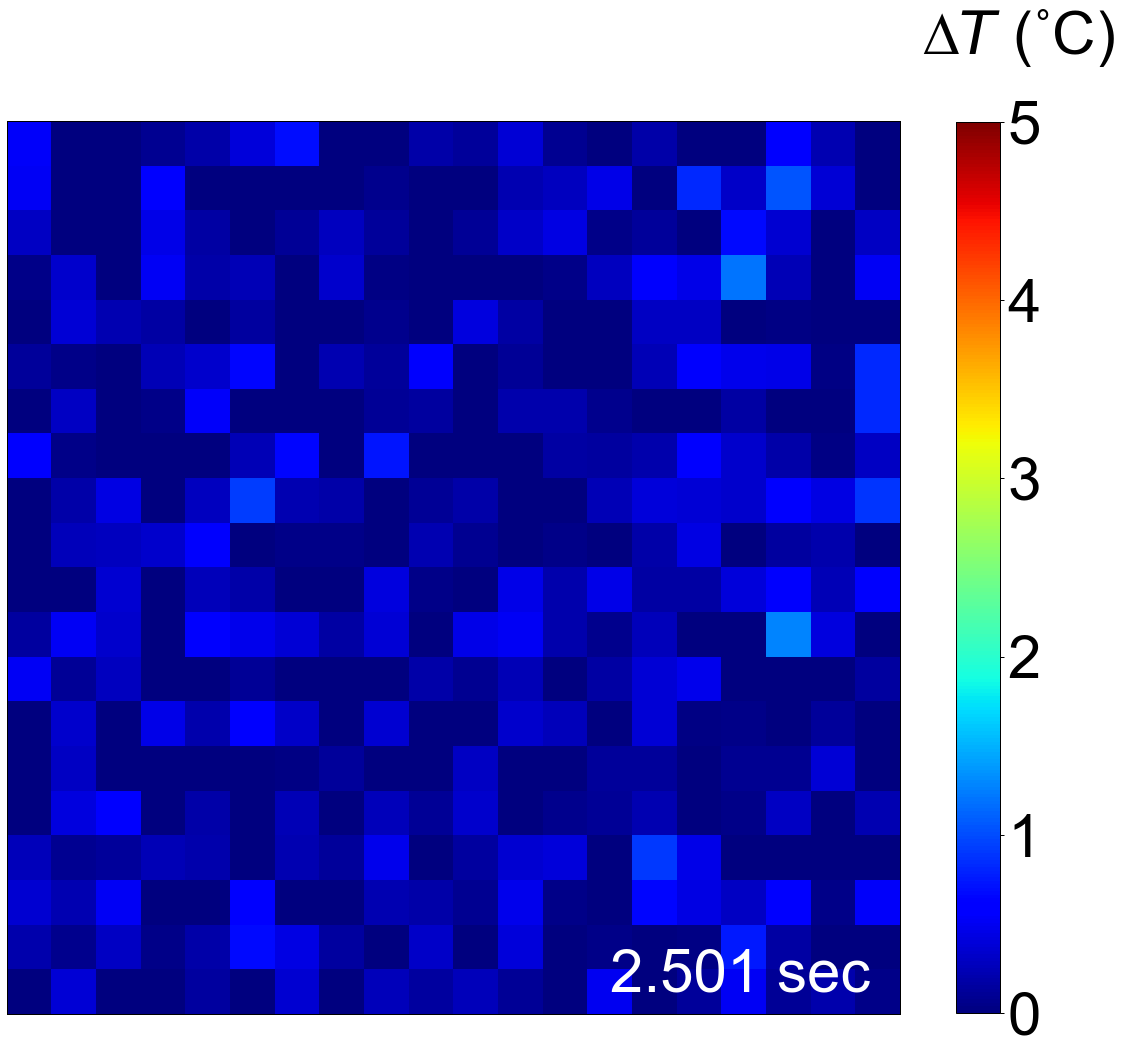

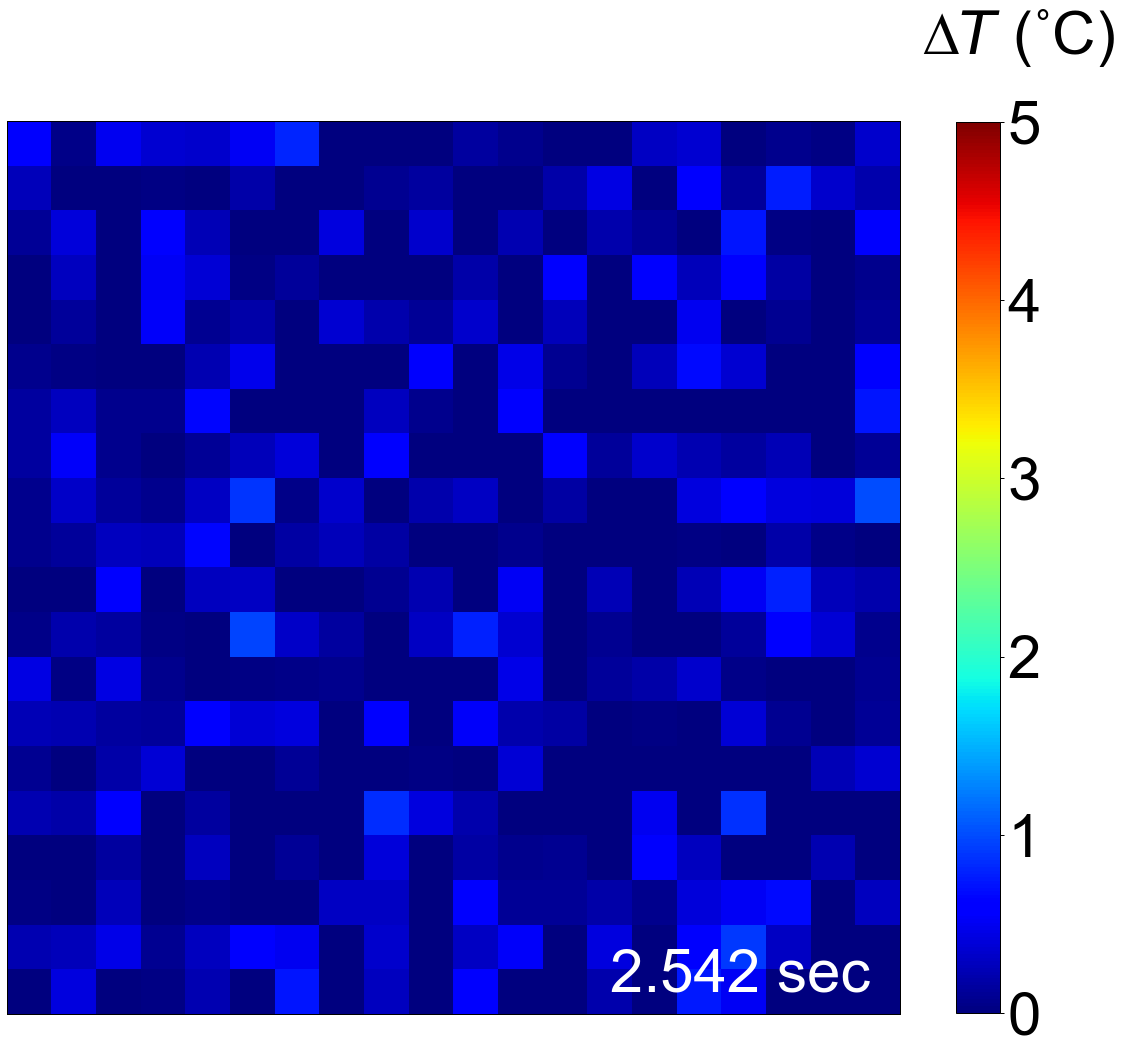

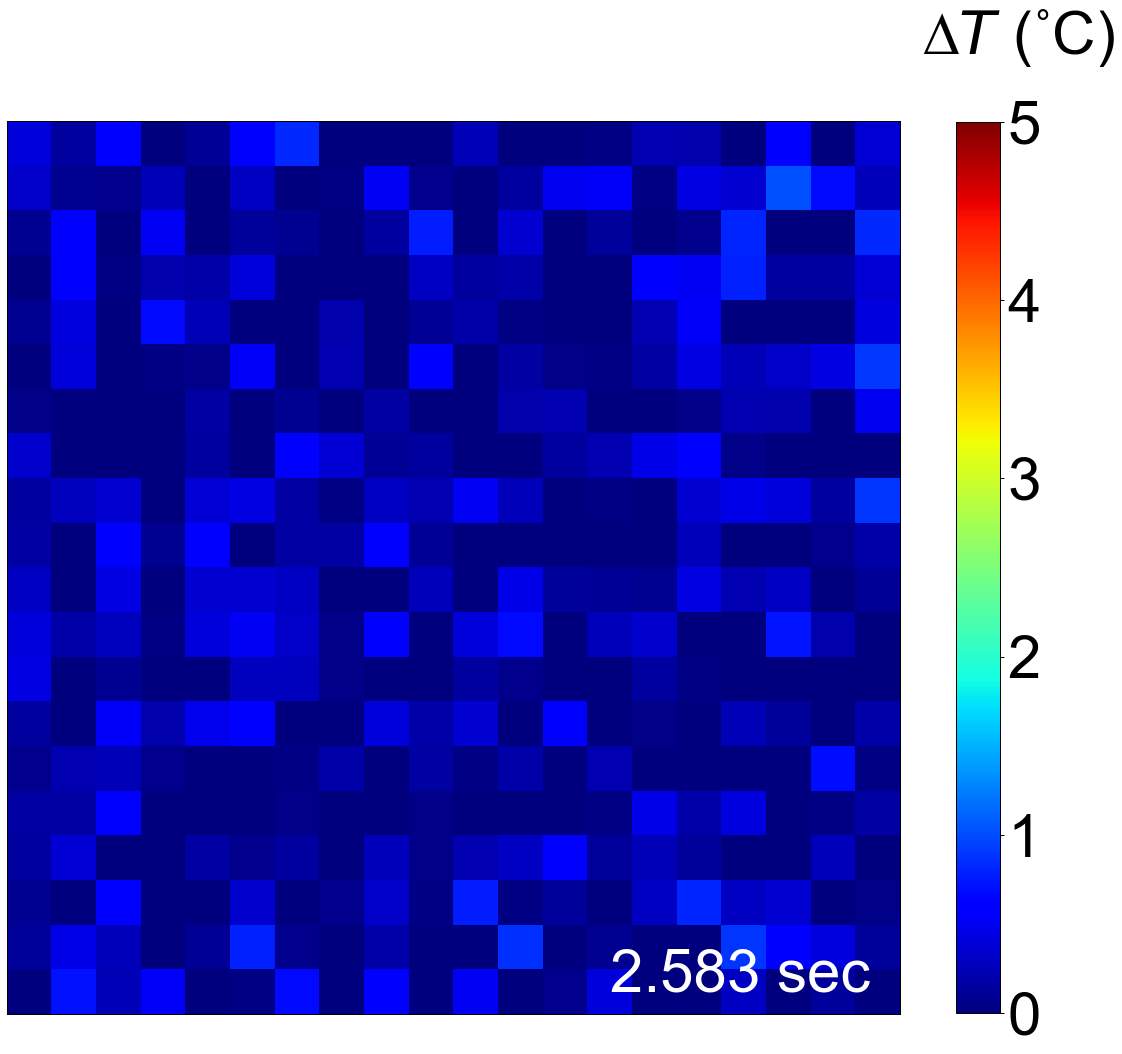

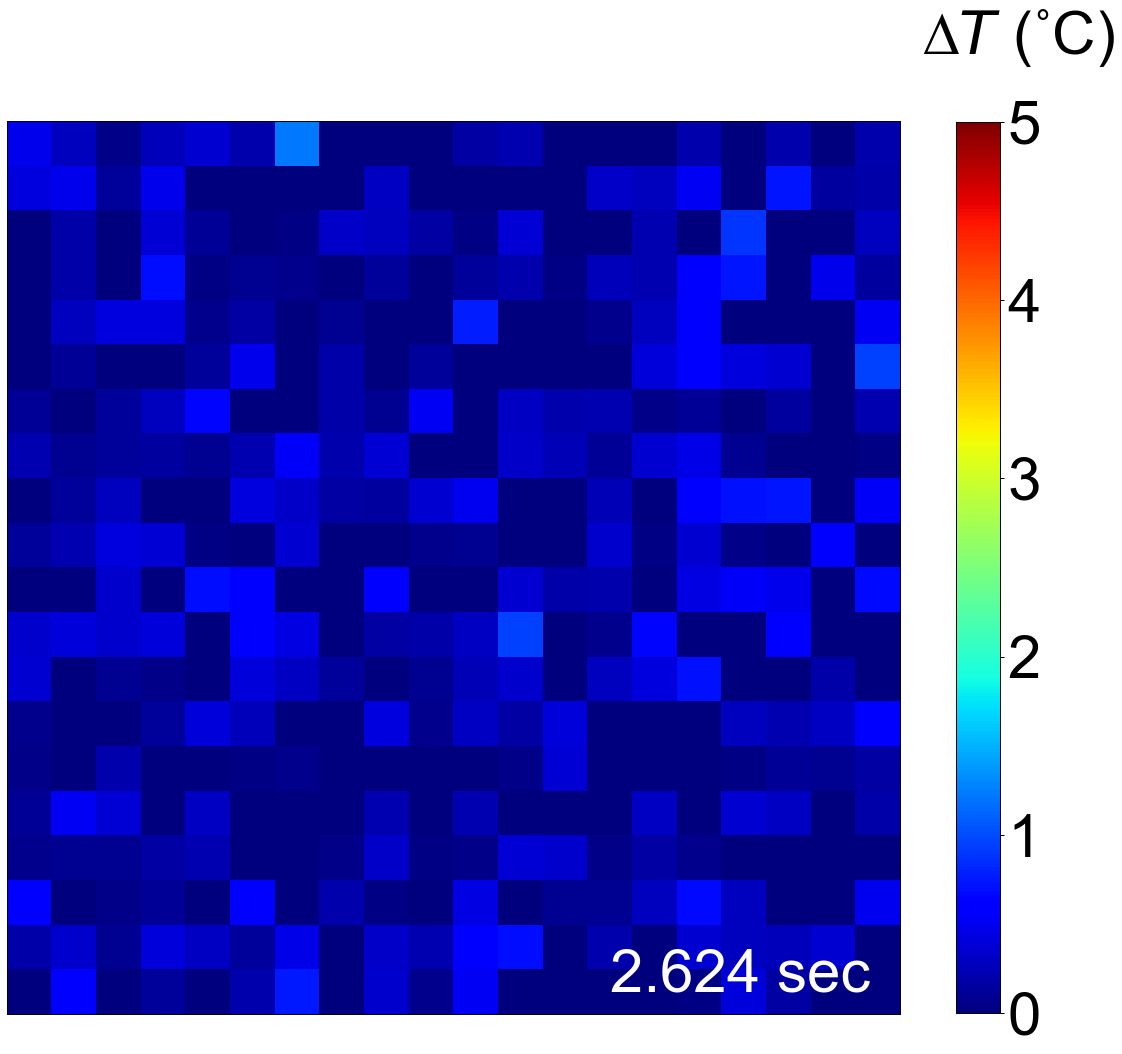

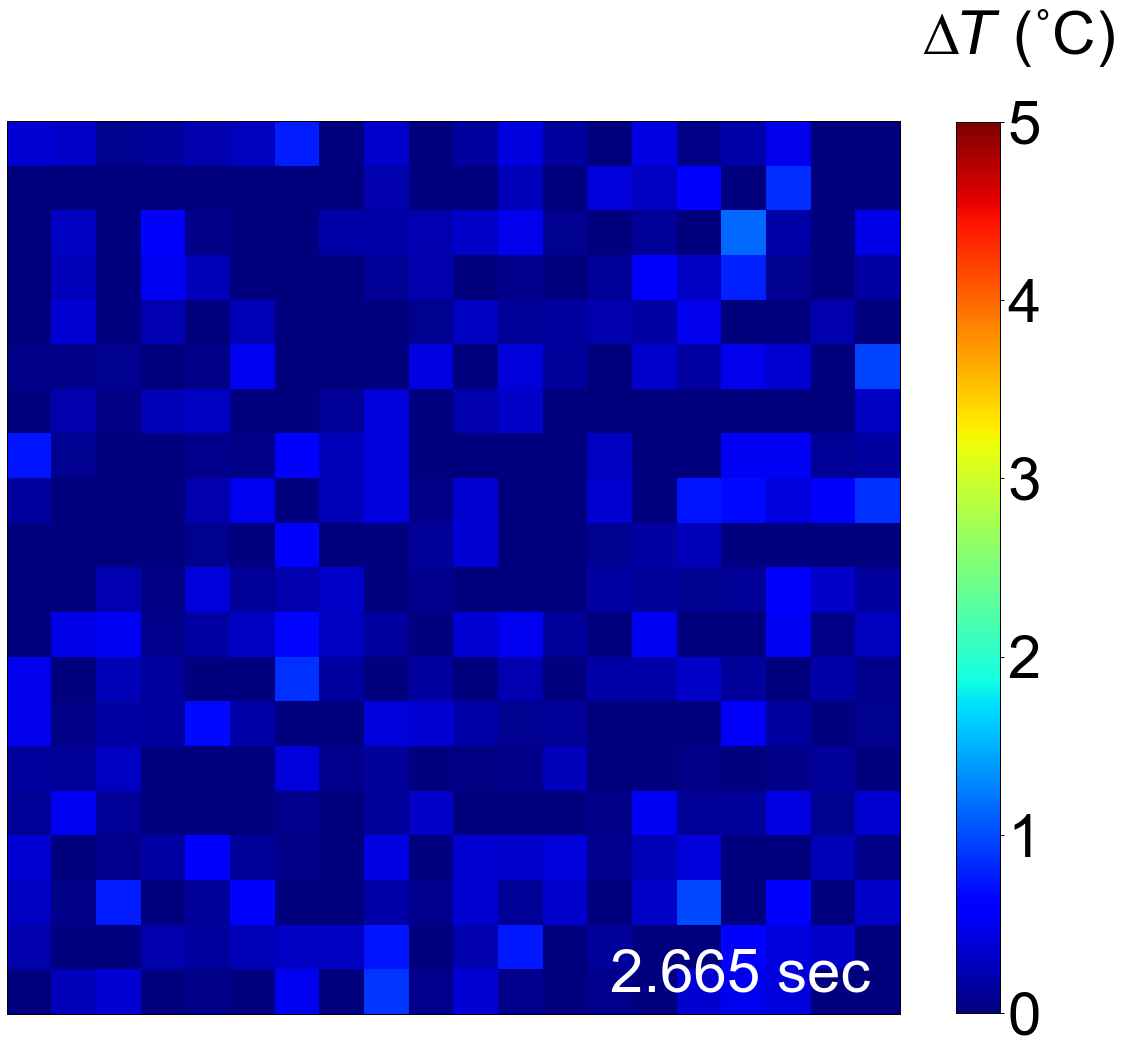

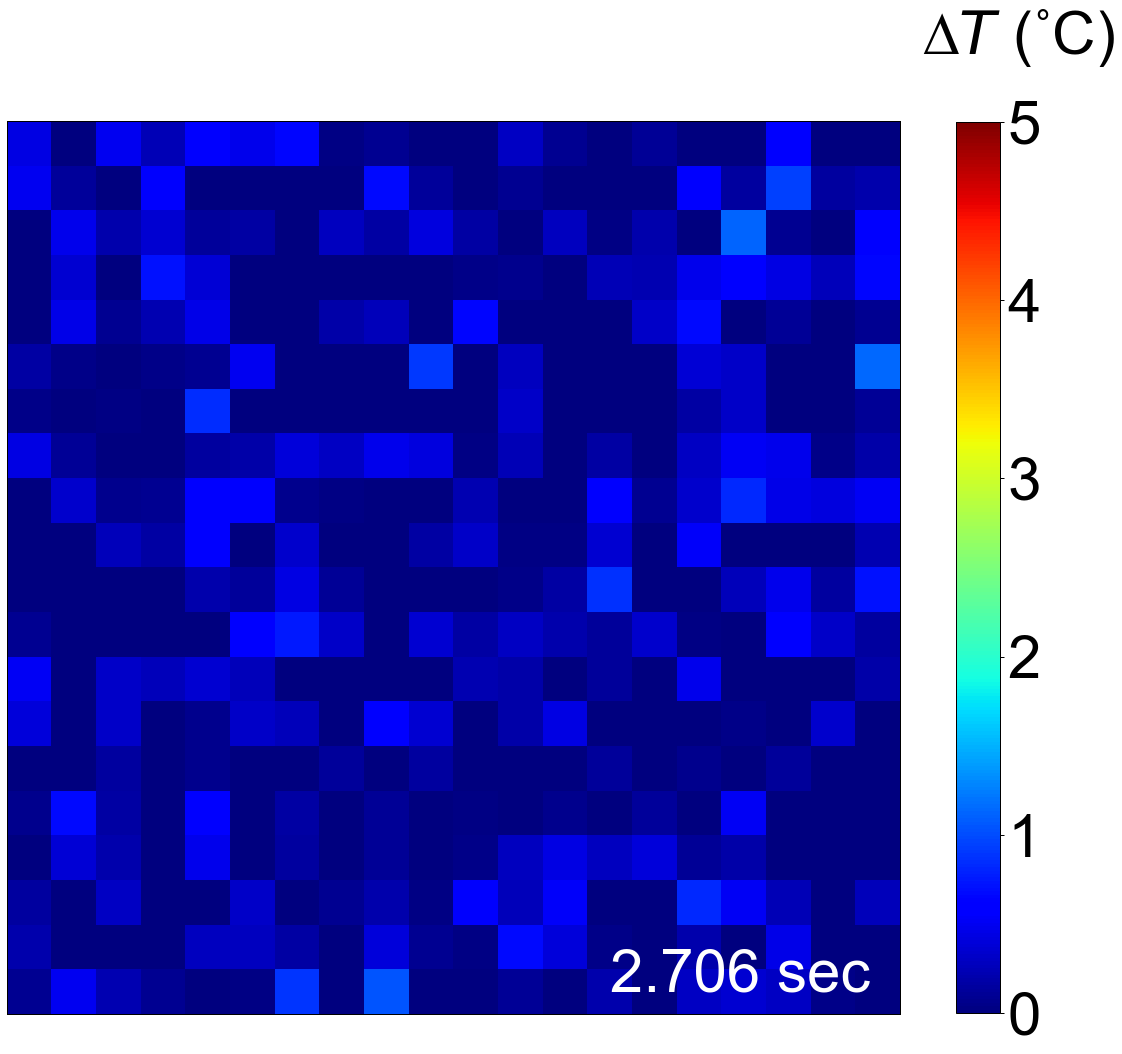

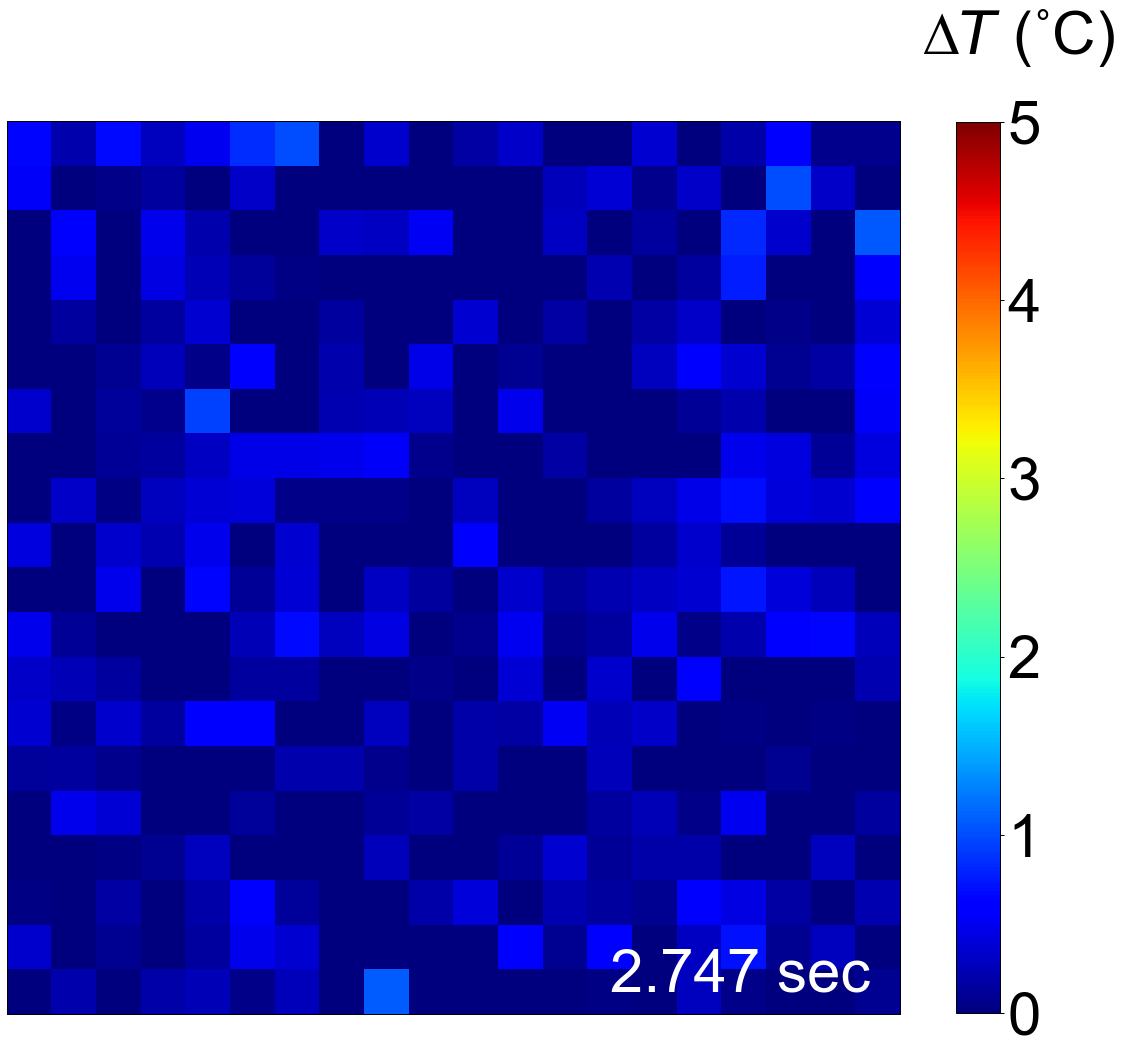

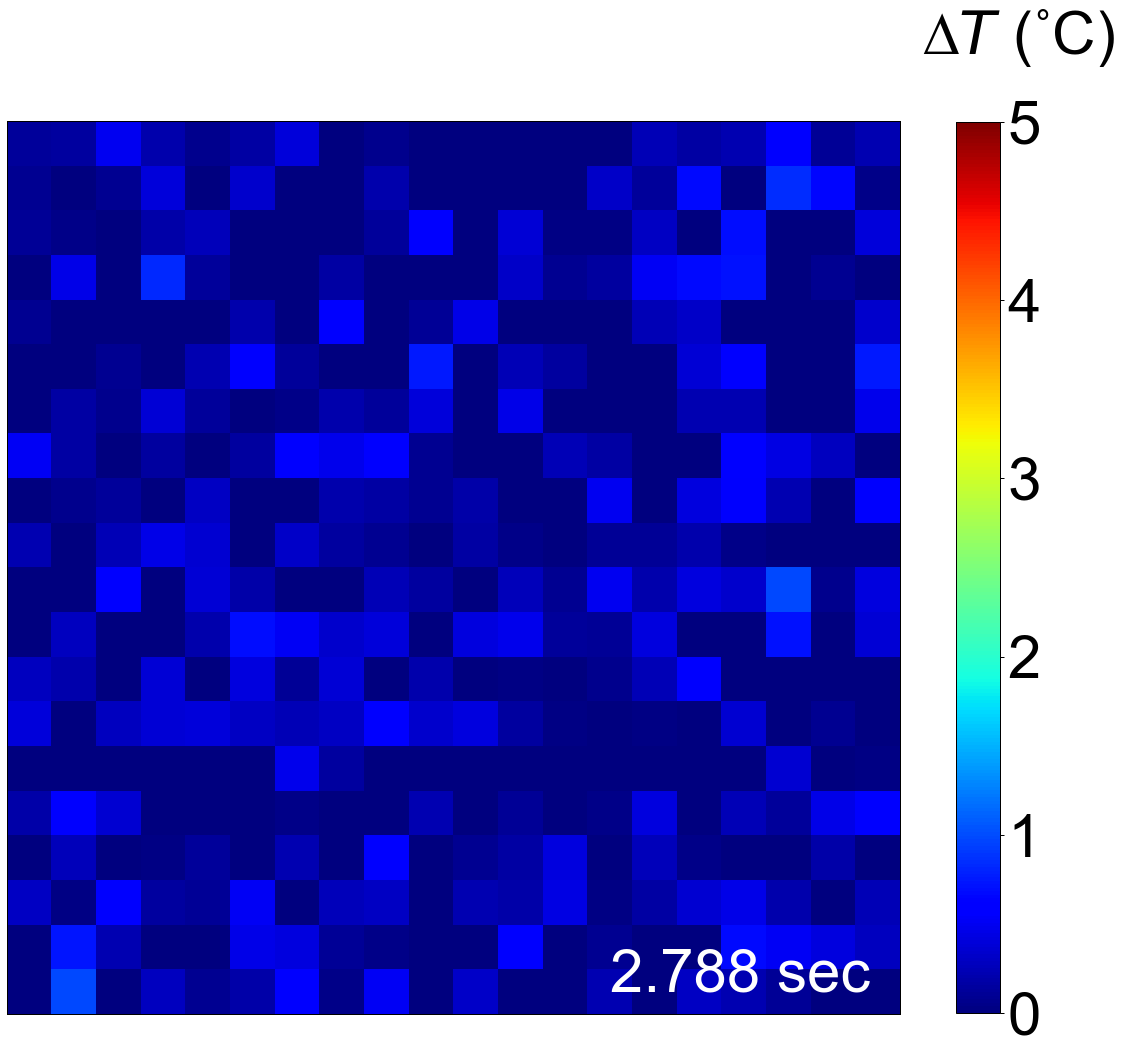

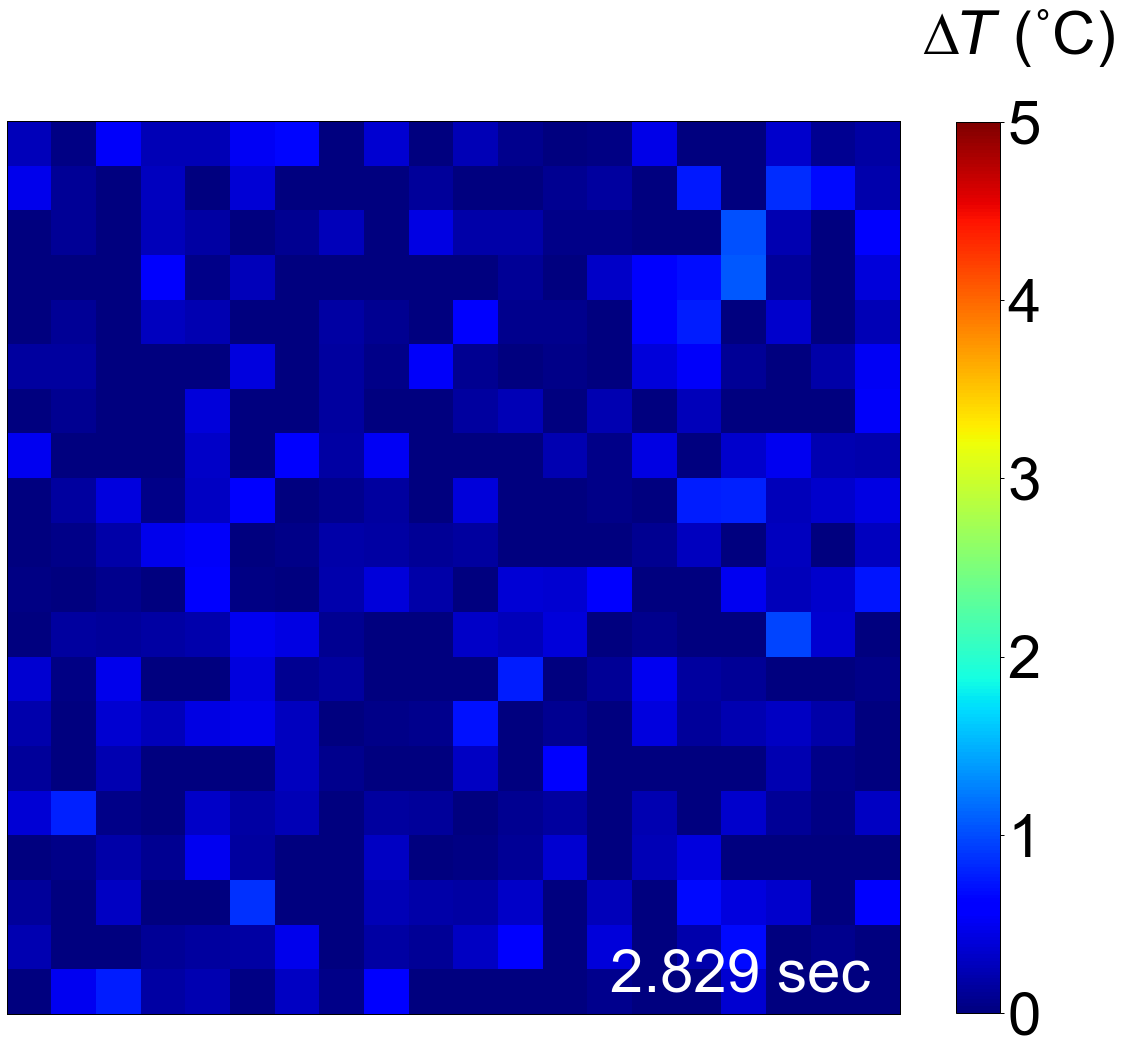

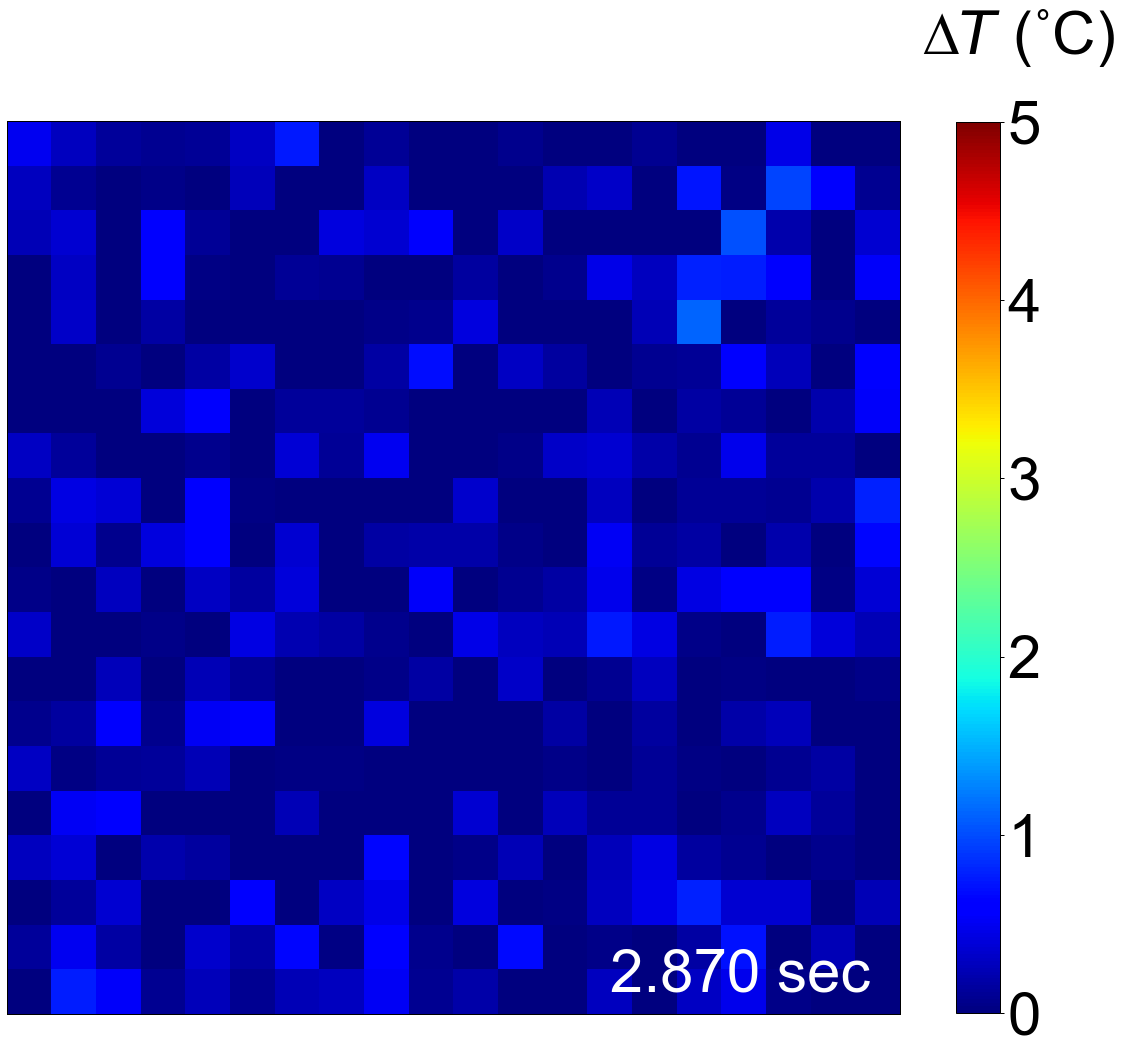

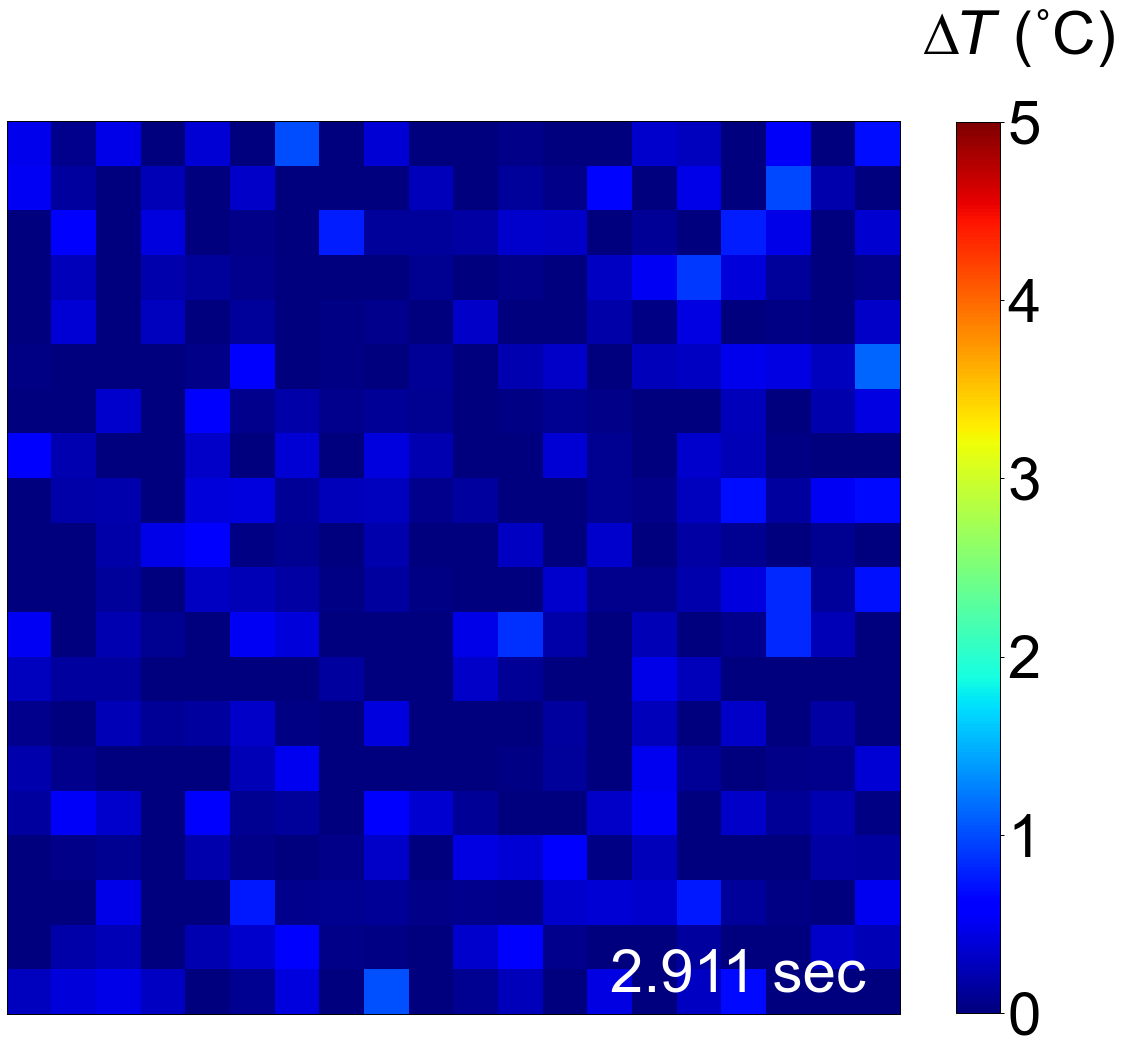

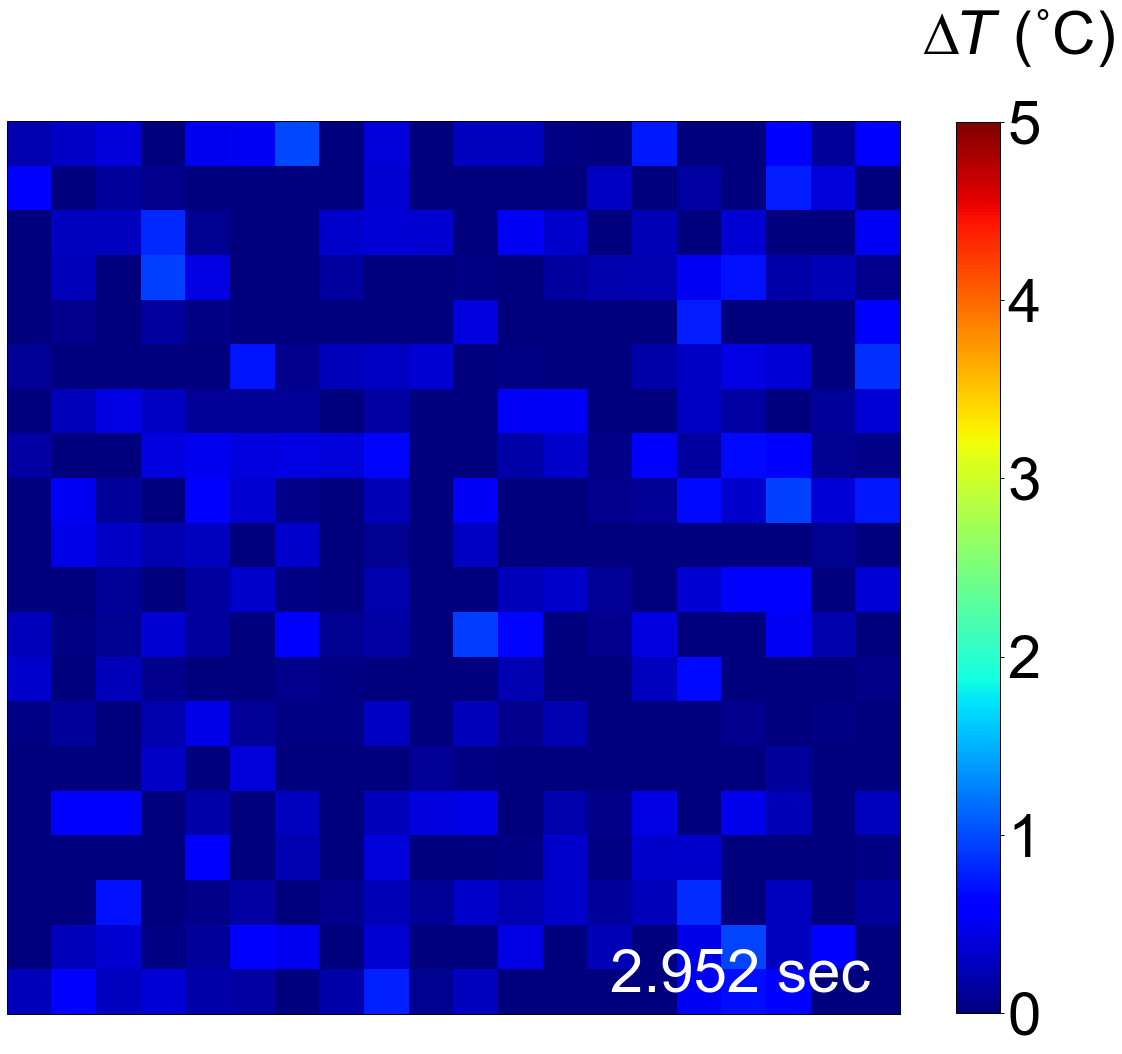

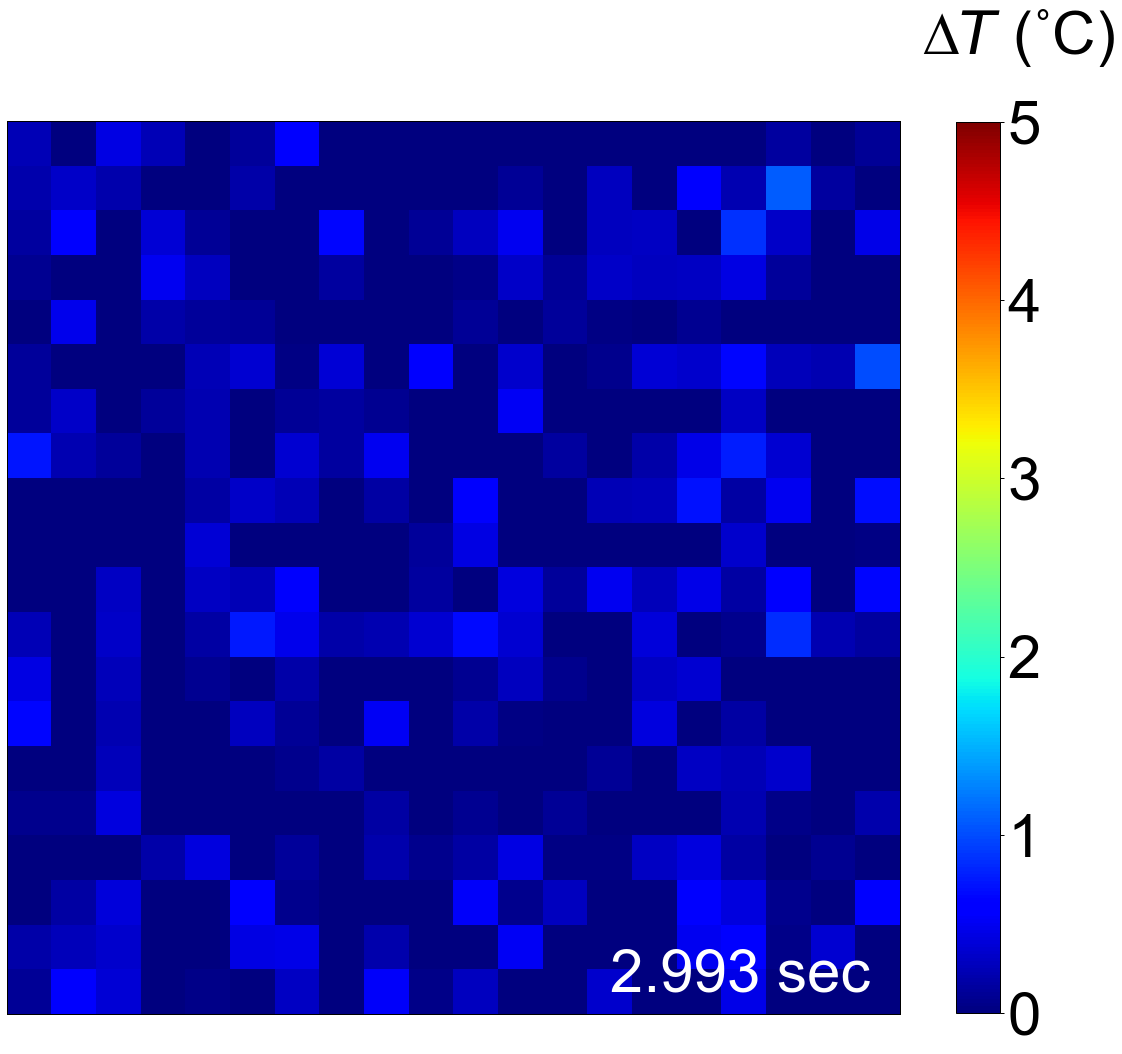

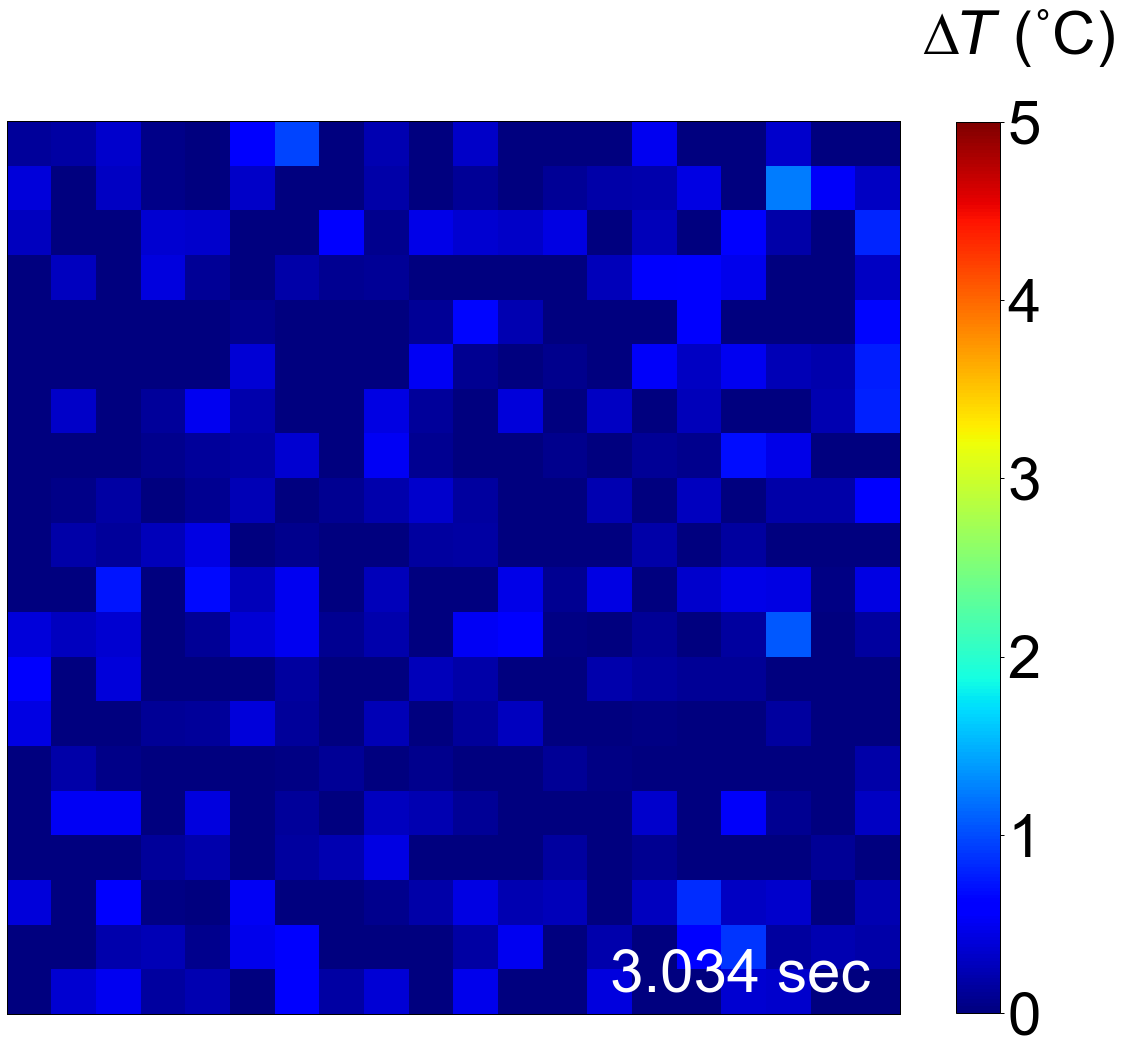

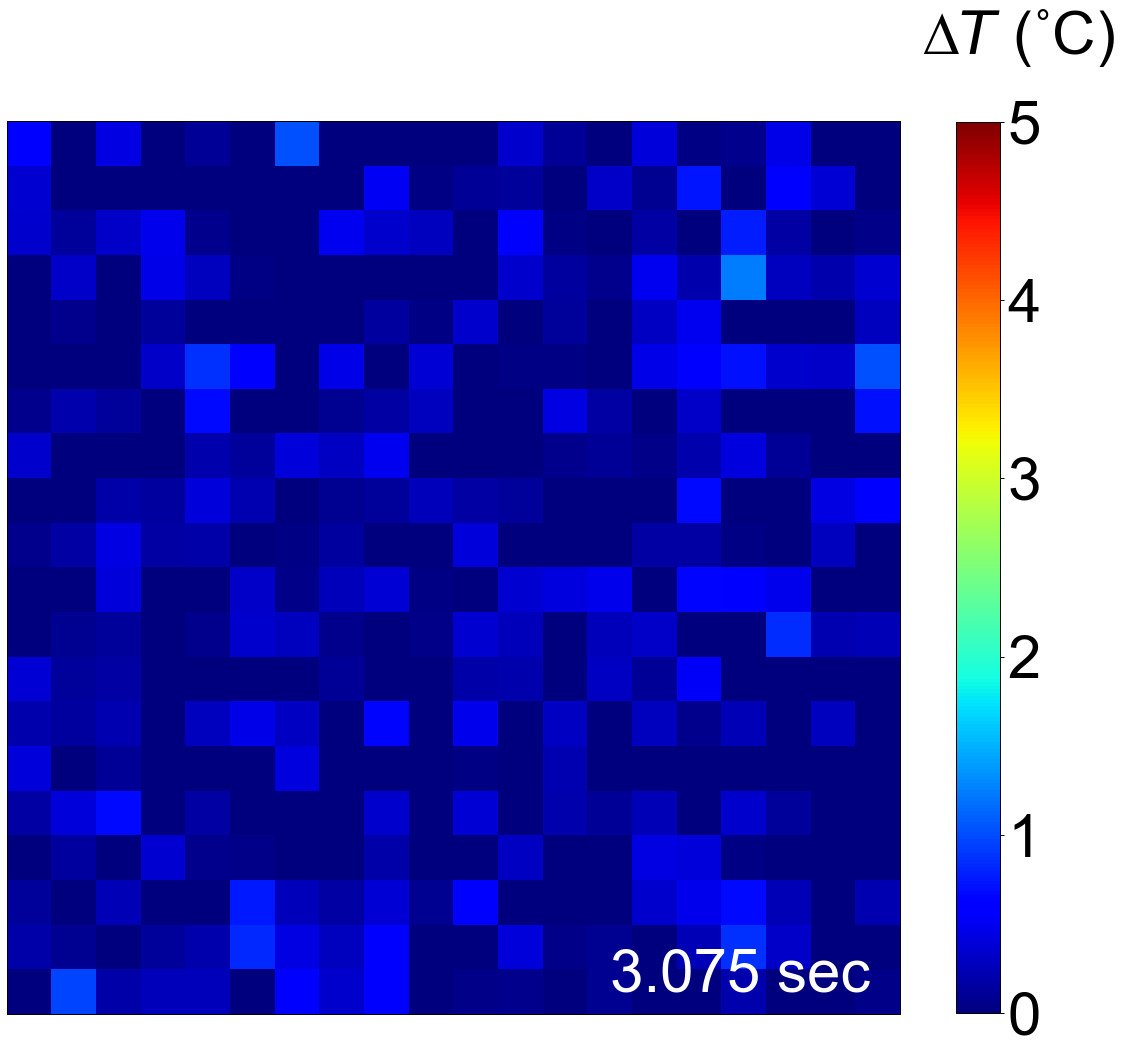

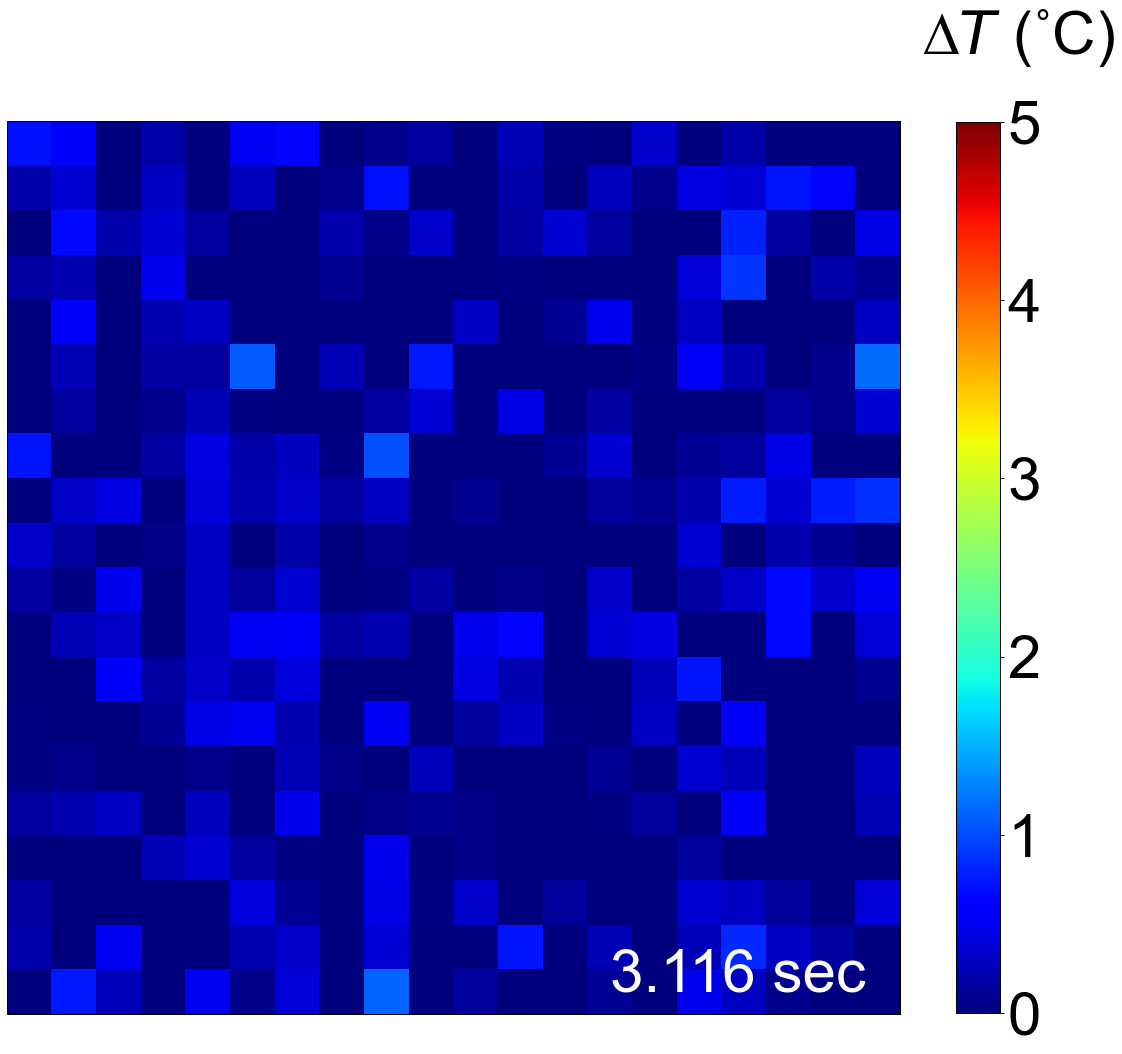

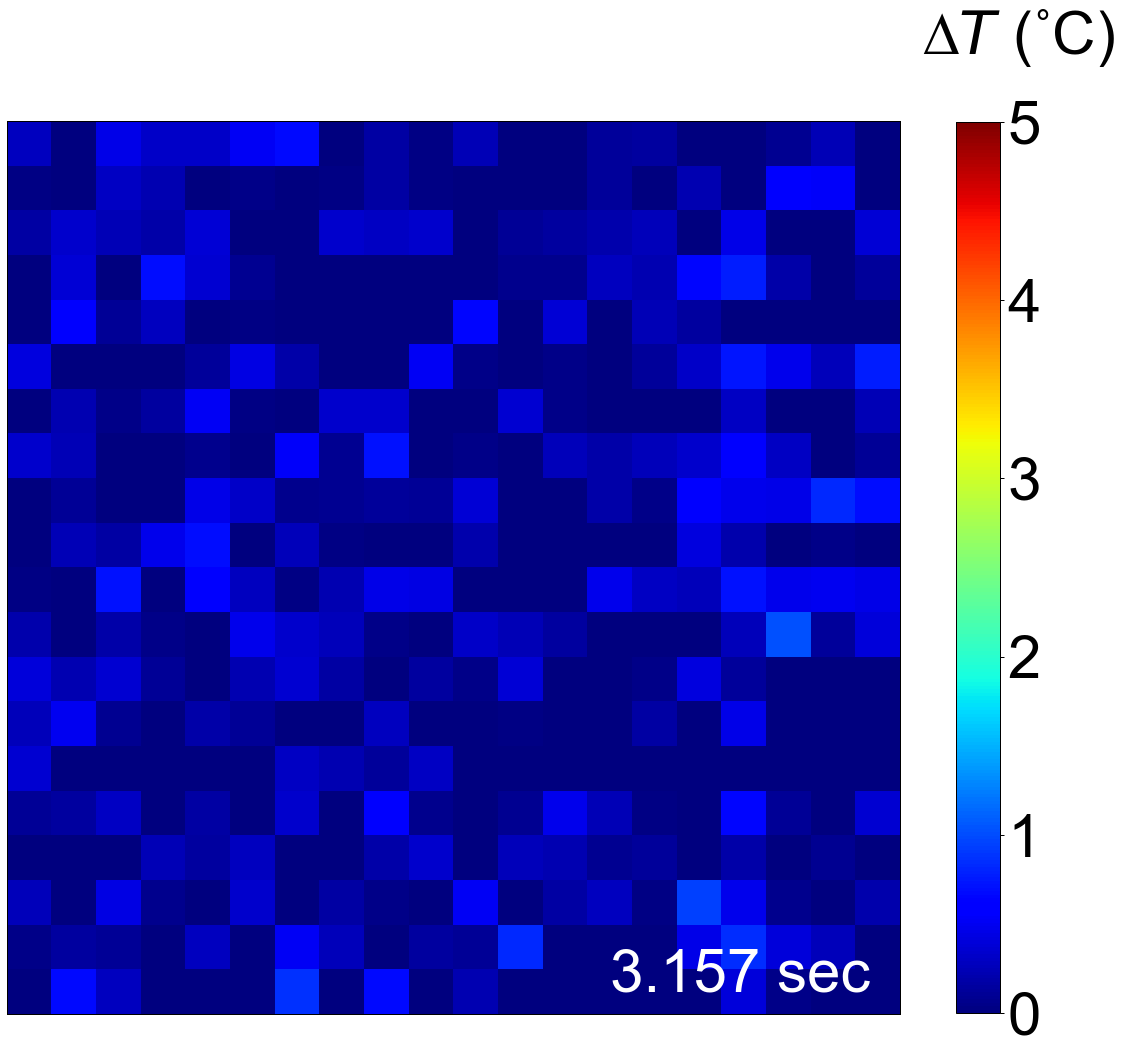

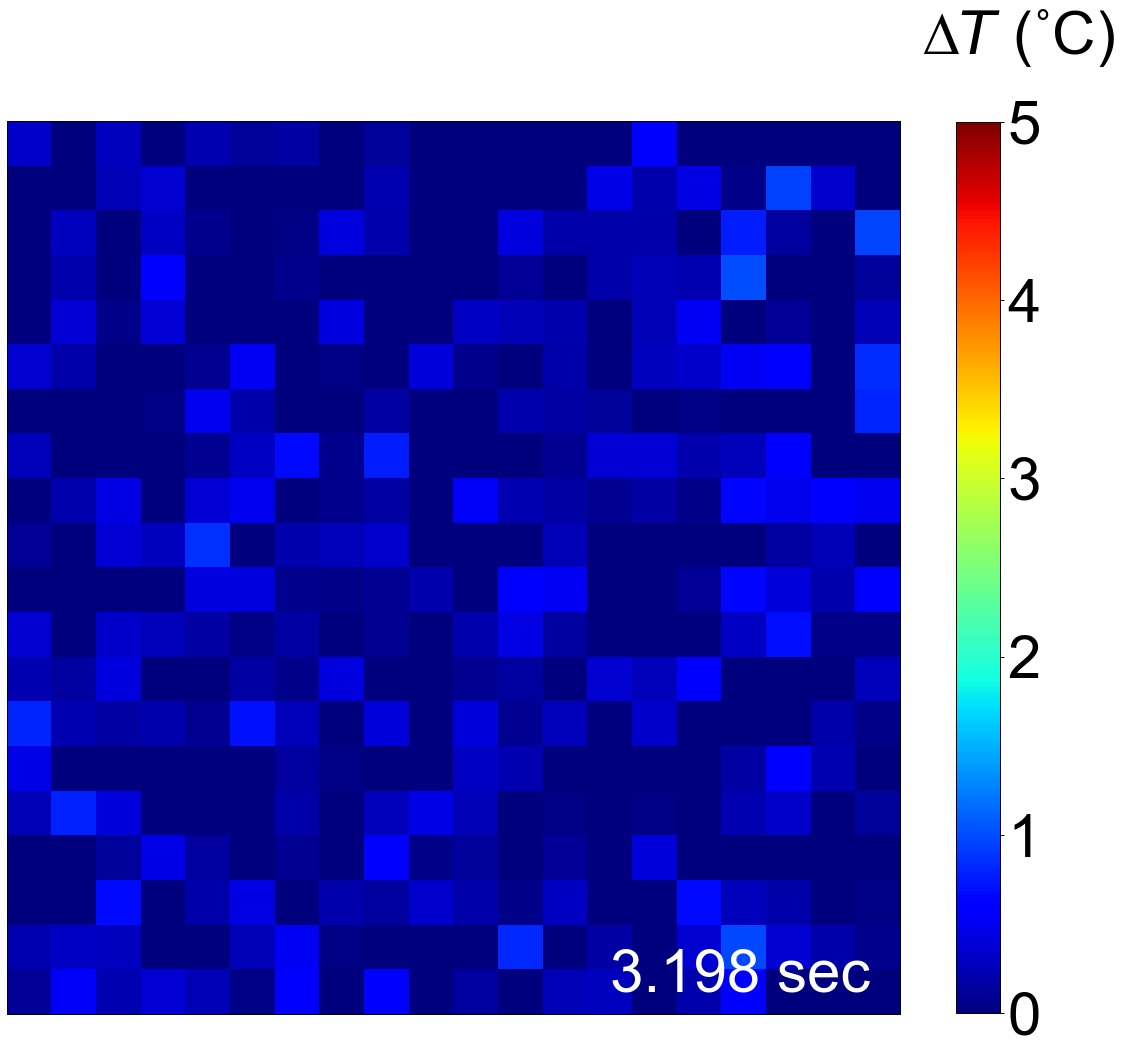

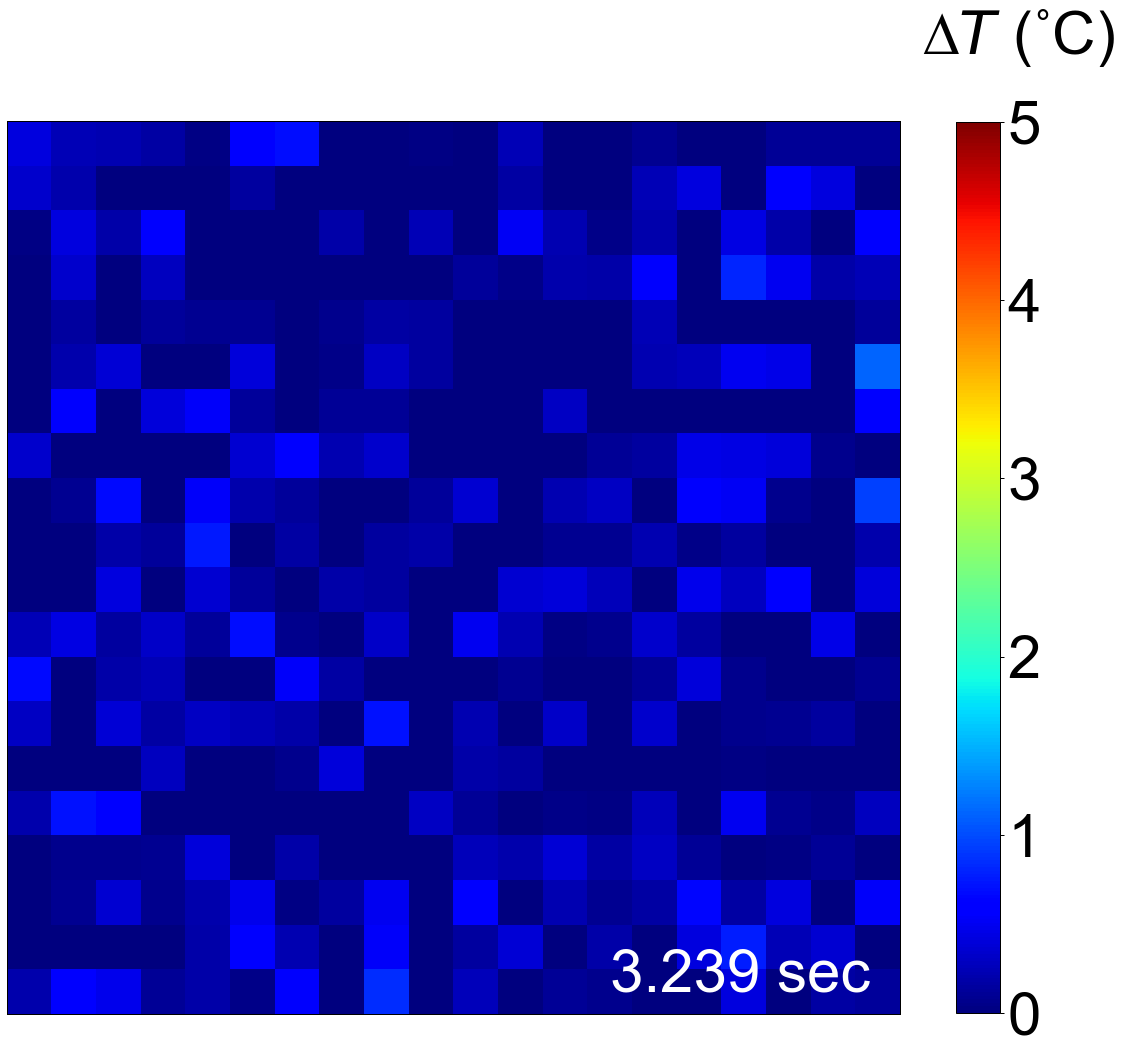

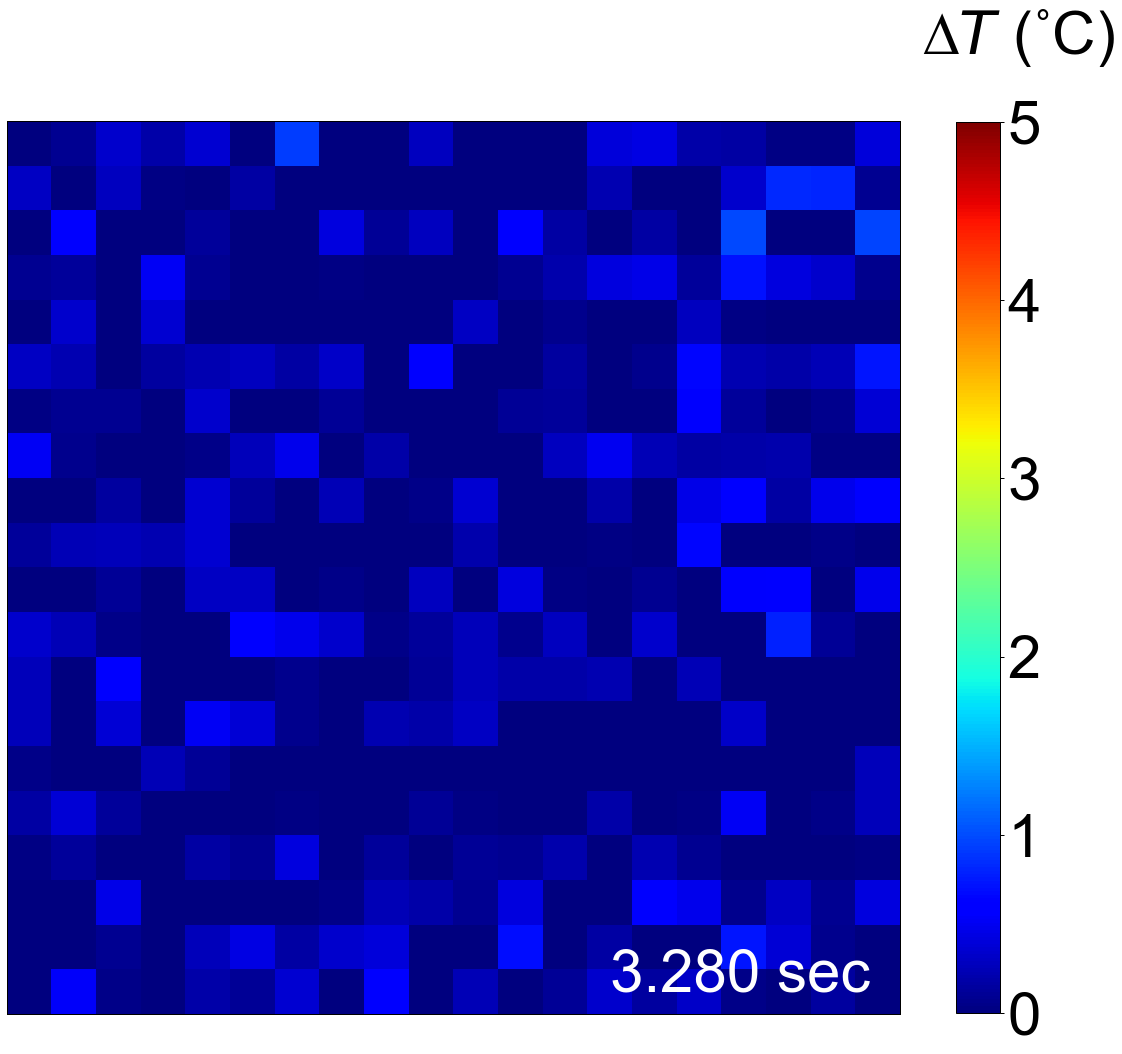

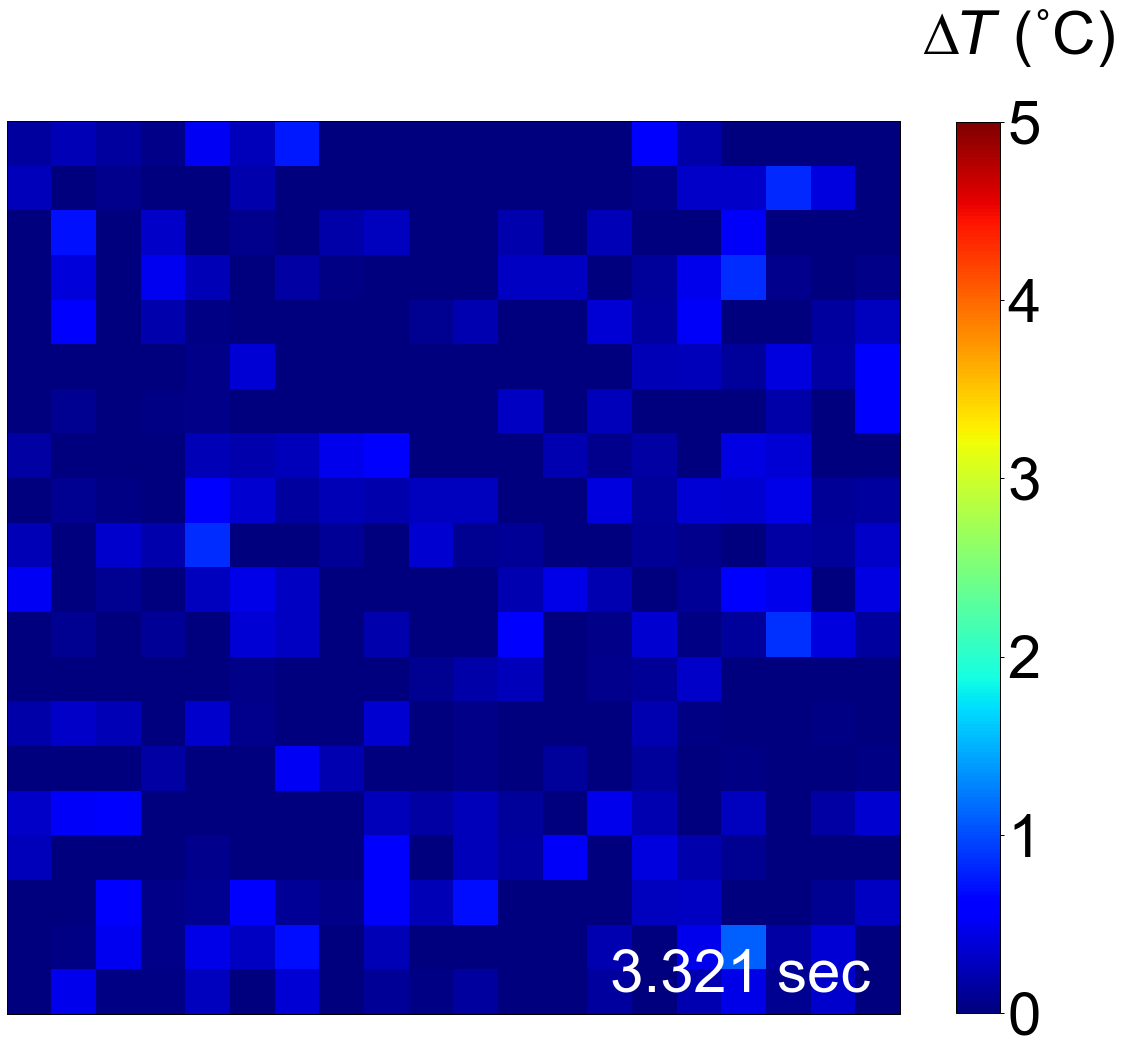

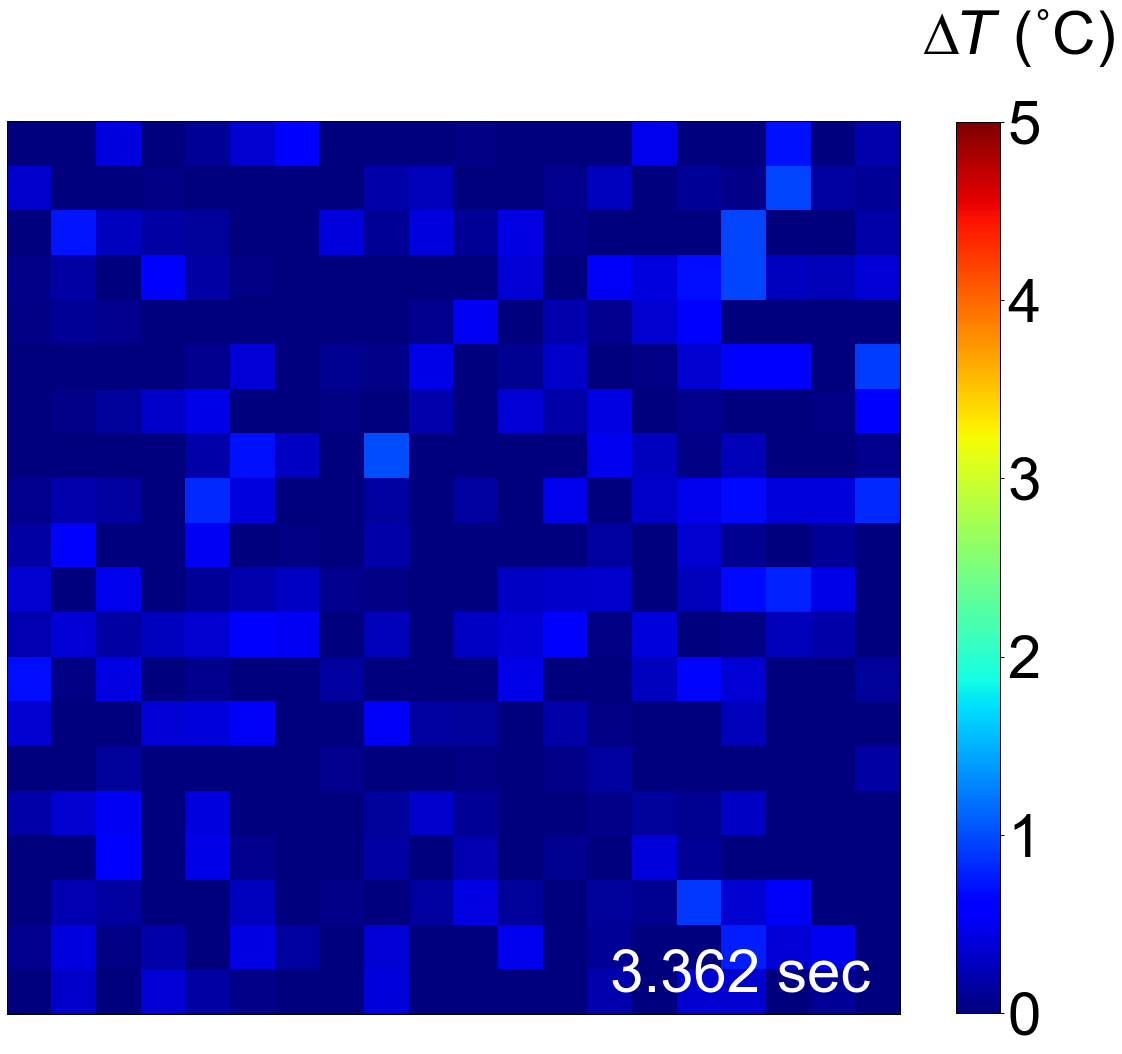

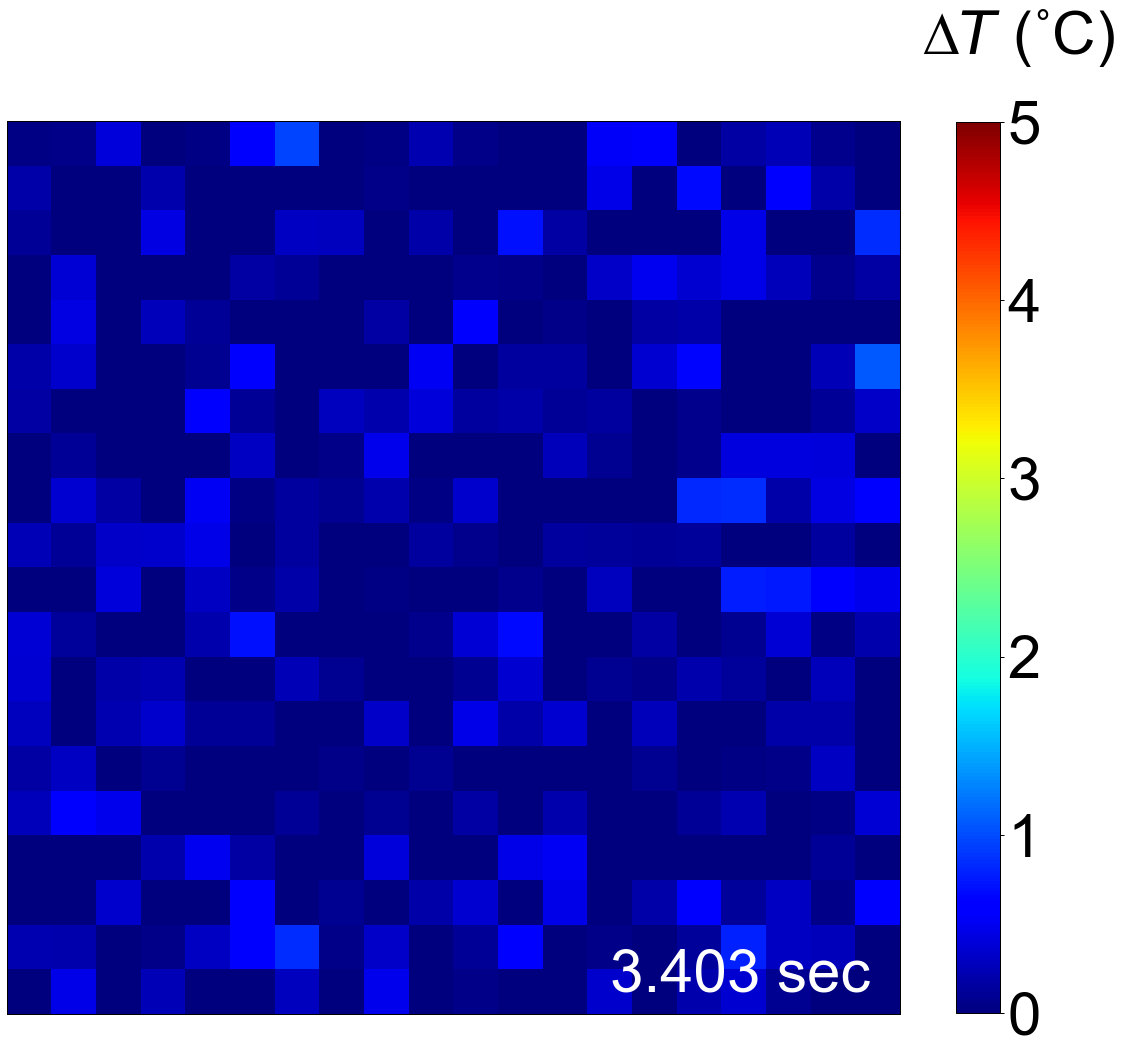

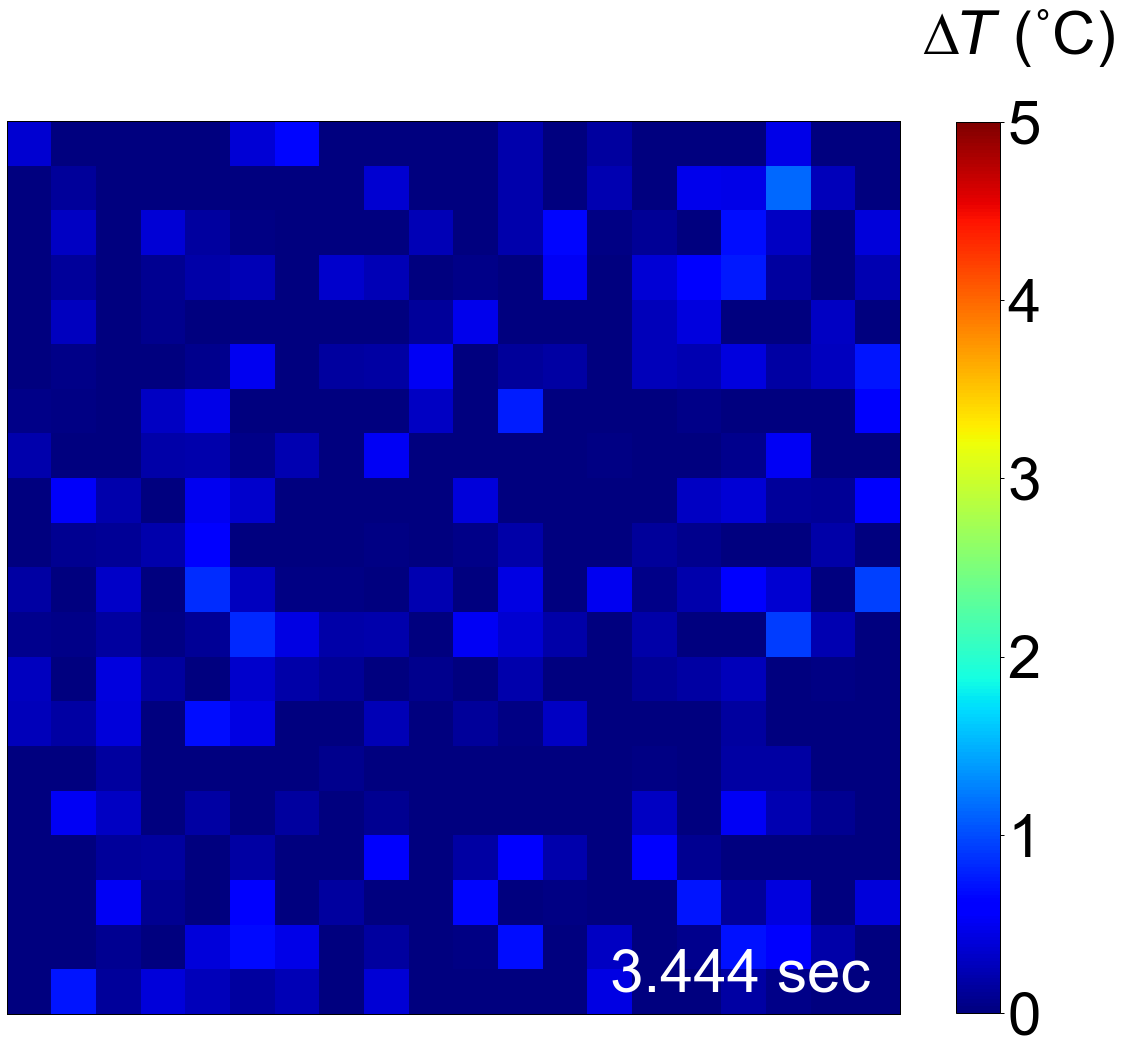

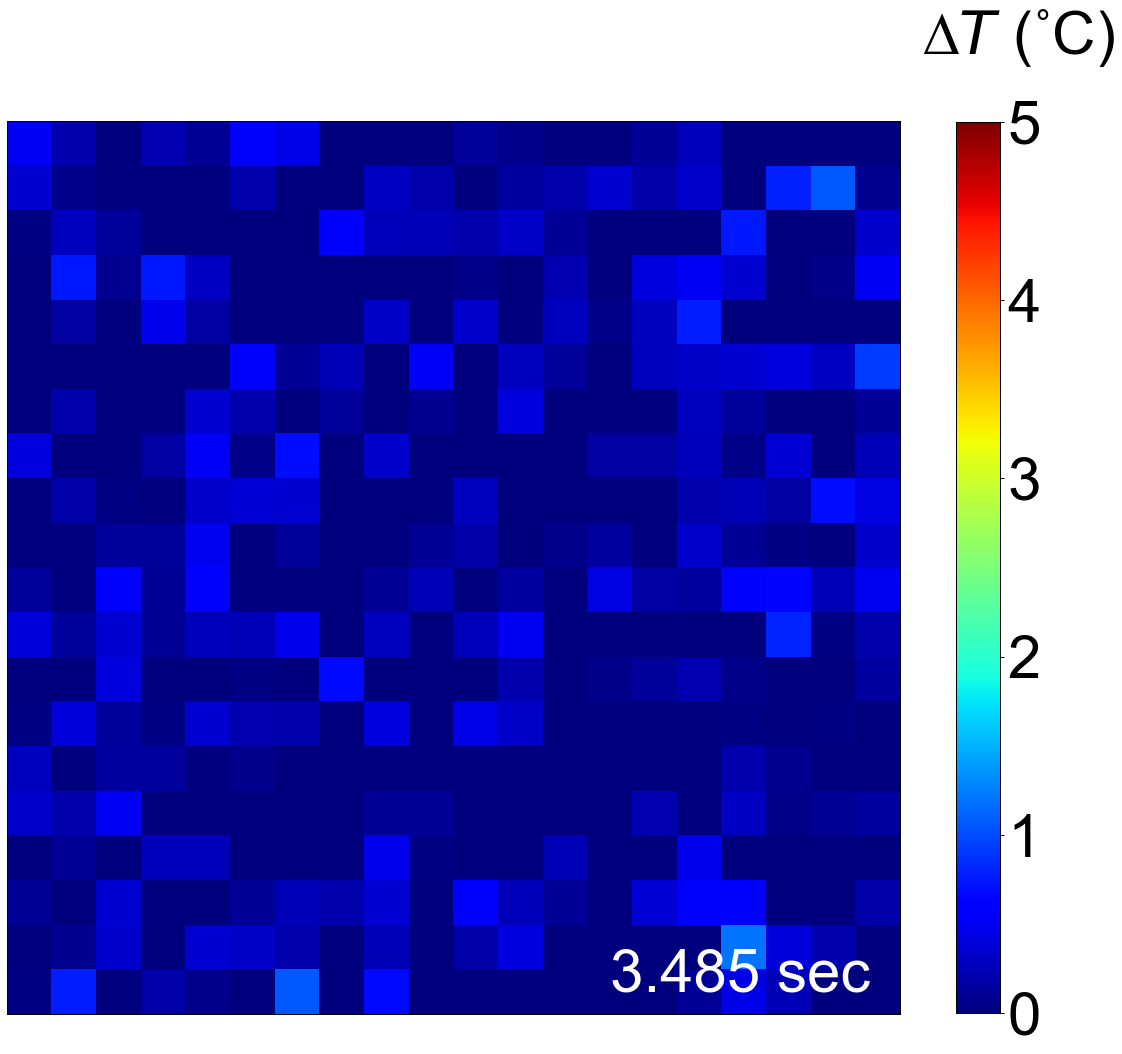

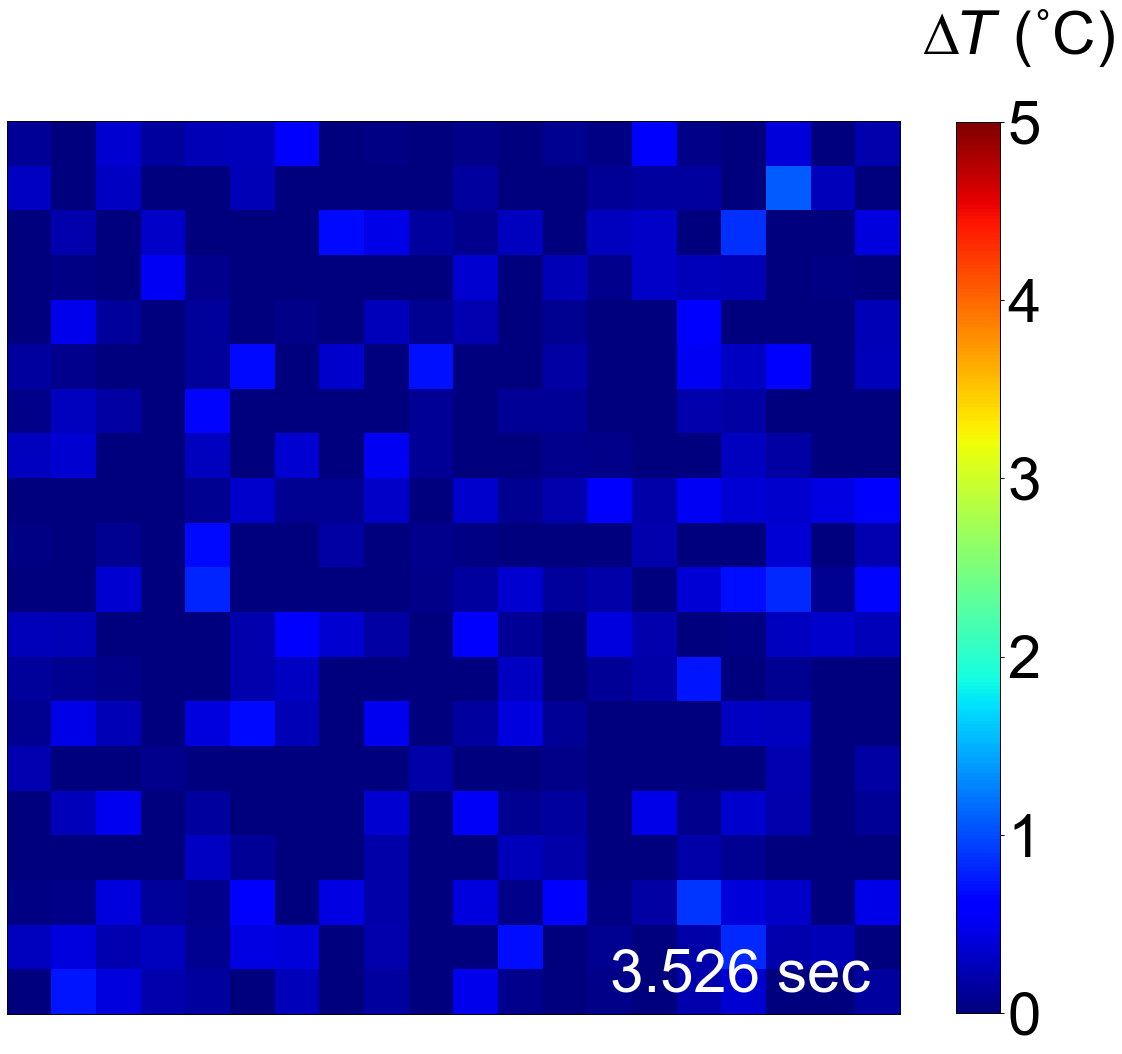

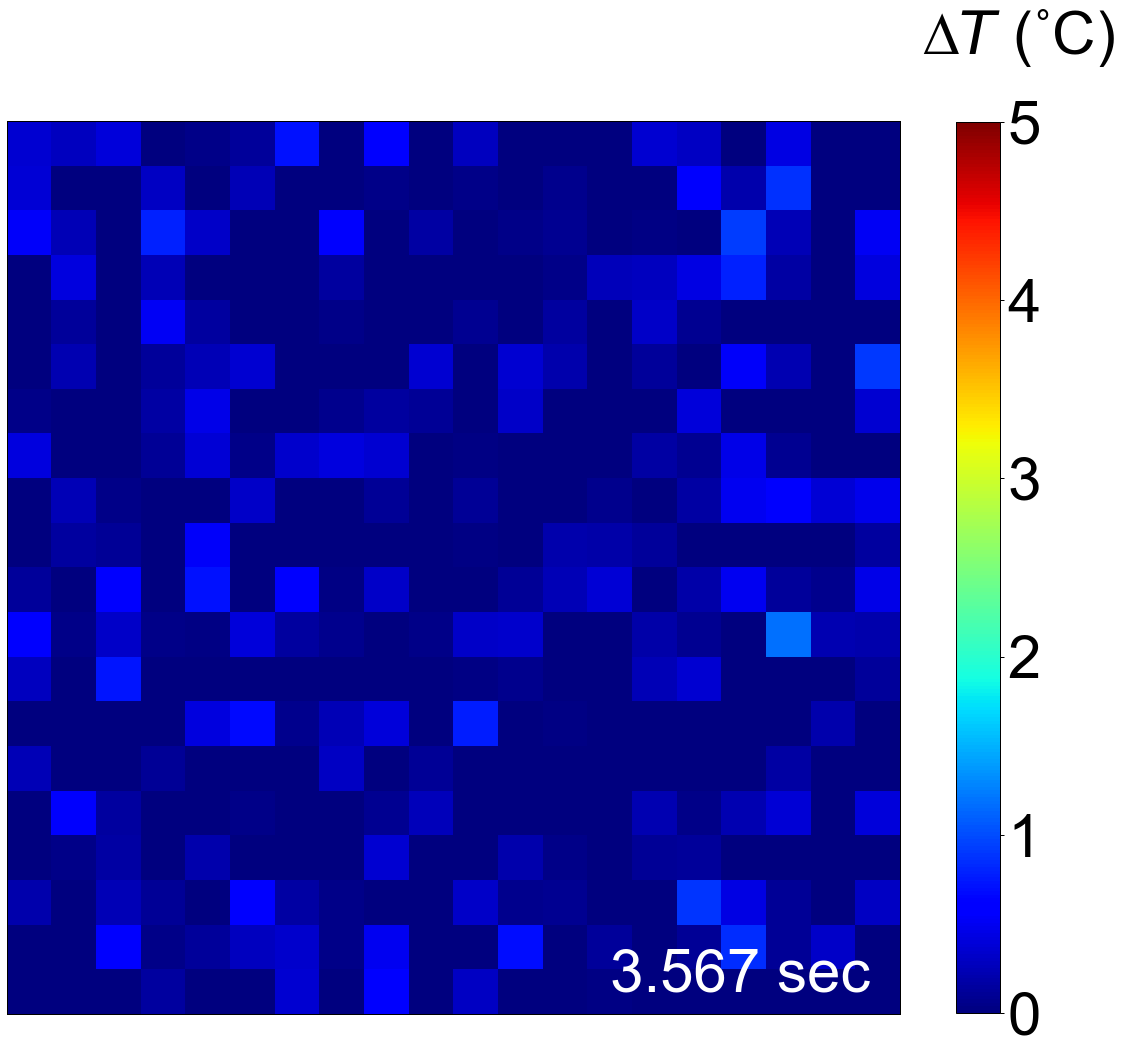

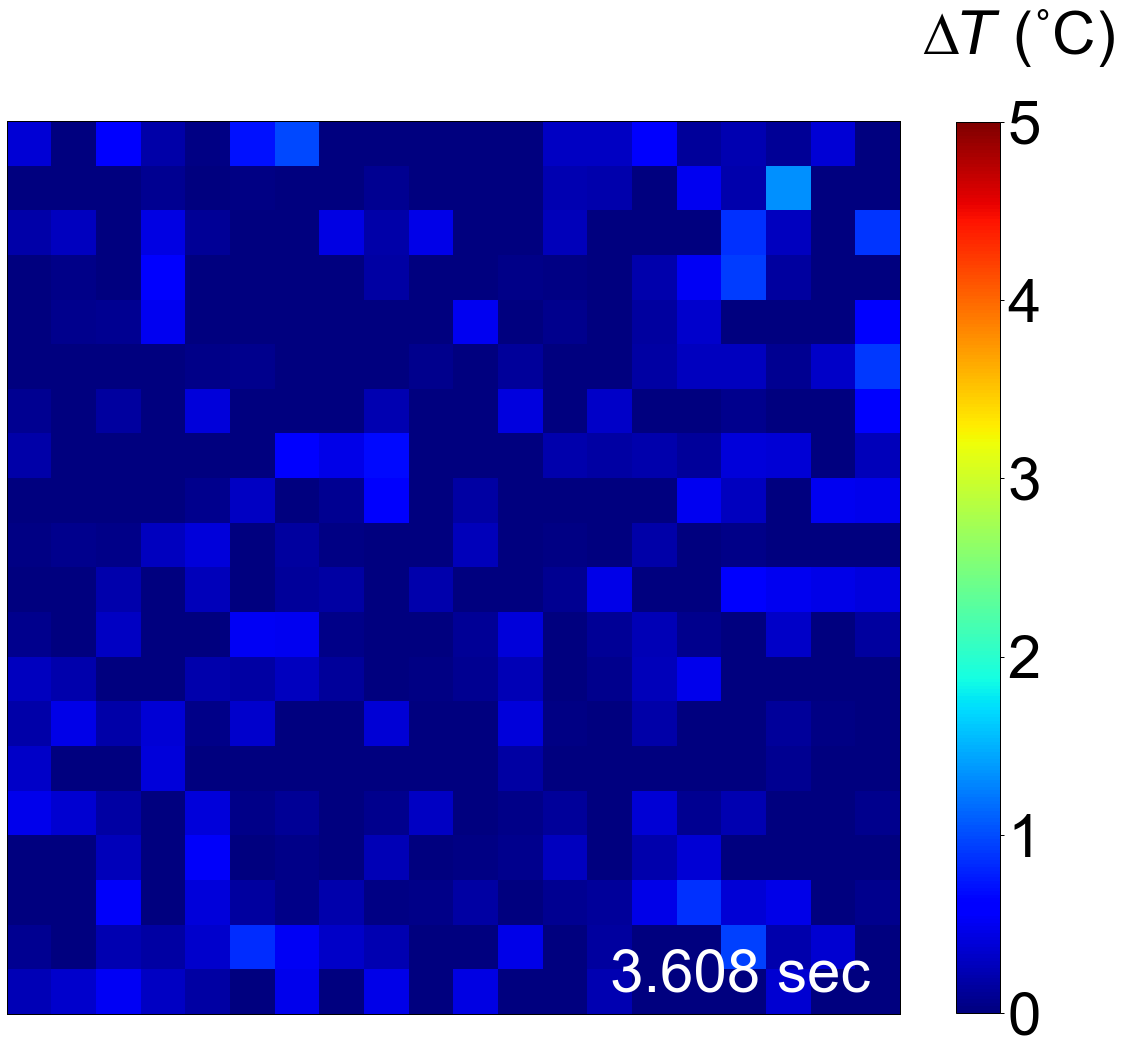

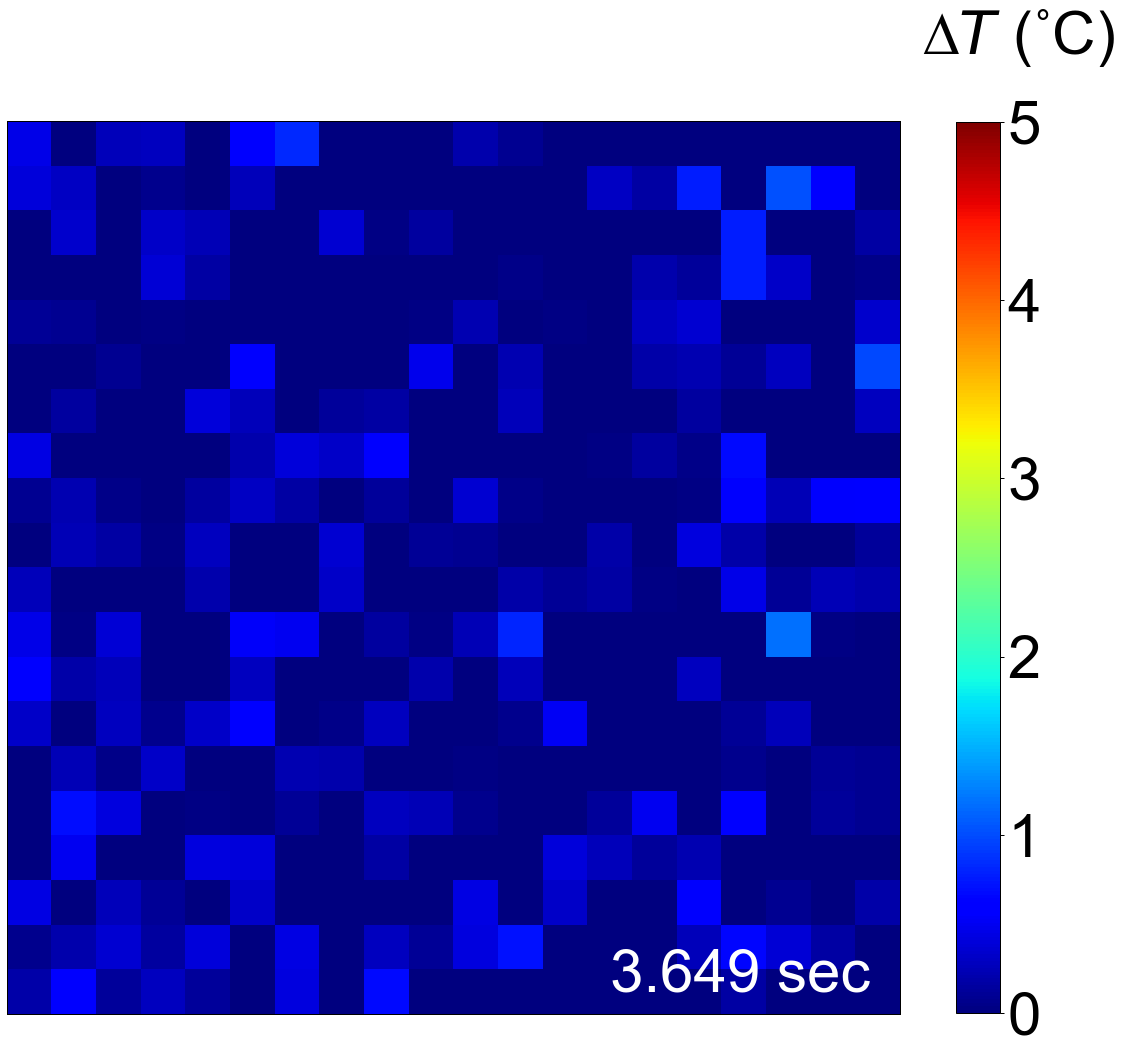

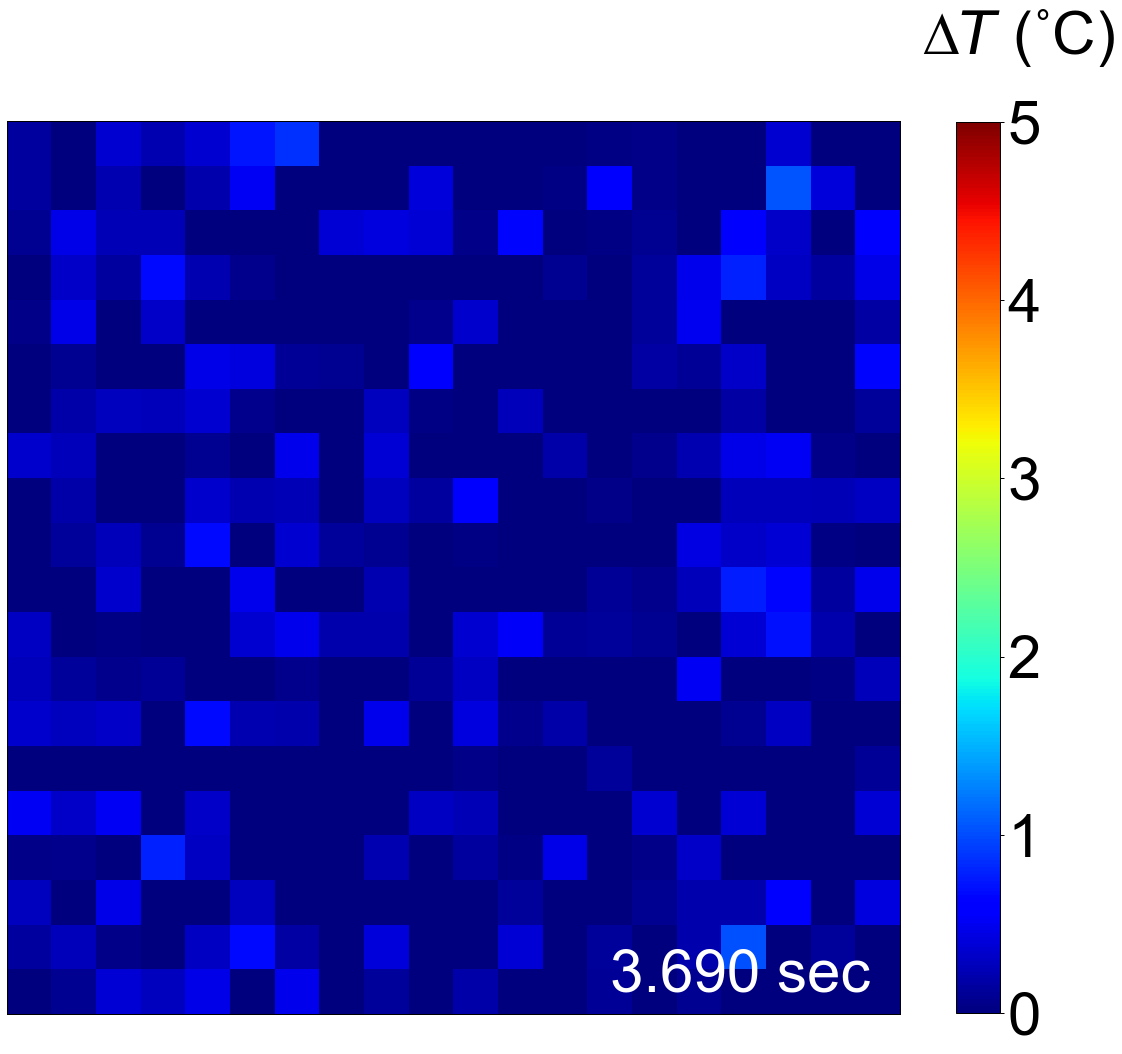

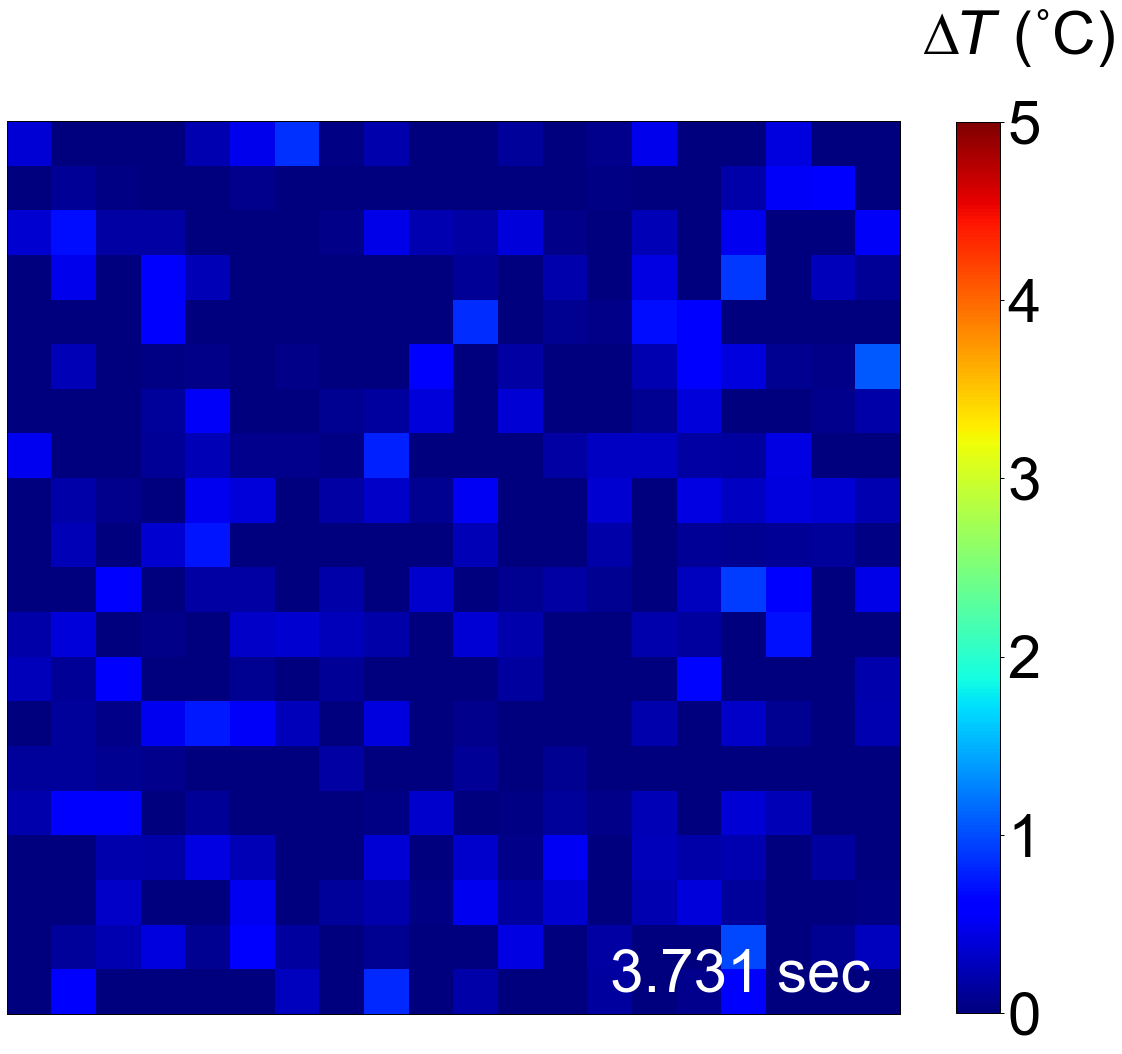

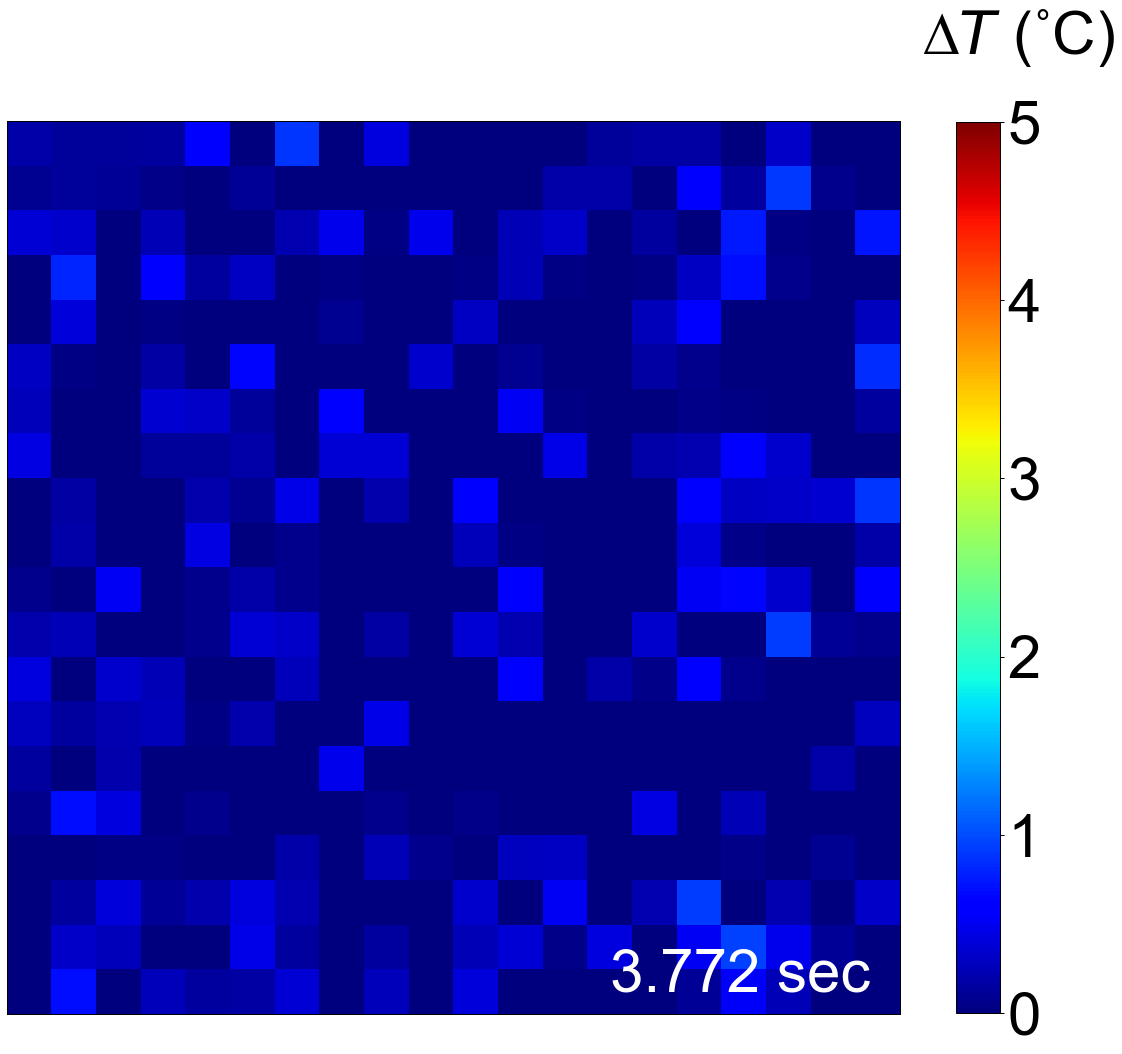

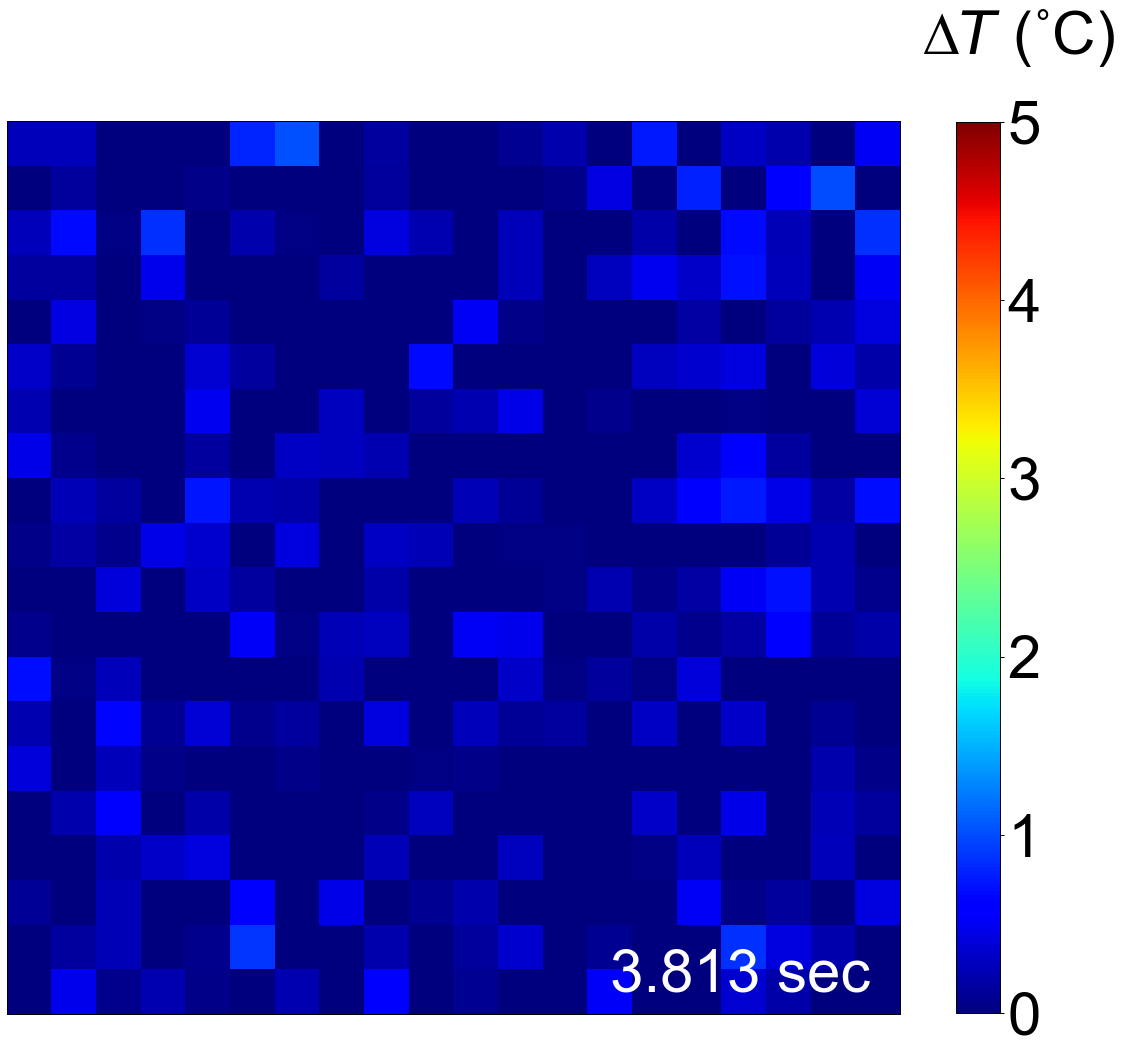

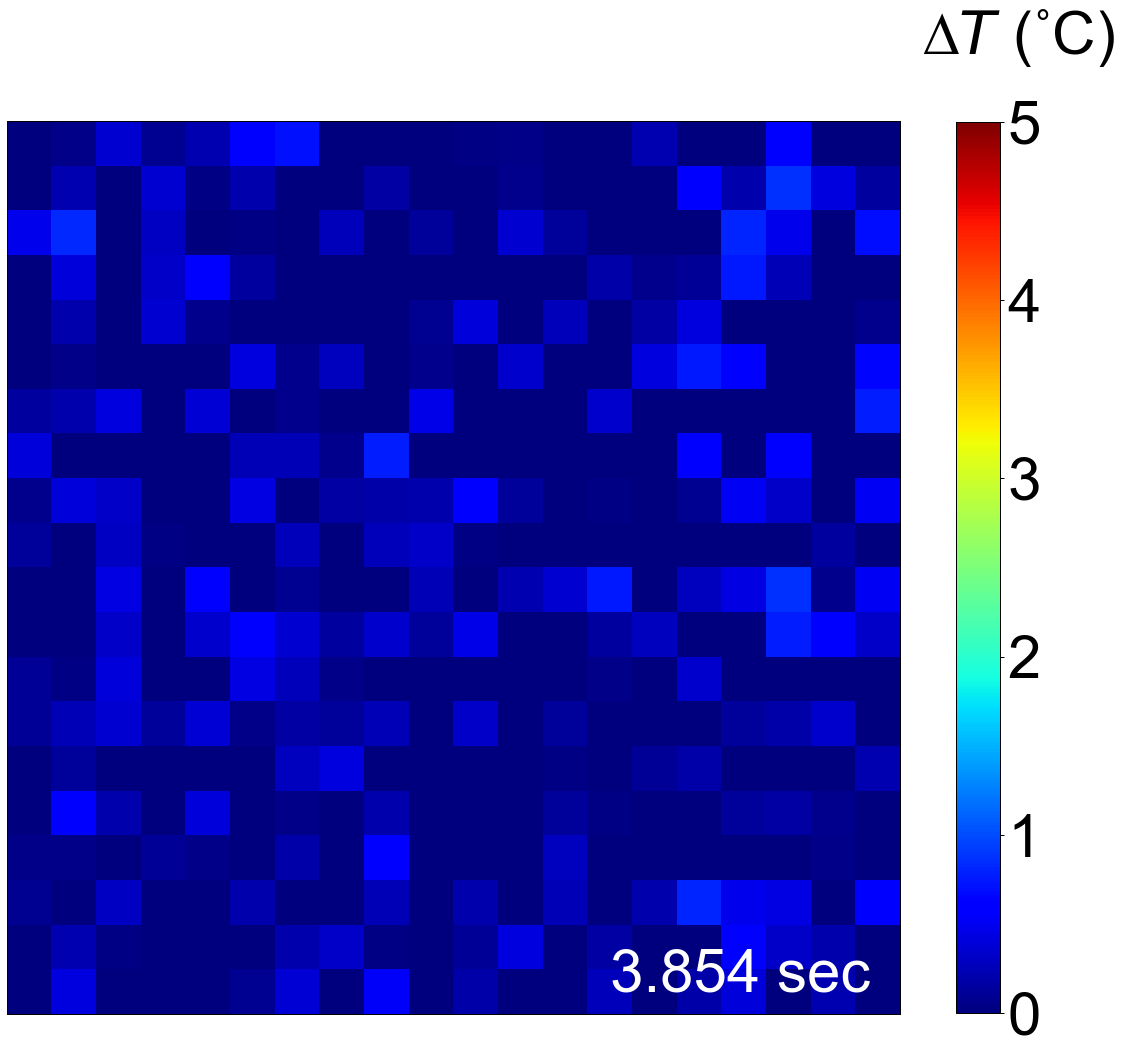

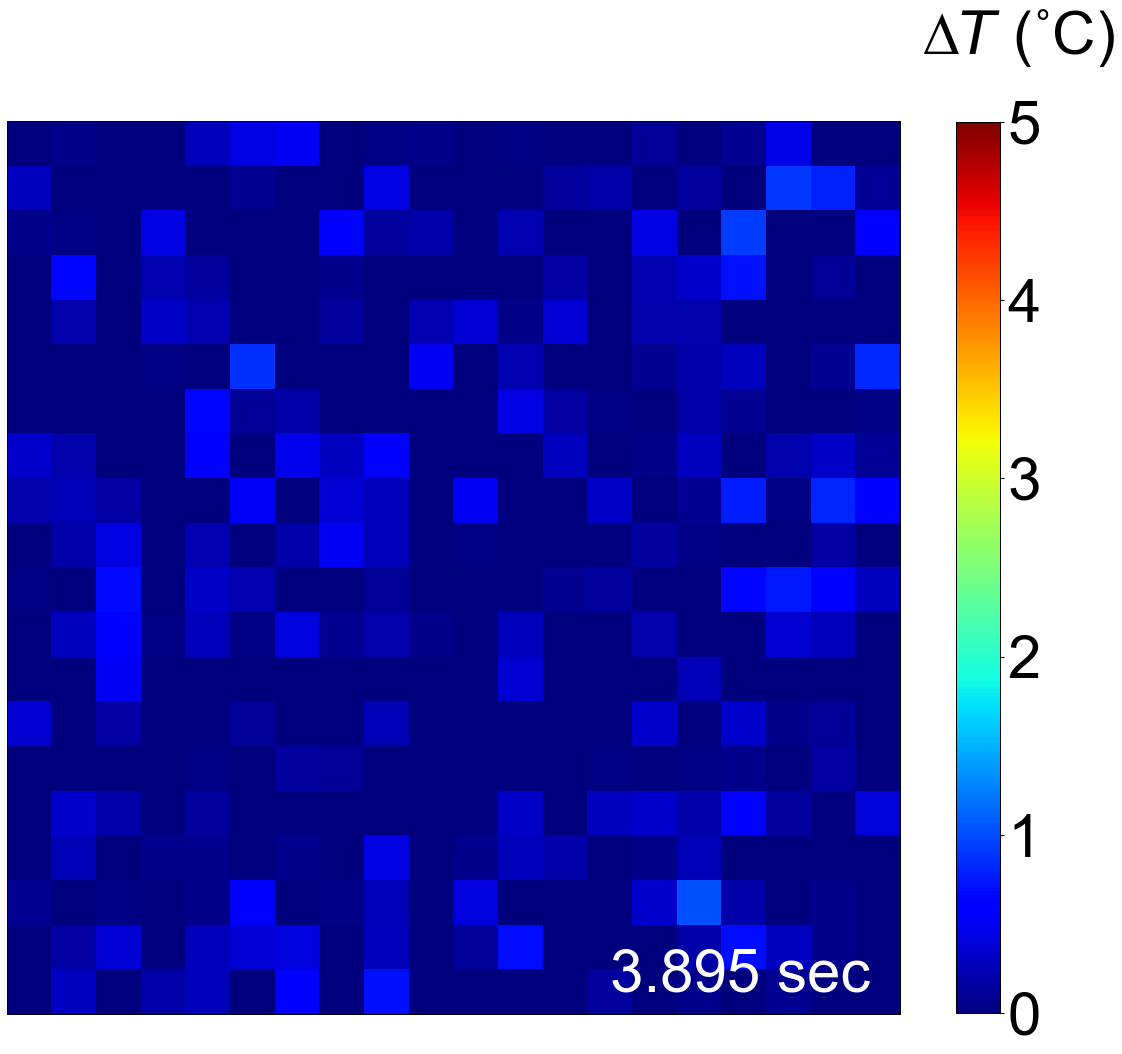

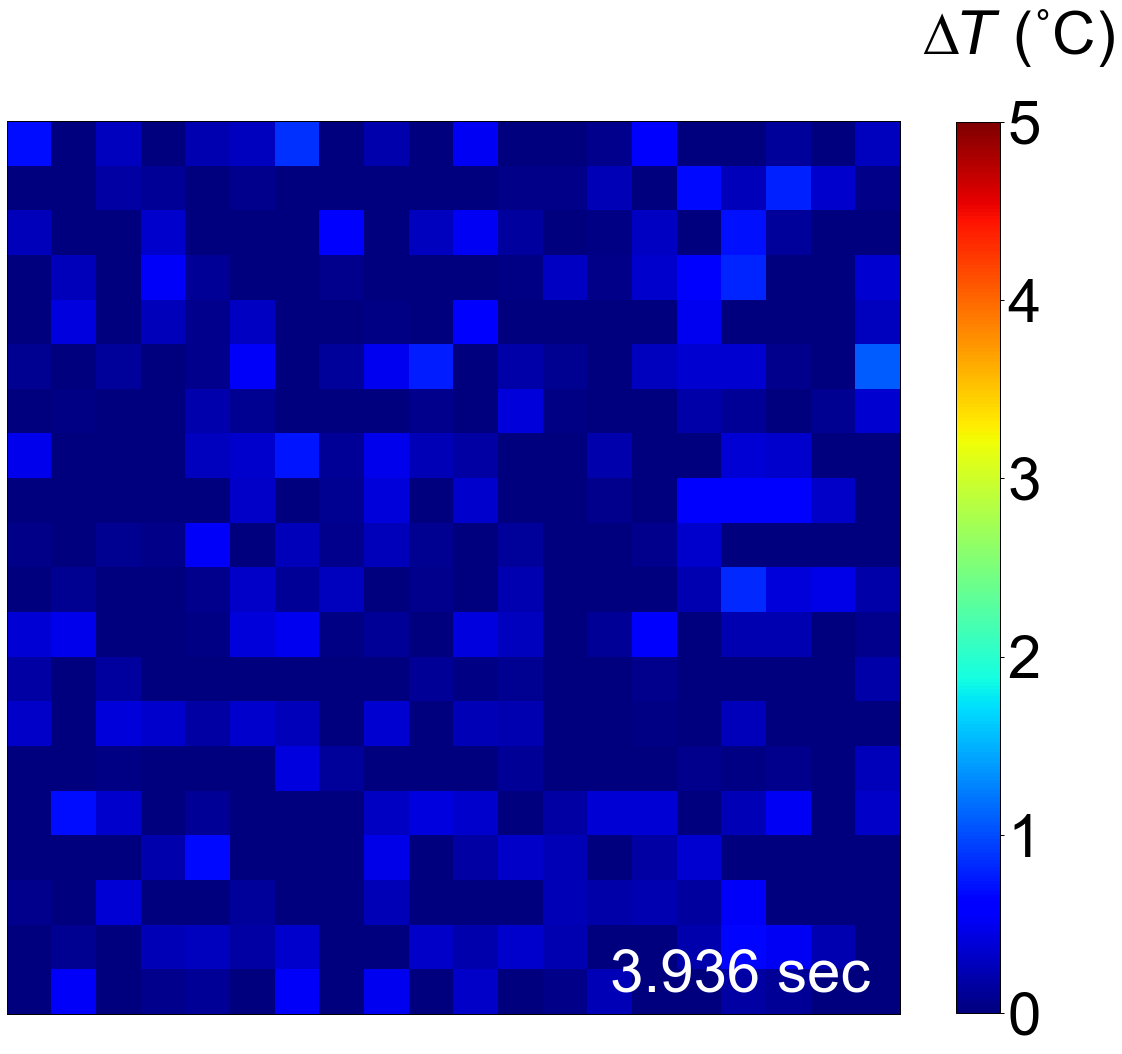

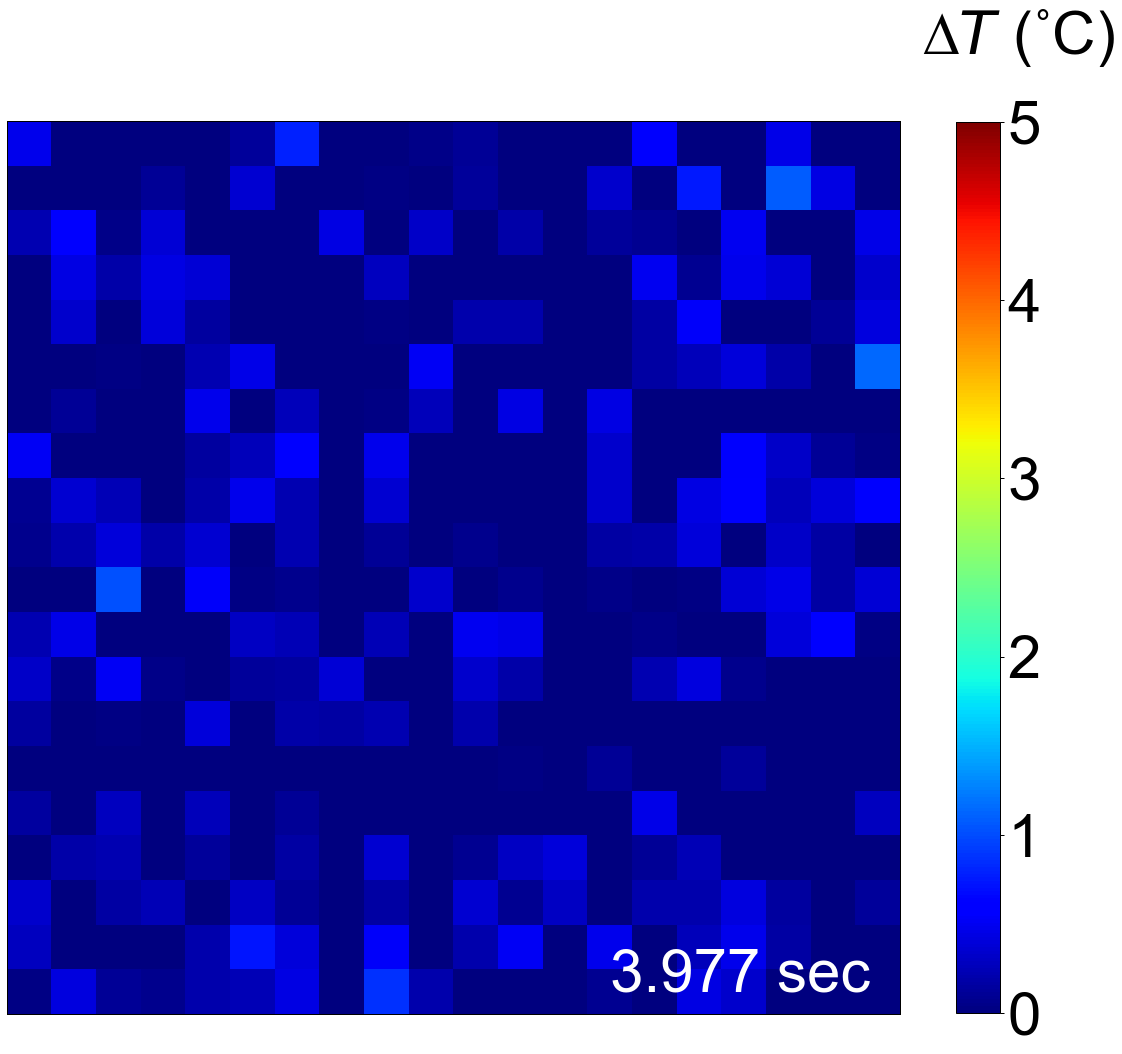

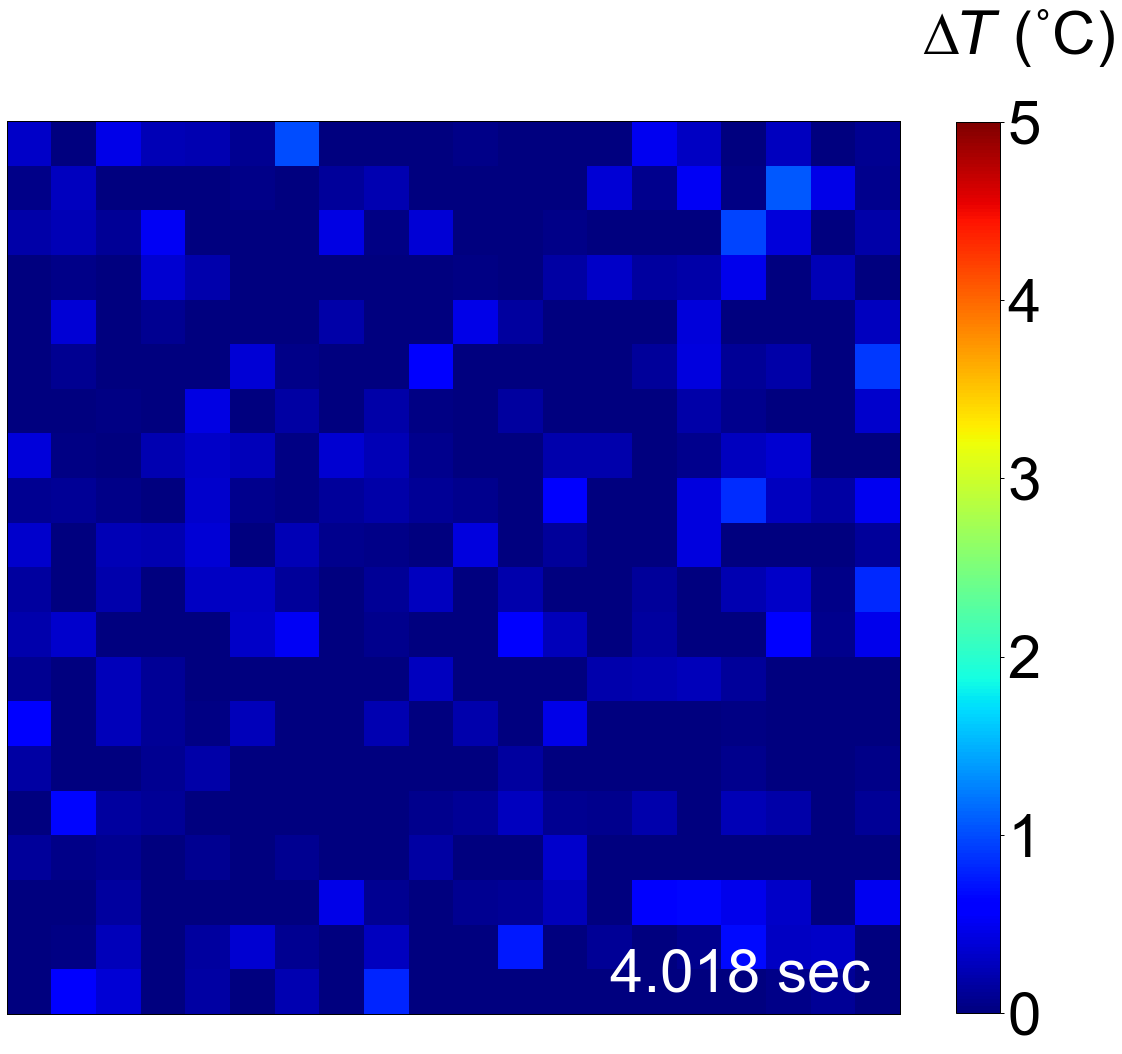

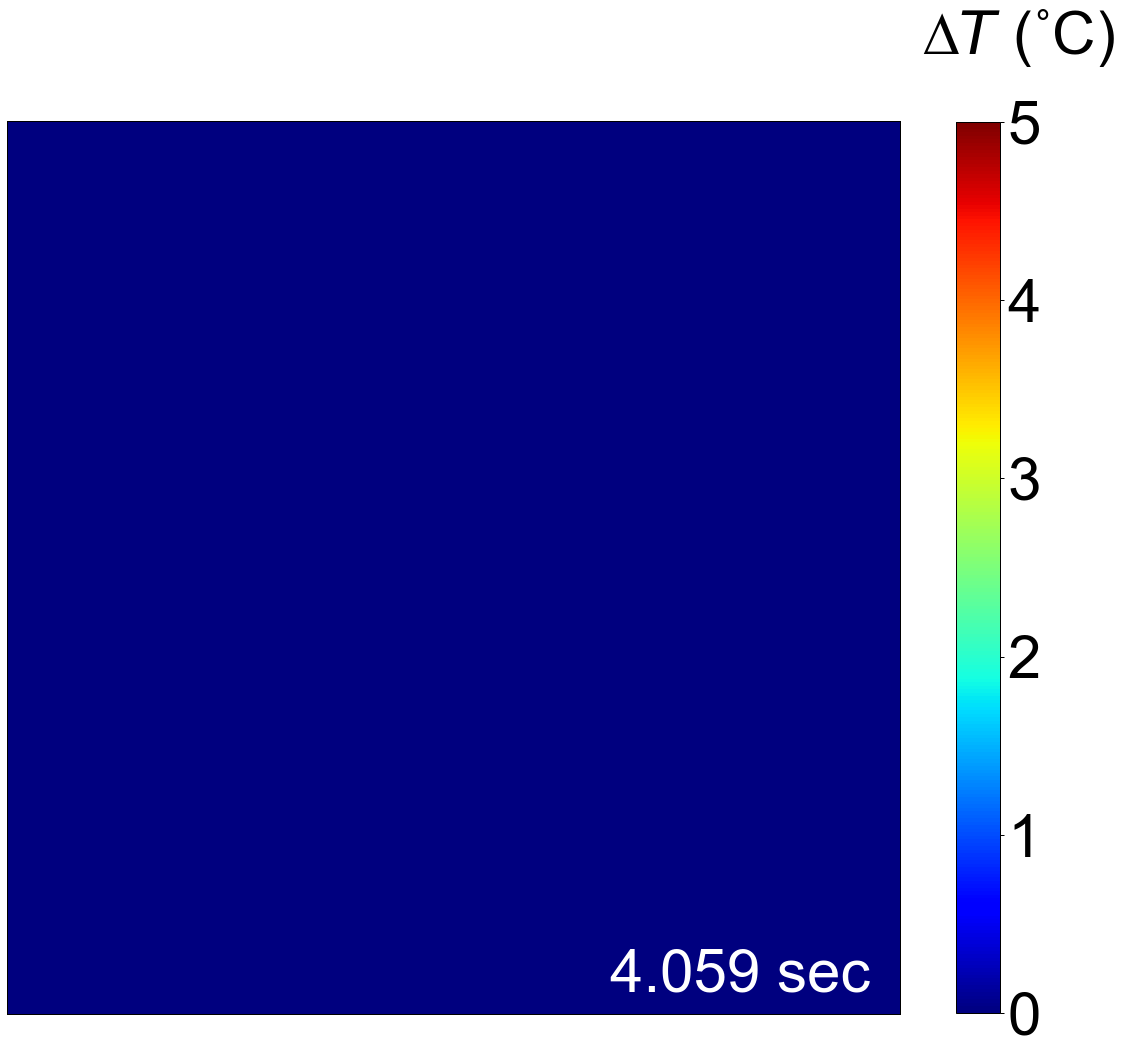

In [7]:
base_image_path = glob.glob('../../Fig5/Fig5a/cyto/*crip*/099.tif')
base_image = 0
for path in base_image_path:
    base_image += np.array(Image.open(path))
base_image = lifetime_to_temperature_201112(base_image/len(base_image_path))



for num in range(100):
    cell_path = str(num).zfill(3) + '.tif'
    tmp_time_slice = glob.glob('../../Fig5/Fig5a/cyto/*crip*/' + cell_path)
    tmp_image = 0
    for path in tmp_time_slice:
        tmp_image += np.array(Image.open(path))
    tmp_image = lifetime_to_temperature_201112(tmp_image/len(tmp_time_slice)) - base_image
    im = Image.fromarray(tmp_image)
    im.save('../../Program/Uneditied_figure/Fig5a/law_cyto/' + str(num).zfill(3) + '.tif')
    
    fig = plt.figure(figsize = (20, 20))    
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['xtick.major.width'] = 1.0
    plt.rcParams['ytick.major.width'] = 1.0
    plt.rcParams['axes.linewidth'] = 1.0
    plt.rcParams["font.size"] = 60
    plt.tick_params(labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False)
    plt.tick_params(bottom=False,
                    left=False,
                    right=False,
                    top=False)
    plt.imshow(tmp_image, vmax = 5, vmin = 0, cmap = 'jet')
    plt.colorbar(shrink = 0.82)
    
        
    time = 0.041*num
    plt.text(20, -2, '∆$\it{T}}$ (˚C)', color = 'black')
    plt.text(13, 19, str('{:.3f}'.format(time)) + ' sec', color = 'white', fontsize = 60)
    plt.savefig('../../Program/Uneditied_figure/Fig5a_lifetime_jpg/'+ str(num).zfill(3) + '.jpg')
    
    
    pp = PdfPages('../../Program/Uneditied_figure/Fig5a/cyto/' + str(num).zfill(3) + '.pdf')
    pp.savefig(fig)
    pp.close()
    plt.show()

In [8]:
#動画に保存
img_array = []
for filename in sorted(glob.glob('../../Program/Uneditied_figure/Fig5a_lifetime_jpg/*.jpg'))[:-2]:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

name = '../../supplementary_video/supplementary_video5.mov'
out = cv2.VideoWriter(name, cv2.VideoWriter_fourcc(*'mp4v'), 1/0.041, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()